# 数据读取

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
family2014 = pd.read_csv('数据/居民出行数据/2014/family_2014.csv',dtype=str)
travel2014 = pd.read_csv('数据/居民出行数据/2014/midtable_2014.csv',dtype=str)
familymember_2014 = pd.read_csv('数据/居民出行数据/2014/family_member_2014.csv',dtype=str)

In [3]:
family2023 = pd.read_csv('数据/居民出行数据/2023/family_total_33169.csv',dtype=str)
travel2023 = pd.read_csv('数据/居民出行数据/2023/midtable_total_33169.csv',dtype=str)
familymember_2023 = pd.read_csv('数据/居民出行数据/2023/familymember_total_33169.csv',dtype=str)

In [4]:
family_cluster = pd.read_csv('数据/family_cluster_new.csv',dtype=str)

## 家庭变量筛选

In [5]:
valid_member_number = familymember_2023.groupby('家庭编号').size().rename('家庭成员数量_real').reset_index()
family2023 = pd.merge(family2023, valid_member_number, on='家庭编号', how='left')
family2023 = family2023[family2023['家庭成员数量'].astype(int) == family2023['家庭成员数量_real']]

In [6]:
valid_family = family2023[['家庭编号']]

In [7]:
familymember_2023 = pd.merge(familymember_2023, valid_family, on='家庭编号', how='inner')

In [8]:
family2023[['家庭成员数量']].value_counts()

家庭成员数量
2         16027
3          9865
1          4120
4          2388
5           698
6            66
7             2
Name: count, dtype: int64

In [9]:
## 家庭连续型变量
family2023[['家庭成员数量','家庭工作人口数','机动车数量','脚踏自行车数量','电动自行车数量','摩托车数量','老年代步车数量']]

,家庭成员数量,家庭工作人口数,机动车数量,脚踏自行车数量,电动自行车数量,摩托车数量,老年代步车数量
0,3,2,1,3,0,0,0
1,2,2,1,1,0,0,0
2,2,2,1,0,1,0,0
3,3,2,1,1,1,0,0
4,2,2,1,1,2,0,0
...,...,...,...,...,...,...,...
33164,1,0,0,1,0,0,0
33165,3,1,0,2,1,0,0
33166,3,2,1,1,1,0,0
33167,3,2,1,1,1,0,0


In [10]:
have_student_family = familymember_2023[familymember_2023['职业'] == '14'].drop_duplicates(['家庭编号'])[['家庭编号']]
have_student_family['have_student'] = 1

In [11]:
family2023 = pd.merge(family2023, have_student_family, on='家庭编号', how='left').fillna({'have_student':0})

In [12]:
## 家庭离散型变量
family2023[['have_student','家庭年收入']]

,have_student,家庭年收入
0,0.0,E
1,0.0,C
2,0.0,D
3,1.0,G
4,0.0,B
...,...,...
33161,0.0,B
33162,0.0,C
33163,1.0,D
33164,0.0,E


In [13]:
family2023['家庭年收入'].isna().sum()

0

## 个人变量筛选

In [14]:
familymember_2023['age'] = 2023 - familymember_2023['出生年份'].astype(int)
familymember_2023['age_group'] = pd.cut(familymember_2023['age'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], right=False, labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','76-80','81-85','86-90','91-95','96-100'])

In [15]:
familymember_2023['age'].max() , familymember_2023['age'].min()

(123, 0)

In [16]:
# familymember_2023['age'] = (familymember_2023['age'] - familymember_2023['age'].min()) / (familymember_2023['age'].max() - familymember_2023['age'].min())

In [17]:
## 连续型变量
familymember_2023[['age']]

,age
0,43
1,90
2,59
3,72
4,12
...,...
79216,46
79217,35
79218,18
79219,35


In [18]:
(familymember_2023[familymember_2023['关系']=='0']['age']).describe()

count    33050.000000
mean        49.398669
std         14.306272
min          2.000000
25%         38.000000
50%         48.000000
75%         61.000000
max        120.000000
Name: age, dtype: float64

In [19]:
familymember_2023.loc[familymember_2023['最高学历'].isna(),'最高学历'] = familymember_2023.loc[familymember_2023['最高学历'].isna(),'教育阶段']

In [20]:
## 离散型变量,这里的关系有点不太对，有的户主很小
familymember_2023[['性别','是否有驾照','关系','最高学历','职业']]

,性别,是否有驾照,关系,最高学历,职业
0,2,0,0,6,11
1,2,0,2,2,15
2,2,0,0,6,15
3,2,0,0,3,15
4,1,NaN,9,2,14
...,...,...,...,...,...
79216,2,0,0,6,3
79217,1,0,0,6,2
79218,1,0,0,6,3
79219,1,1,0,6,8


In [21]:
familymember_2023['是否有驾照'] = familymember_2023['是否有驾照'].fillna('0')

## 图编码

In [ ]:
import numpy as np

In [ ]:
familymember_2023 = pd.merge(familymember_2023, familymember_2023.groupby('家庭编号').size().rename('家庭成员数量').reset_index())

In [ ]:
adj_list = []
node_feature_list = []
edge_feature_list = []

In [ ]:
atom_types = ['Male_Child', 'Female_Child', 'Male_Adult', 'Female_Adult', 'Male_Elder', 'Female_Elder']
family_relation_types = ['SPOUSE', 'PARENT_CHILD',  'GRANDPARENT_GRANDCHILD', 'SIBLING', 'EXTENDED_FAMILY']

In [ ]:
familymember_2023['real_age'] = familymember_2023['age']

In [ ]:
def judge_relation_type(relation):
    if relation in [set(['0','0']),set(['17','17']),set(['0','17']),set(['1', '2']),set(['13', '14']),set(['15', '16'])]:
        return [1,0,0,0,0]  # SPOUSE
    elif relation in [set(['1', '0']), set(['2', '0']), set(['1', '17']), set(['2', '17']), set(['0', '5']), set(['0', '6']), set(['17', '5']), set(['17', '6']), set(['13', '1']), set(['14', '1']), set(['15', '2']), set(['16', '2']),  set(['1', '7']), set(['1', '8']), set(['2', '7']), set(['2', '8'])]:
        return [0,1,0,0,0]  # PARENT_CHILD
    elif relation in [set(['0', '13']), set(['0', '14']),set(['0', '15']), set(['0', '16']),set(['17', '13']), set(['17', '14']),set(['17', '15']), set(['17', '16']),set(['1', '5']), set(['1', '6']), set(['2', '5']), set(['2', '6']), set(['0', '9']), set(['0', '10']), set(['17', '9']), set(['17', '10']),set(['7', '13']), set(['7', '14']),set(['7', '15']), set(['7', '16']),set(['8', '13']), set(['8', '14']),set(['8', '15']), set(['8', '16'])]:
        return [0,0,1,0,0]  # GRANDPARENT_GRANDCHILD
    elif relation in [set(['0', '7']), set(['0', '8']), set(['17', '7']), set(['17', '8']), set(['5', '6']), set(['9', '10']), set(['7', '8']),set(['7', '7']),set(['8', '8']), set(['5', '5']), set(['6', '6']),set(['9', '9']),set(['10', '10'])]:
        return [0,0,0,1,0]  # SIBLING
    else:
        return [0,0,0,0,1]  # EXTENDED_FAMILY

In [ ]:
def judge_node_type(row):
    if row['性别'] == '1' and row['real_age'] < 18:
        return [1, 0, 0, 0, 0, 0]
    elif row['性别'] == '2' and row['real_age'] < 18:
        return [0, 1, 0, 0, 0, 0]
    elif row['性别'] == '1' and 18 <= row['real_age'] < 60:
        return [0, 0, 1, 0, 0, 0]
    elif row['性别'] == '2' and 18 <= row['real_age'] < 60:
        return [0, 0, 0, 1, 0, 0]
    elif row['性别'] == '1' and row['real_age'] >= 60:
        return [0, 0, 0, 0, 1, 0]
    elif row['性别'] == '2' and row['real_age'] >= 60:
        return [0, 0, 0, 0, 0, 1]
    else:
        return None

In [ ]:
familymember_2023['node_type'] = familymember_2023.apply(judge_node_type, axis=1)

In [ ]:
from itertools import combinations
from tqdm import tqdm

In [ ]:
pair_wise_list = []

In [ ]:
for i in tqdm(family2023['家庭编号'].unique()):
    tmp = familymember_2023[familymember_2023['家庭编号'] == i]
    pair_wise_list.extend(list(combinations(tmp['关系'].values,2)))

100%|██████████| 33166/33166 [02:22<00:00, 233.20it/s]


In [ ]:
len(set(pair_wise_list))

171

In [ ]:
total_relation = list(set(pair_wise_list))

In [ ]:
total_relation = [set(i) for i in total_relation]

In [ ]:
total_judge_result = pd.DataFrame([str(i) for i in total_relation],columns=['relation_pair'])

In [ ]:
total_judge_result = pd.concat([total_judge_result, pd.DataFrame([str(judge_relation_type(i)) for i in total_relation],columns=['relation_type'])], axis=1)

In [ ]:
total_judge_result

,relation_pair,relation_type
0,"{'15', '0'}","[0, 0, 1, 0, 0]"
1,"{'13', '17'}","[0, 0, 1, 0, 0]"
2,"{'17', '7'}","[0, 0, 0, 1, 0]"
3,"{'6', '2'}","[0, 0, 1, 0, 0]"
4,"{'12', '17'}","[0, 0, 0, 0, 1]"
...,...,...
166,"{'5', '2'}","[0, 0, 1, 0, 0]"
167,"{'5', '1'}","[0, 0, 1, 0, 0]"
168,"{'5', '8'}","[0, 0, 0, 0, 1]"
169,"{'1', '2'}","[1, 0, 0, 0, 0]"


In [ ]:
adj_list = []
node_feature_list = []
edge_feature_list = []

In [ ]:
for i in tqdm(family2023['家庭编号'].unique()):
    tmp = familymember_2023[familymember_2023['家庭编号'] == i]
    tmp = tmp.sort_values('age', ascending=False)
    adj_matrix = np.zeros((8, 8))
    node_feature = np.zeros((8, len(atom_types)))
    edge_feature = np.zeros((8, 8, len(family_relation_types)))
    node_feature[:len(tmp), :] = np.array(tmp['node_type'].tolist())
    ## 邻接矩阵构建
    n = len(tmp)  # 矩阵大小
    A = np.ones((n, n)) - np.eye(n)
    adj_matrix[:n, :n] = A
    ## 边关系的构建
    for p_i in range(n):
        for p_j in range(n-1):
            if p_i == p_j:
                continue
            relation = set([tmp.iloc[p_i]['关系'], tmp.iloc[p_j]['关系']])
            relation_type = judge_relation_type(relation)
            edge_feature[p_i, p_j, :] = relation_type
            edge_feature[p_j, p_i, :] = relation_type
    adj_list.append(adj_matrix)
    edge_feature_list.append(edge_feature)
    node_feature_list.append(node_feature)

  0%|          | 18/33166 [00:00<03:07, 177.26it/s]

100%|██████████| 33166/33166 [02:53<00:00, 191.38it/s]


In [ ]:
np.save('数据/family_adj.npy', np.array(adj_list))
np.save('数据/familymember_relationship.npy', np.array(edge_feature_list))
np.save('数据/familymember_type.npy', np.array(node_feature_list))


## 变量编码

In [22]:
income_map = {'A':1, 'B':1, 'C':2, 'D':2, 'E':3, 'F':3, 'G':4, 'I':5, 'J':5, 'K':5}

In [23]:
family2023['家庭年收入'] = family2023['家庭年收入'].map(income_map)

In [24]:
familymember_2023['age_group'] = pd.cut(
    familymember_2023['age'], 
    bins=range(0, familymember_2023['age'].max() + 6, 5),
    labels=False 
)



In [25]:
familymember_2023['age_group'] = familymember_2023['age_group'].fillna(0)

In [26]:
familymember_2023['age'] = familymember_2023['age_group']

In [27]:
# relation_map = {'0':0, '17':1, '1':2, '2':2, '5':2, '6':2, '13':3, '14':3, '15':3, '16':3, '9':3, '10':3, '7':4, '8':4, '11':5, '12':5}
# education_map = {'1':1, '2':1, '3':2, '4':2, '5':3, '6':4, '7':5, '8':6, '9':7}
# occupation_map = {'1':1, '2':1, '3':1, '4':2, '5':2, '6':3, '7':2, '8':3, '9':1, '10':4, '11':4, '12':4, '13':5, '14':6, '15':7, '16':8, '17':8, '18':1, '19':1, '20':8}

# familymember_2023['关系'] = familymember_2023['关系'].map(relation_map)
# familymember_2023['最高学历'] = familymember_2023['最高学历'].map(education_map)
# familymember_2023['职业'] = familymember_2023['职业'].map(occupation_map)

In [28]:
familymember_2023['关系'].value_counts().shape, familymember_2023['最高学历'].value_counts().shape, familymember_2023['职业'].value_counts().shape

((16,), (9,), (20,))

In [29]:
from population_data_process_nonclip_reclass import *

/home/cranehh/anaconda3/envs/DiT/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
## 家庭的变量编码
test = PopulationDataEncoder()

In [31]:
family2023 = pd.merge(family2023,family_cluster[['家庭编号','cluster']], on='家庭编号', how='left')

In [32]:
# 2. 拟合数据 (需要你的实际数据)
test.fit_family_data(family2023)
test.fit_person_data(familymember_2023)



In [33]:
encode_family_data = test.encode_family(family2023)
encode_member_data = test.encode_person(familymember_2023)

In [34]:
test.scalers['family_家庭成员数量'].mean_

array([2.38862088])

In [ ]:
test.scalers['family_家庭成员数量'].scale_

array([0.88397094])

In [ ]:
encode_family_data

{'family_家庭成员数量': array([ 0.69162808, -0.43963083, -0.43963083, ...,  0.69162808,
         0.69162808, -0.43963083]),
 'family_家庭工作人口数': array([0.81746303, 0.81746303, 0.81746303, ..., 0.81746303, 0.81746303,
        0.81746303]),
 'family_机动车数量': array([0.93622616, 0.93622616, 0.93622616, ..., 0.93622616, 0.93622616,
        0.93622616]),
 'family_脚踏自行车数量': array([ 3.77876167,  0.74396672, -0.77343075, ...,  0.74396672,
         0.74396672, -0.77343075]),
 'family_电动自行车数量': array([-1.27837079, -1.27837079,  0.27071381, ...,  0.27071381,
         0.27071381, -1.27837079]),
 'family_摩托车数量': array([-0.14970503, -0.14970503, -0.14970503, ..., -0.14970503,
        -0.14970503, -0.14970503]),
 'family_老年代步车数量': array([-0.33952242, -0.33952242, -0.33952242, ..., -0.33952242,
        -0.33952242, -0.33952242]),
 'family_家庭年收入': array([1.31626145, 0.10610657, 0.10610657, ..., 0.10610657, 1.31626145,
        0.10610657]),
 'family_have_student': array([[1., 0.],
        [1., 0.],
        [1., 0

In [ ]:
# 3. 创建数据集
dataset_family, dataset_member = create_population_dataset(family2023, familymember_2023, test)

In [ ]:
np.save('数据/family_sample_new_cluster.npy',dataset_family.numpy())
np.save('数据/family_member_sample_new_cluster.npy',dataset_member.numpy())


# 网络构建

In [ ]:
import torch
import numpy as np

dataset_family = torch.from_numpy(np.load('数据/family_sample.npy'))
dataset_member = torch.from_numpy(np.load('数据/family_member_sample.npy'))

family_adj = np.load('数据/family_adj.npy')
familymember_relationship = np.load('数据/familymember_relationship.npy')
familymember_type = np.load('数据/familymember_type.npy')

In [ ]:
dataset_family = dataset_family.to('cuda')
dataset_member = dataset_member.to('cuda')

In [ ]:
from population_DiT import PopulationDiT

In [ ]:
test = PopulationDiT().to('cuda')

In [ ]:
t = torch.randint(0, 10, (100,), device='cuda')
family_final_result, person_final_result, relation_graph = test(dataset_family[:100], dataset_member[:100],t)

/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:592: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  adj_mat[msk.triu()] = adj_mat_logits.contiguous().view(-1)
/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:594: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  edge_attribute_tensor[msk[:, None, :, :].triu(diagonal=1).repeat(1,CHEM_DETAILS.num_bond_types, 1,1)] = edge_atr_logits.contiguous().view(-1)


In [ ]:
person_mask = (torch.sum(dataset_member[:100,:,:],dim=-1)!=0)

In [ ]:
source_data_family = dataset_family[:100]
source_data_member = dataset_member[:100]
source_data_adj = torch.from_numpy(family_adj[:100]).to('cuda')
source_data_edge = torch.from_numpy(familymember_relationship[:100]).to('cuda')
source_data_node = torch.from_numpy(familymember_type[:100]).to('cuda')

In [ ]:
valid_person = torch.sum(source_data_node, dim=-1) != 0
num_nodes_active = torch.sum(valid_person, dim=-1, dtype=torch.float32)

In [ ]:
a_norm_one = torch.sum(source_data_adj, dim=[1,2], dtype=torch.float32)

In [ ]:
valid_edge = torch.sum(source_data_edge, dim=-1) != 0

In [ ]:
import torch.nn.functional as F

In [ ]:
family_continus_loss = F.mse_loss(
                            family_final_result[:, :7], 
                            source_data_family[:, :7],
                            reduction = "none"
                        )

family_continus_loss = torch.sum(family_continus_loss, dim=-1)

# 学生状态分类损失
family_student_loss = F.cross_entropy(
    family_final_result[:, 7:7+2],
    source_data_family[:, 7:7+2].argmax(dim=-1),
    reduction = "none"
)


# 收入类别分类损失  
family_income_loss = F.cross_entropy(
    family_final_result[:, 7+2:7+12],
    source_data_family[:, 7+2:7+12].argmax(dim=-1),
    reduction = "none"
)


In [ ]:


##学生损失
person_continus_loss = F.mse_loss(
    person_final_result[:,:, :1], 
    source_data_member[:,:, :1],
    reduction = "none"
).mean(dim=[1, 2])

## 离散类别状态损失
person_gender_loss = F.cross_entropy(
    person_final_result[:,:, 1:1+2].transpose(1, 2),
    source_data_member[:,:, 1:1+2].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

person_license_loss = F.cross_entropy(
    person_final_result[:,:, 1+2:1+4].transpose(1, 2),
    source_data_member[:,:, 1+2:1+4].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)


person_relation_loss = F.cross_entropy(
    person_final_result[:,:, 1+4:1+20].transpose(1, 2),
    source_data_member[:,:, 1+4:1+20].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

person_education_loss = F.cross_entropy(
    person_final_result[:,:, 1+20:1+29].transpose(1, 2),
    source_data_member[:,:, 1+20:1+29].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

person_occupation_loss = F.cross_entropy(
    person_final_result[:,:, 1+29:1+49].transpose(1, 2),
    source_data_member[:,:, 1+29:1+49].argmax(dim=-1),
    reduction = "none"
).mean(dim=-1)

In [ ]:
def compute_adjacency_loss(decoder_adj_logits, true_adj_matrix):
    """
    邻接矩阵二元交叉熵损失 - 基于GraphVAE实现
    
    Args:
        decoder_adj_logits: [batch_size, max_family_size, max_family_size] 预测的邻接矩阵logits
        true_adj_matrix: [batch_size, max_family_size, max_family_size] 真实邻接矩阵
        family_mask: [batch_size, max_family_size] 家庭成员存在掩码
    """
    batch_size, max_nodes, _ = decoder_adj_logits.shape
    
    # 展平为向量形式
    adj_logits_flat = decoder_adj_logits.view(-1)  # [B, N*N]
    adj_truth_flat = true_adj_matrix.view(-1)      # [B, N*N] 
    
    # 计算二元交叉熵损失
    bce_loss = F.binary_cross_entropy_with_logits(
        adj_logits_flat, adj_truth_flat, reduction='none'
    )
    
    loss1 = torch.sum(bce_loss.view(batch_size, -1), dim=1) / ((max_nodes)**2)
    
    return loss1


#### 3.1.2 节点类型重建损失

def compute_node_type_loss(decoder_node_logits, true_node_types, node_mask):
    """
    节点类型交叉熵损失
    
    Args:
        decoder_node_logits: [batch_size, max_family_size, num_node_types] 预测的节点类型
        true_node_types: [batch_size, max_family_size] 真实节点类型索引
        family_mask: [batch_size, max_family_size] 家庭成员存在掩码
    """
    batch_size, max_nodes, num_classes = decoder_node_logits.shape
    
    node_idx = torch.arange(batch_size, device=decoder_node_logits.device).repeat_interleave(max_nodes)
    graph_idx_associated_with_considered_node = node_idx[node_mask.view(-1)]
    num_nodes_active = torch.sum(node_mask, dim = -1, dtype=torch.float32)

    # 只对存在的节点计算损失
    active_node_logits = decoder_node_logits[node_mask]  # [num_active_nodes, num_classes]
    active_node_types = true_node_types[node_mask].argmax(dim=-1)       # [num_active_nodes]

    # 交叉熵损失
    node_loss = F.cross_entropy(active_node_logits, active_node_types,  reduction='none')
    node_loss = (torch.scatter_add(torch.zeros(batch_size, dtype=node_loss.dtype, device=node_loss.device), 0, graph_idx_associated_with_considered_node, node_loss)
                    / num_nodes_active)
    
    return node_loss


#### 3.1.3 边类型重建损失

def compute_edge_type_loss(decoder_edge_logits, true_edge_types, a_norm_one, valid_edge):
    """
    边类型交叉熵损失
    
    Args:
        decoder_edge_logits: [batch_size, max_family_size, max_family_size, num_edge_types]
        true_edge_types: [batch_size, max_family_size, max_family_size] 真实边类型索引
        true_adj_matrix: [batch_size, max_family_size, max_family_size] 邻接矩阵
        family_mask: [batch_size, max_family_size] 家庭成员存在掩码
    """
    batch_size, max_nodes, _, _ = decoder_edge_logits.shape

    edge_mask = valid_edge.view(-1)  # [bvv]
    edge_idx = torch.arange(batch_size, device=decoder_edge_logits.device).repeat_interleave(max_nodes*max_nodes)
    graph_idx_associated_with_considered_edge = edge_idx[edge_mask]


    # 提取存在边的logits和标签
    active_edge_logits = decoder_edge_logits[valid_edge]  # [num_active_edges, num_edge_types]
    active_edge_types = true_edge_types[valid_edge].argmax(dim=-1)       # [num_active_edges]

    # 交叉熵损失
    edge_loss = F.cross_entropy(active_edge_logits, active_edge_types, reduction='none')
    edge_loss = torch.scatter_add(torch.zeros(batch_size, dtype=edge_loss.dtype, device=edge_loss.device), 0, graph_idx_associated_with_considered_edge, edge_loss)
    edge_loss = edge_loss / (a_norm_one + 1e-6)
    
    return edge_loss

In [ ]:
graph_loss_1 = compute_adjacency_loss(relation_graph['adj_matrix'], source_data_adj)

In [ ]:
graph_loss_2 = compute_node_type_loss(relation_graph['node_types'],source_data_node,valid_person)

In [ ]:
graph_loss_3 = compute_edge_type_loss(relation_graph['edge_types'], source_data_edge, a_norm_one, valid_edge)

In [ ]:
final_loss = family_continus_loss + family_student_loss + family_income_loss + \
             person_continus_loss + person_gender_loss + person_license_loss + person_relation_loss + person_education_loss + person_occupation_loss + \
             graph_loss_1 + graph_loss_2 + graph_loss_3

In [ ]:
## 添加mask的损失函数设计
batch_size, max_nodes = person_mask.shape


person_idx = torch.arange(batch_size, device=person_mask.device).repeat_interleave(max_nodes)
graph_idx_associated_with_considered_person = person_idx[person_mask.view(-1)]

##学生损失
person_continus_loss = F.mse_loss(
    person_final_result[:,:, :1][person_mask], 
    source_data_member[:,:, :1][person_mask],
    reduction = "none"
).mean(dim=-1)

person_continus_loss = torch.scatter_add(torch.zeros(batch_size, dtype=person_continus_loss.dtype, device=person_continus_loss.device), 0, graph_idx_associated_with_considered_person, person_continus_loss)

person_gender_loss = F.cross_entropy(
    person_final_result[:,:, 1:1+2][person_mask],
    source_data_member[:,:, 1:1+2][person_mask].argmax(dim=-1),
    reduction = "none"
)

person_gender_loss = torch.scatter_add(torch.zeros(batch_size, dtype=person_gender_loss.dtype, device=person_gender_loss.device), 0, graph_idx_associated_with_considered_person, person_gender_loss)

invalid_indices = ~person_mask
person_invalid_idx = torch.arange(batch_size, device=person_mask.device).repeat_interleave(max_nodes)
graph_idx_associated_with_considered_invalid_person = person_invalid_idx[invalid_indices.view(-1)]

pred_invalid = person_final_result[invalid_indices]
zero_target = torch.zeros_like(pred_invalid)
zero_loss = F.mse_loss(pred_invalid, zero_target, reduction='none').mean(dim=-1)

zero_loss = torch.scatter_add(torch.zeros(batch_size, dtype=zero_loss.dtype, device=zero_loss.device), 0, graph_idx_associated_with_considered_invalid_person, zero_loss)

In [ ]:
## 显示添加成员数量和mask的关系 


# 模型效果测试

In [33]:
## 在losses_personmask.py文件的基础上、新加了population_DiT_cluster.py 文件
## 进一步有了losses_personmask_memberbundle.py和population_DiT_cluster_memberbundle.py文件
## 进一步得到了population_data_process_nonclip.py文件，修正了裁切错误的问题
## person和family分别加噪声，家庭信息输入给个人，加了一个finallayer层，新增了population_DiT_cluster2_memberbundle.py文件
## 融合了cluster的家庭条件输入，添加了模型的输出关系图的无效结果的删除机制，新增了population_DiT_cluster4_memberbundle.py文件
## loss函数的总人数改成了与预测人数一致，新增了losses_personmask_memberbundle2.py文件
## 还是改成了只有cluster的条件信息形式，新增了population_DiT_cluster5_memberbundle.py文件，在train.py的时候噪声强度进行改变（500，0.5）
## 在population_DiT_cluster5_memberbundle.py的基础上，重新对种类变量进行分组，得到了population_DiT_cluster6_memberbundle.py文件、losses_personmask_memberbundle3.py、population_data_process_nonclip_reclass.py文件，并且修改了dataset.py文件的读取信息的文件

## 种类变量不重新分组，只对家庭收入序列化分组、个人年龄分组，噪声强度降低（400，0.5）
## 重新完成了聚类过程,新增了population_DiT_cluster8_memberbundle.py、dataset要读取新的数据
## 将age进行分组，只对有效的个人进行处理，新增了population_DiT_cluster9_memberbundle.py文件，噪声都设置为200
## 采用相关性噪声
## 采用Focal损失函数
## 修改了个人的forward函数
## 采用大参数模型
## 更改了个人层面的条件信息和损失函数权重，新增了population_DiT_cluster10_memberbundle.py

## 数据复原过程

In [34]:
from population_DiT_cluster10_memberbundle import *
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

import argparse
import logging
import os
import numpy as np
from collections import OrderedDict
from copy import deepcopy
from glob import glob
from time import time
from tqdm import tqdm

from losses_personmask_memberbundle6 import compute_total_loss
from dataset import load_population_data, create_dataloader

In [35]:
model_result = load_population_dit_checkpoint("results/018-PopulationDiT-1029-更改了个人的条件机制/checkpoints/final.pt")

Loading checkpoint from results/018-PopulationDiT-1029-更改了个人的条件机制/checkpoints/final.pt
Model parameters:
  - Hidden size: 320
  - Depth: 32
  - Num heads: 16
  - Max family size: 8
✅ EMA model loaded successfully
✅ Checkpoint loaded successfully!
  - Epoch: 500
  - Train steps: 16000


In [36]:
args = model_result['args']

In [37]:
model = model_result['model']

In [38]:
class DiffusionScheduler:
    """扩散调度器"""
    def __init__(self, num_timesteps=1000, beta_start=0.0001, beta_end=0.02):
        self.num_timesteps = num_timesteps
        
        # 创建beta调度
        self.betas = torch.linspace(beta_start, beta_end, num_timesteps)
        self.alphas = 1.0 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        
        # 为采样准备的系数
        self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
        self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - self.alphas_cumprod)
        
    def add_noise(self, x_start, noise, timesteps):
        """添加噪声到原始数据"""
        sqrt_alphas_cumprod_t = self.sqrt_alphas_cumprod[timesteps].reshape(-1, 1)
        sqrt_one_minus_alphas_cumprod_t = self.sqrt_one_minus_alphas_cumprod[timesteps].reshape(-1, 1)
        
        # 对于成员数据，需要额外处理维度
        if len(x_start.shape) == 3:  # member data: [batch, family_size, features]
            sqrt_alphas_cumprod_t = sqrt_alphas_cumprod_t.unsqueeze(-1)
            sqrt_one_minus_alphas_cumprod_t = sqrt_one_minus_alphas_cumprod_t.unsqueeze(-1)
        
        return sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise
    
    def to(self, device):
        """移动到指定设备"""
        self.sqrt_alphas_cumprod = self.sqrt_alphas_cumprod.to(device)
        self.sqrt_one_minus_alphas_cumprod = self.sqrt_one_minus_alphas_cumprod.to(device)
        return self

In [39]:
print(f"Training Population DiT with {args.model_config}")
    
# 设置设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 创建实验文件夹

# 加载数据
dataset = load_population_data(args.data_dir)
# dataset.family_data = dataset.family_data[:, :-1]
# dataset.member_data = dataset.member_data[:, :, :-1]
dataloader = create_dataloader(
    dataset, 
    batch_size=args.batch_size,
    shuffle=True,
    num_workers=args.num_workers,
    pin_memory=True
)



model.eval()
with torch.no_grad():

    # 训练变量
    train_steps = 0
    log_steps = 0
    running_loss = 0
    start_time = time()

    scheduler = DiffusionScheduler(num_timesteps=args.num_timesteps).to(device)

    epoch = 0
    epoch_loss = 0
    epoch_steps = 0

    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch}")

    results_family_list = []
    results_member_list = []

    raw_data_family_list = []
    raw_data_member_list = []

    for batch in progress_bar:
        # 将数据移至GPU
        family_data = batch['family'].to(device)
        member_data = batch['member'].to(device)
        adj_data = batch['adj'].to(device)
        edge_data = batch['edge'].to(device)
        node_data = batch['node'].to(device)
        family_cluster = batch['cluster'].to(torch.int).to(device)
        person_mask = torch.sum(member_data, dim=-1) != 0  # 掩码，标记有效成员
        
        # 随机时间步
        t = torch.randint(0, 200, (family_data.shape[0],), device=device)
        t_person = t
        
        # 创建噪声
        noise_family = torch.randn_like(family_data)
        noise_member = torch.randn_like(member_data)

        noise_to_member = noise_family.repeat(8, 5).view(noise_member.shape[0], noise_member.shape[1], -1)
        noise_to_member = torch.cat([noise_to_member, torch.zeros_like(noise_member[:, :, 0]).view(noise_member.shape[0], noise_member.shape[1], 1)], dim=-1)
        rho = 0.85
        noise_member =  noise_to_member * rho + math.sqrt(1 - rho ** 2) * noise_member
        
        # 添加噪声
        x_family_noisy = scheduler.add_noise(family_data, noise_family, t)
        x_member_noisy = scheduler.add_noise(member_data, noise_member, t_person)
        # x_member_noisy = noise_member
        
        # 前向传播

        pred_family, pred_member, pred_graph = model(x_family_noisy, x_member_noisy, family_cluster, person_mask, t, t_person)

        # 保存结果用于分析
        results_family_list.append(pred_family.detach().cpu().numpy())
        results_member_list.append(pred_member.detach().cpu().numpy())

        raw_data_family_list.append(family_data.detach().cpu().numpy())
        raw_data_member_list.append(member_data.detach().cpu().numpy())
        
        # 计算损失
        loss_dict = compute_total_loss(
                    pred_family, family_data,
                    pred_member, member_data, person_mask,
                    pred_graph, adj_data, edge_data, node_data,
                    weights=args.loss_weights
                )
        
        total_loss = loss_dict['total_loss'].mean()
        

        # 记录损失
        running_loss += total_loss.item()
        epoch_loss += total_loss.item()
        log_steps += 1
        train_steps += 1
        epoch_steps += 1
        
        # 更新进度条
        progress_bar.set_postfix({
            'loss': f'{total_loss.item():.4f}',
            'avg_loss': f'{epoch_loss/epoch_steps:.4f}'
        })
        

Training Population DiT with base
Using device: cuda


Epoch 0:   0%|          | 0/32 [00:00<?, ?it/s]/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:592: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  adj_mat[msk.triu()] = adj_mat_logits.contiguous().view(-1)
/mnt/d/OneDrive/Python scripts for big data/2025_05博士论文第一章-合成人口/GraphVAE-master/graph_vae/graph_datastructure.py:594: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /opt/conda/conda-bld/pytorch_1670525541702/work/aten/src/ATen/native/IndexingUtils.h:27.)
  edge_attribute_tensor[msk[:, None, :, :].triu(diagonal=1).repeat(1,CHEM_DETAILS.num_bond_types, 1,1)] = edge_atr_logits.contiguous().view(-1)
Epoch 0: 100%|██████████| 32/32 [00:22<00:00,  1.41it/s, loss=25.1843, avg_l

In [40]:
for i in loss_dict.keys():
    print(f"{i}: {loss_dict[i].mean().item():.4f}")

total_loss: 25.1843
family_continuous: 1.1129
family_student: 0.0232
person_age: 0.3776
person_gender: 0.1633
person_license: 0.1385
person_relation: 3.6655
person_education: 2.4043
person_occupation: 4.4315
mask_loss: 0.5815
total_member_loss: 0.0544
graph_adj: 0.6740
graph_node: 0.9438
graph_edge: 0.4842


In [41]:
adj_data[1]

tensor([[0., 1., 1., 0., 0., 0., 0., 0.],
        [1., 0., 1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [42]:
edge_data[1]

tensor([[[0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0.],
         [0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],



In [43]:
node_data[1]

tensor([[0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [44]:
pred_graph['adj_matrix'][1]

tensor([[5.0320e-07, 1.0000e+00, 9.9636e-01, 4.4385e-07, 3.9191e-07, 3.8825e-07,
         5.6126e-07, 6.4050e-07],
        [1.0000e+00, 6.2187e-07, 9.9551e-01, 5.2716e-07, 3.1398e-07, 3.8050e-07,
         7.0273e-07, 3.7966e-07],
        [9.9636e-01, 9.9551e-01, 6.0009e-07, 8.5180e-07, 1.9235e-07, 5.3735e-07,
         4.6370e-07, 4.6625e-07],
        [4.4385e-07, 5.2716e-07, 8.5180e-07, 5.0338e-07, 5.2969e-07, 7.9936e-07,
         4.2955e-07, 4.2966e-07],
        [3.9191e-07, 3.1398e-07, 1.9235e-07, 5.2969e-07, 5.2961e-07, 6.1073e-07,
         6.2324e-07, 1.9114e-07],
        [3.8825e-07, 3.8050e-07, 5.3735e-07, 7.9936e-07, 6.1073e-07, 3.7804e-07,
         6.7342e-07, 2.7369e-07],
        [5.6126e-07, 7.0273e-07, 4.6370e-07, 4.2955e-07, 6.2324e-07, 6.7342e-07,
         2.2827e-07, 3.0951e-07],
        [6.4050e-07, 3.7966e-07, 4.6625e-07, 4.2966e-07, 1.9114e-07, 2.7369e-07,
         3.0951e-07, 6.1865e-07]], device='cuda:0')

In [45]:
pred_family[1]

tensor([ 6.5965e-01,  1.9313e+00,  9.1430e-01,  7.6311e-01, -2.1687e-01,
        -1.7098e-01, -3.3335e-01, -1.1295e+00,  9.9991e-01,  9.0097e-05],
       device='cuda:0')

In [46]:
0.659 * 0.88397094 + 2.38862088

2.97115772946

In [47]:
import pandas as pd


In [48]:
results_family_df = pd.DataFrame(np.concatenate(results_family_list, axis=0))

In [49]:
raw_family_df = pd.DataFrame(np.concatenate(raw_data_family_list, axis=0))

In [50]:
results_person_df = pd.DataFrame(np.concatenate(results_member_list, axis=0).reshape(-1, 51))
raw_person_df = pd.DataFrame(np.concatenate(raw_data_member_list, axis=0).reshape(-1, 51))

In [51]:
results_person_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,-0.144294,0.099964,0.900036,0.110449,0.889551,0.999994,7.196517e-13,1.103979e-14,4.770045e-13,2.101754e-12,1.782244e-14,9.759310e-13,3.271969e-15,1.241928e-15,1.075161e-12,2.156418e-13,2.114969e-12,3.655807e-13,2.881690e-13,1.583781e-13,0.000006,1.346480e-09,3.895235e-08,5.332843e-09,5.501675e-03,1.723620e-09,1.040224e-03,0.993458,2.680331e-08,2.571651e-10,4.479407e-19,1.000000,2.982249e-16,5.565945e-16,2.631052e-16,1.401629e-15,3.645188e-14,5.417220e-15,5.295524e-16,4.749377e-16,2.157443e-13,3.359534e-17,3.019754e-14,2.249007e-17,3.847448e-19,1.587659e-16,1.084803e-21,1.470923e-17,1.151010e-16,6.301245e-16,0.999555
1,-0.667835,0.470491,0.529509,0.155974,0.844026,0.001586,2.580337e-10,2.804377e-10,7.423625e-04,2.672061e-12,1.487088e-14,1.376225e-09,4.133802e-13,1.078838e-12,2.957204e-09,3.456819e-10,1.970633e-09,4.866331e-10,2.481883e-10,1.286847e-10,0.997671,1.518280e-10,4.241790e-09,1.440672e-12,9.386380e-11,2.771408e-08,1.012375e-07,1.000000,1.626926e-11,2.679433e-11,2.522240e-14,0.000087,4.798768e-13,5.607965e-07,9.546588e-05,1.262133e-09,1.694424e-07,1.616369e-13,7.811572e-10,7.568929e-09,9.991276e-01,5.367681e-11,6.888689e-04,4.174729e-11,1.766519e-14,9.605059e-11,1.772419e-14,6.083833e-10,2.934097e-11,3.637312e-08,0.998682
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00

In [52]:
raw_person_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.455813,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.975873,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262140,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262141,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262142,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
results_family_df['have_student'] = results_family_df[[8,9]].values.argmax(axis=1)

In [54]:
raw_family_df['have_student'] = raw_family_df[[8,9]].values.argmax(axis=1)

In [55]:
results_family_df = results_family_df[[0,1,2,3,4,5,6,7,'have_student']]

In [56]:
results_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','income','have_student']

In [57]:
raw_family_df = raw_family_df[[0,1,2,3,4,5,6,7,'have_student']]

In [58]:
raw_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','income','have_student']

In [59]:
raw_person_df['is_real'] = (raw_person_df[50] != 0)

In [60]:
results_person_df['is_real'] = raw_person_df['is_real']

In [61]:
raw_person_df = raw_person_df[raw_person_df['is_real'] == True]
results_person_df = results_person_df[results_person_df['is_real'] == True]

In [62]:
results_person_df['gender'] = results_person_df[[1,2]].values.argmax(axis=1)
results_person_df['license'] = results_person_df[[3,4]].values.argmax(axis=1)
results_person_df['relation'] = results_person_df.iloc[:,5:21].values.argmax(axis=1)
results_person_df['education'] = results_person_df.iloc[:,21:30].values.argmax(axis=1)
results_person_df['occupation'] = results_person_df.iloc[:,30:50].values.argmax(axis=1)

raw_person_df['gender'] = raw_person_df[[1,2]].values.argmax(axis=1)
raw_person_df['license'] = raw_person_df[[3,4]].values.argmax(axis=1)
raw_person_df['relation'] = raw_person_df.iloc[:,5:21].values.argmax(axis=1)
raw_person_df['education'] = raw_person_df.iloc[:,21:30].values.argmax(axis=1)
raw_person_df['occupation'] = raw_person_df.iloc[:,30:50].values.argmax(axis=1)

/tmp/ipykernel_2414982/1047013329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_person_df['gender'] = results_person_df[[1,2]].values.argmax(axis=1)
/tmp/ipykernel_2414982/1047013329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_person_df['license'] = results_person_df[[3,4]].values.argmax(axis=1)
/tmp/ipykernel_2414982/1047013329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [63]:
results_person_df = results_person_df[[0,'gender','license','relation','education','occupation',50]]
results_person_df.columns = ['age','gender','license','relation','education','occupation','label']
raw_person_df = raw_person_df[[0,'gender','license','relation','education','occupation',50]]
raw_person_df.columns = ['age','gender','license','relation','education','occupation','label']

In [64]:
results_family_df.rename(columns = {'income' : 'family_家庭年收入'}, inplace=True)
raw_family_df.rename(columns = {'income' : 'family_家庭年收入'}, inplace=True)

In [65]:
decode_results_family = test.decode_family_continuous(results_family_df)
for col in decode_results_family.keys():
    results_family_df[f'family_{col}'] = decode_results_family[col]

In [66]:
decode_raw_family = test.decode_family_continuous(raw_family_df)
for col in decode_raw_family.keys():
    raw_family_df[f'family_{col}'] = decode_raw_family[col]

In [67]:
results_person_df['age'] = test.decode_person_continuous(results_person_df['age'])['age_actual']
raw_person_df['age'] = test.decode_person_continuous(raw_person_df['age'])['age_actual']

## 精度比较1：错误率比较

### 家庭的

0.9150390625


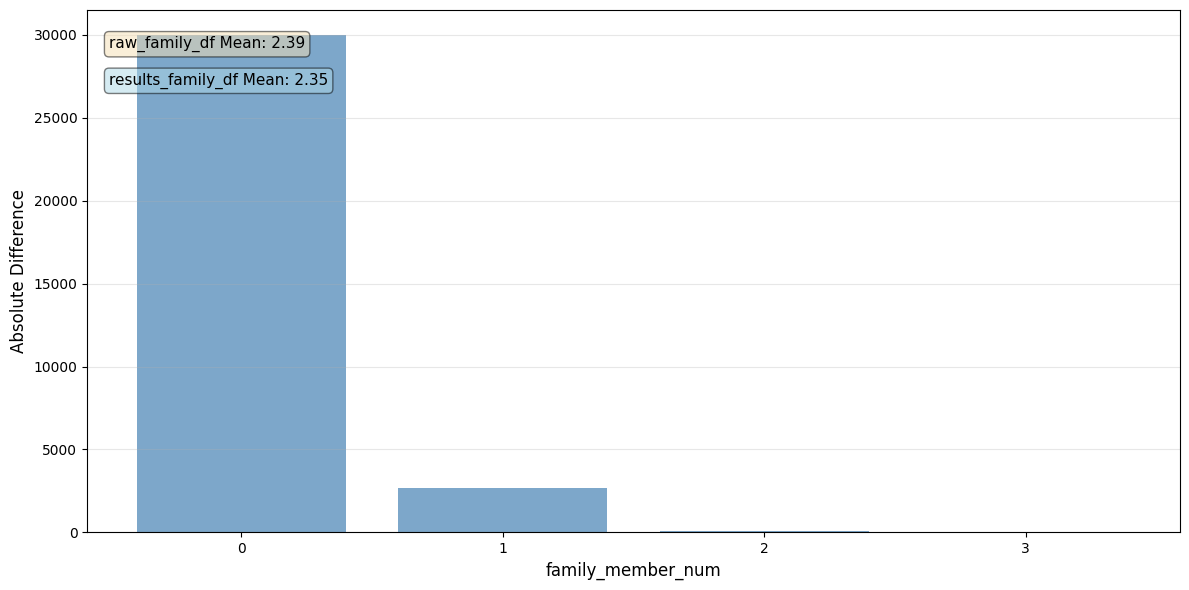

In [68]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_家庭成员数量'] - results_family_df['family_家庭成员数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_member_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.895355224609375


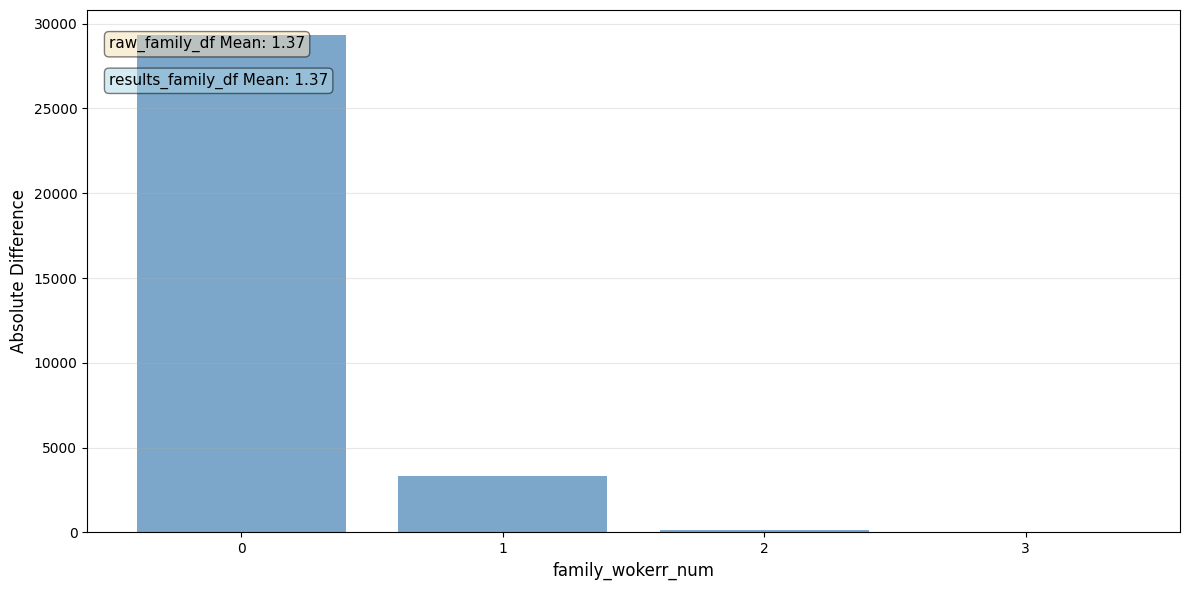

In [69]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_家庭工作人口数'] - results_family_df['family_家庭工作人口数'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_wokerr_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.974029541015625


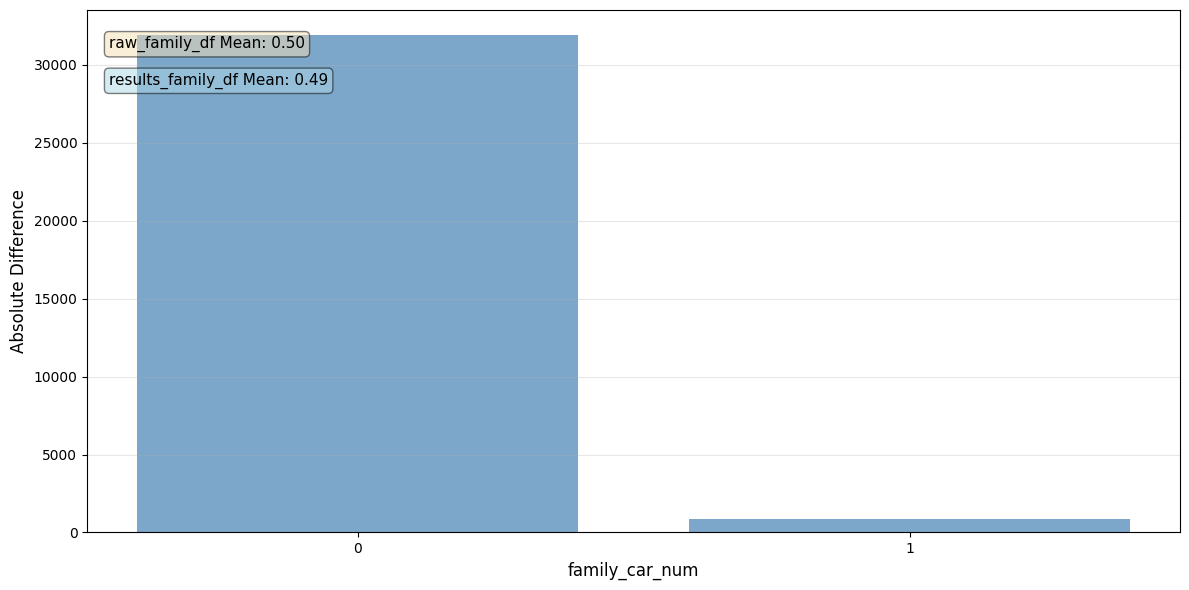

In [70]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_机动车数量'] - results_family_df['family_机动车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_car_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.871002197265625


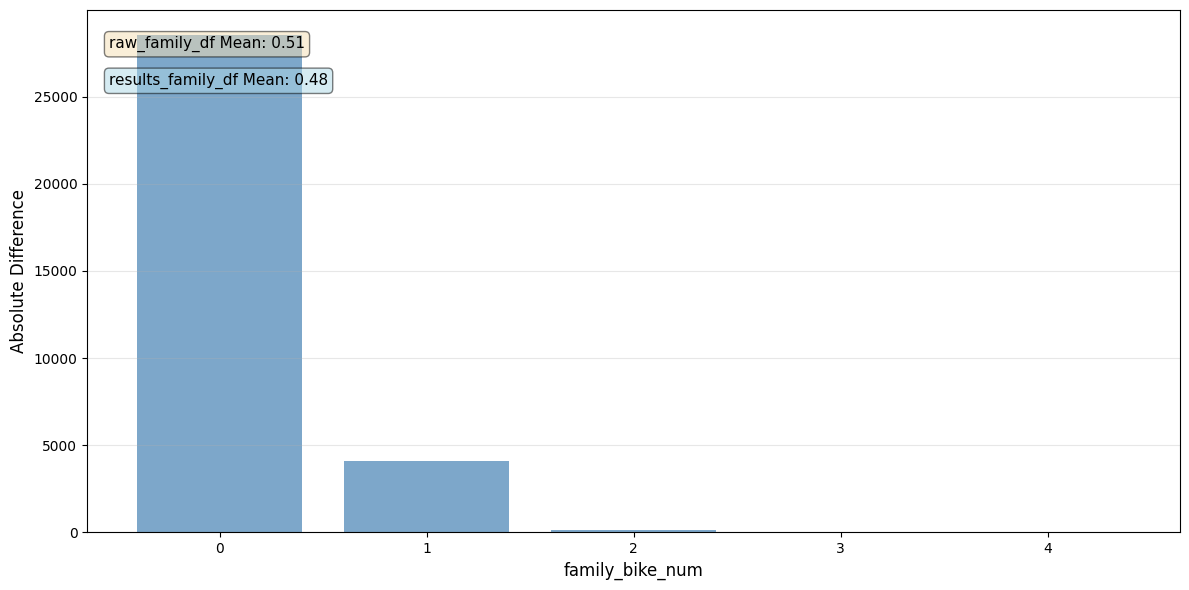

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_脚踏自行车数量'] - results_family_df['family_脚踏自行车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_bike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.90411376953125


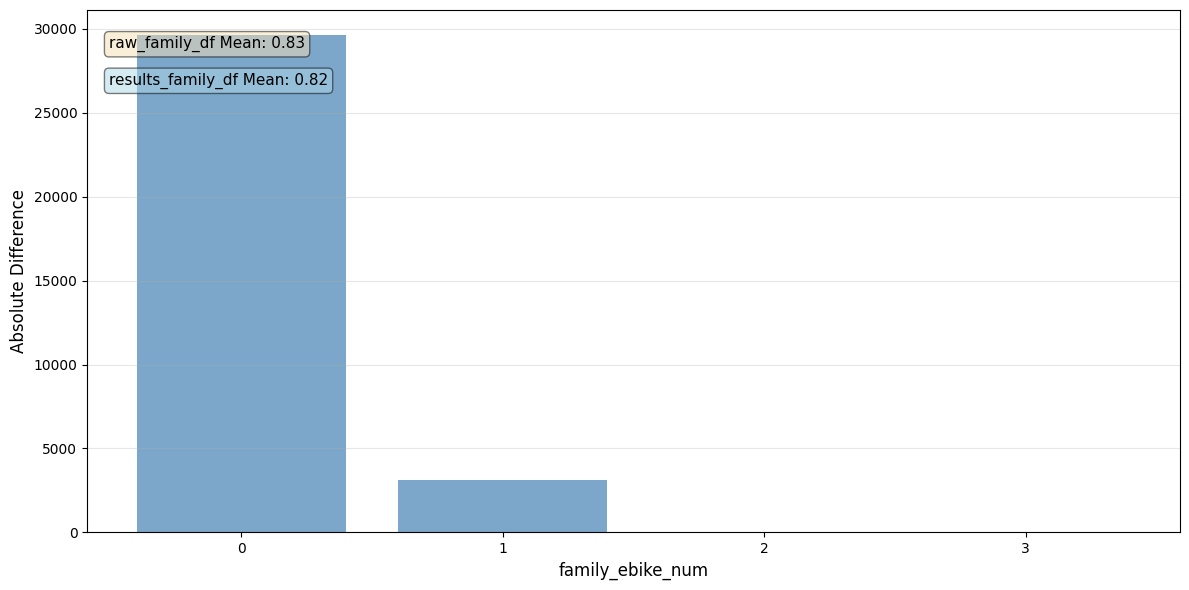

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_电动自行车数量'] - results_family_df['family_电动自行车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_ebike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.999908447265625


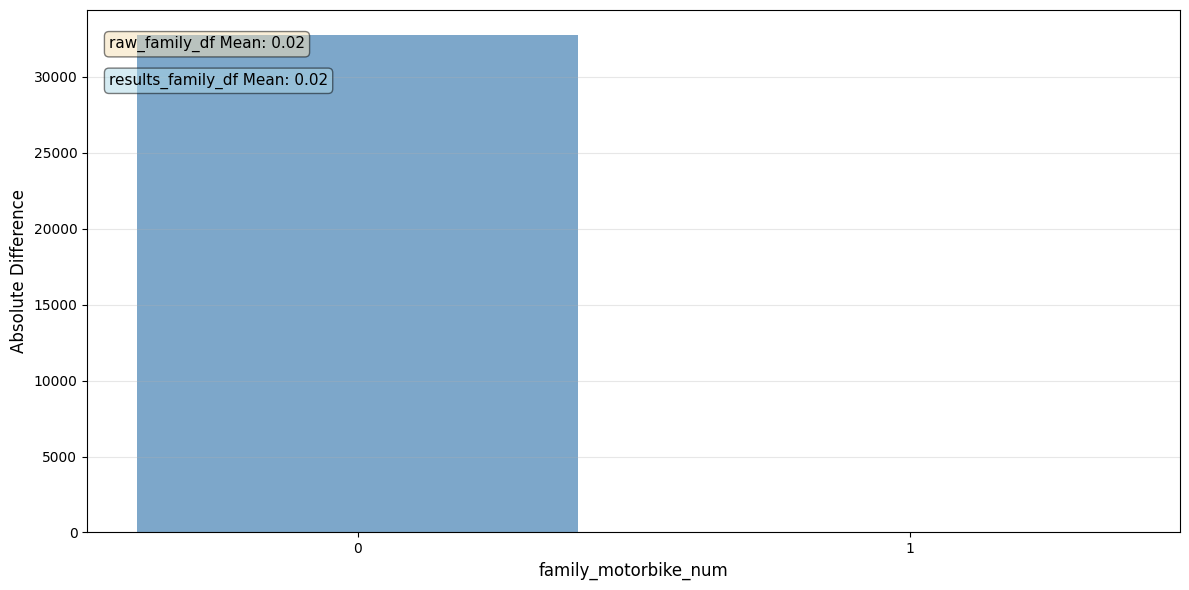

In [73]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_摩托车数量'] - results_family_df['family_摩托车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_motorbike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.9989013671875


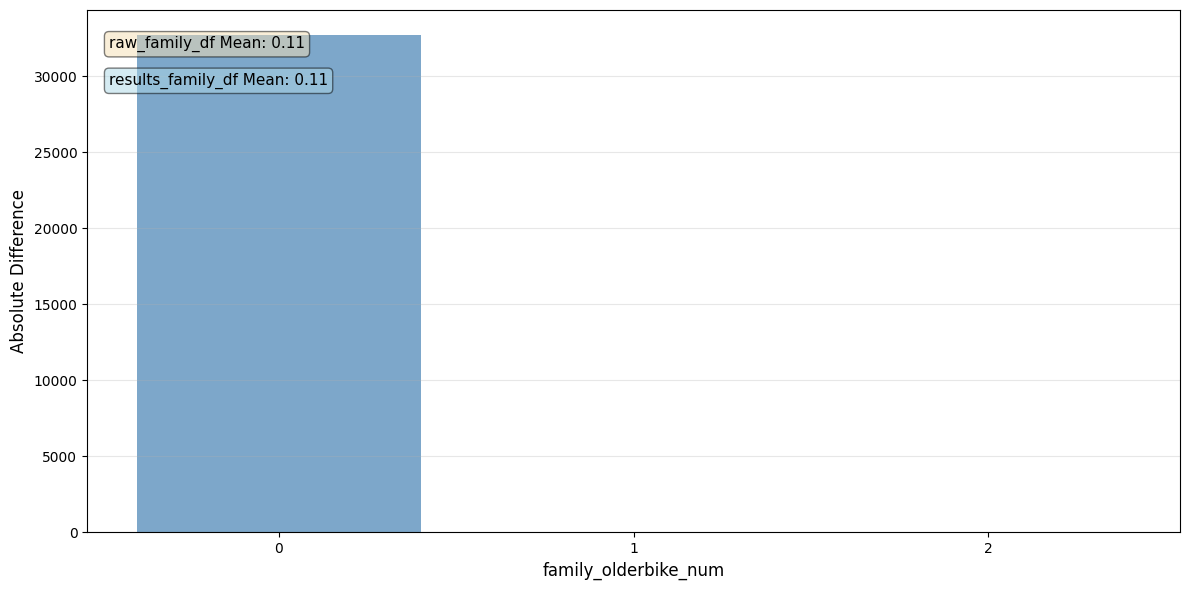

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_老年代步车数量'] - results_family_df['family_老年代步车数量'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_olderbike_num', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

0.753143310546875


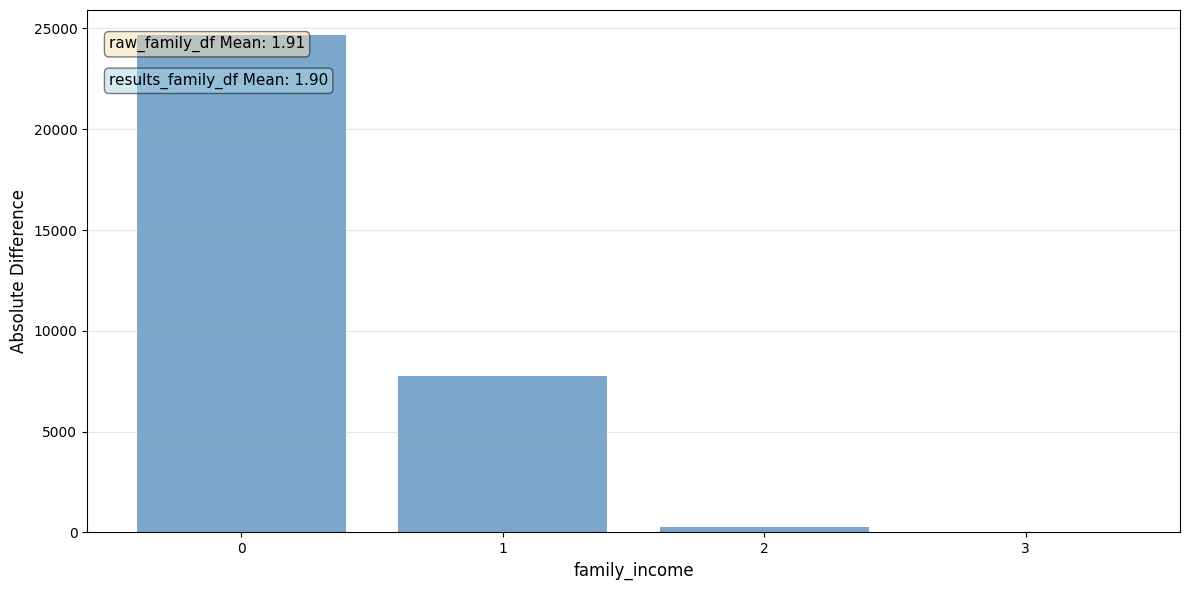

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_family_df['family_家庭年收入'] - results_family_df['family_家庭年收入'])
print((differences==0).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('family_income', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [76]:
(raw_family_df['have_student'] == results_family_df['have_student']).sum()/len(raw_family_df)

0.99774169921875

### 个人的

0.8078564128768523


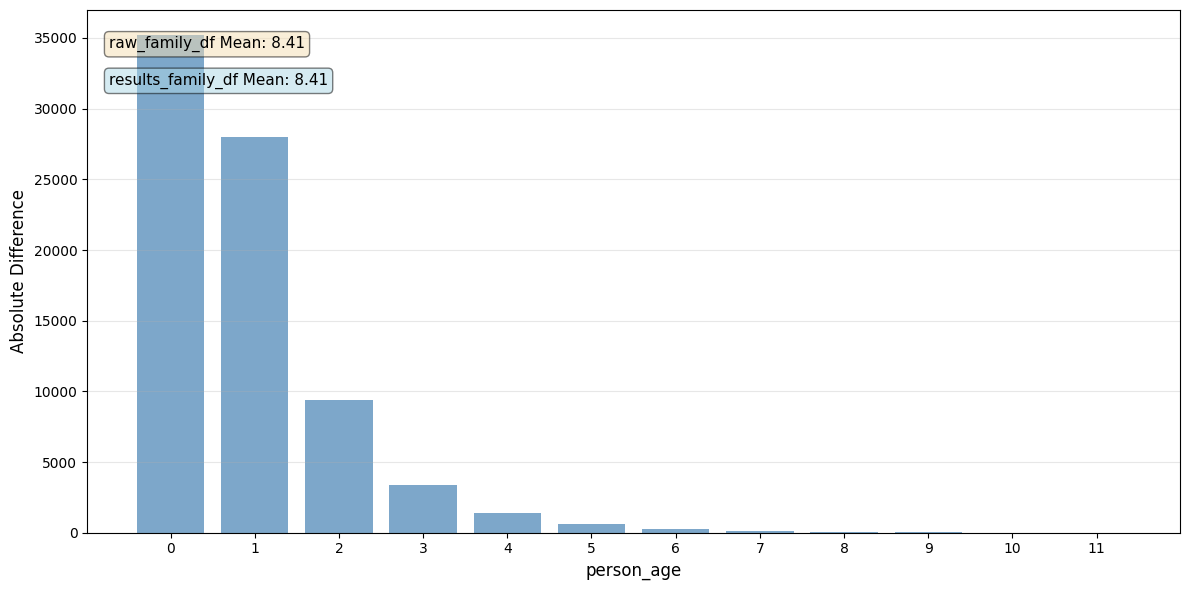

In [77]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 计算绝对差异
differences = abs(raw_person_df['age'] - results_person_df['age'])
print((differences<=1).sum()/len(differences))
differences_stas = differences.value_counts()
# 计算两个数据源的均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(differences_stas.index, differences_stas.values, alpha=0.7, color='steelblue')
plt.xticks(differences_stas.index)
plt.xlabel('person_age', fontsize=12)
plt.ylabel('Absolute Difference', fontsize=12)
# plt.title('家庭成员数量绝对差异分布', fontsize=14, fontweight='bold')

# 在空白处添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [78]:
(raw_person_df['gender'] == results_person_df['gender']).sum()/len(raw_person_df)

0.903104241185488

In [79]:
(raw_person_df['license'] == results_person_df['license']).sum()/len(raw_person_df)

0.9244762391415432

In [80]:
(raw_person_df['relation'] == results_person_df['relation']).sum()/len(raw_person_df)

0.8415687276443536

In [81]:
(raw_person_df['education'] == results_person_df['education']).sum()/len(raw_person_df)

0.7872508942258559

In [82]:
(raw_person_df['occupation'] == results_person_df['occupation']).sum()/len(raw_person_df)

0.7944302503832397

## 精度比较2： 分布比较

### 家庭的

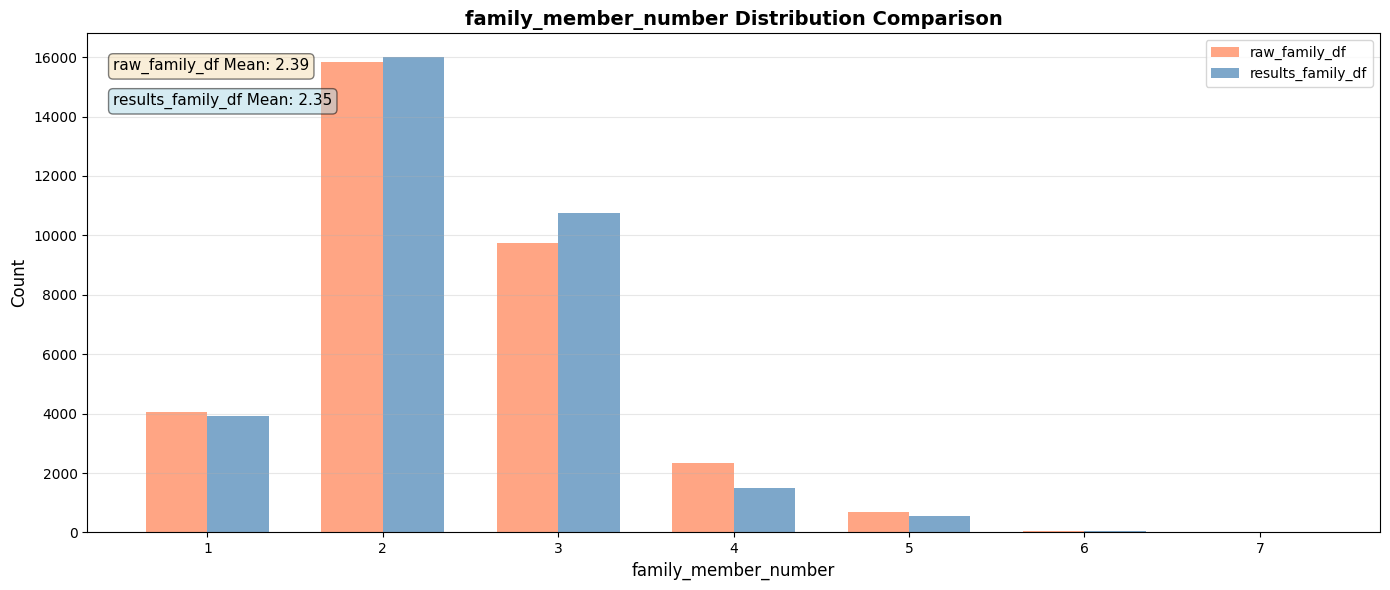

In [83]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭成员数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭成员数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_member_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_member_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

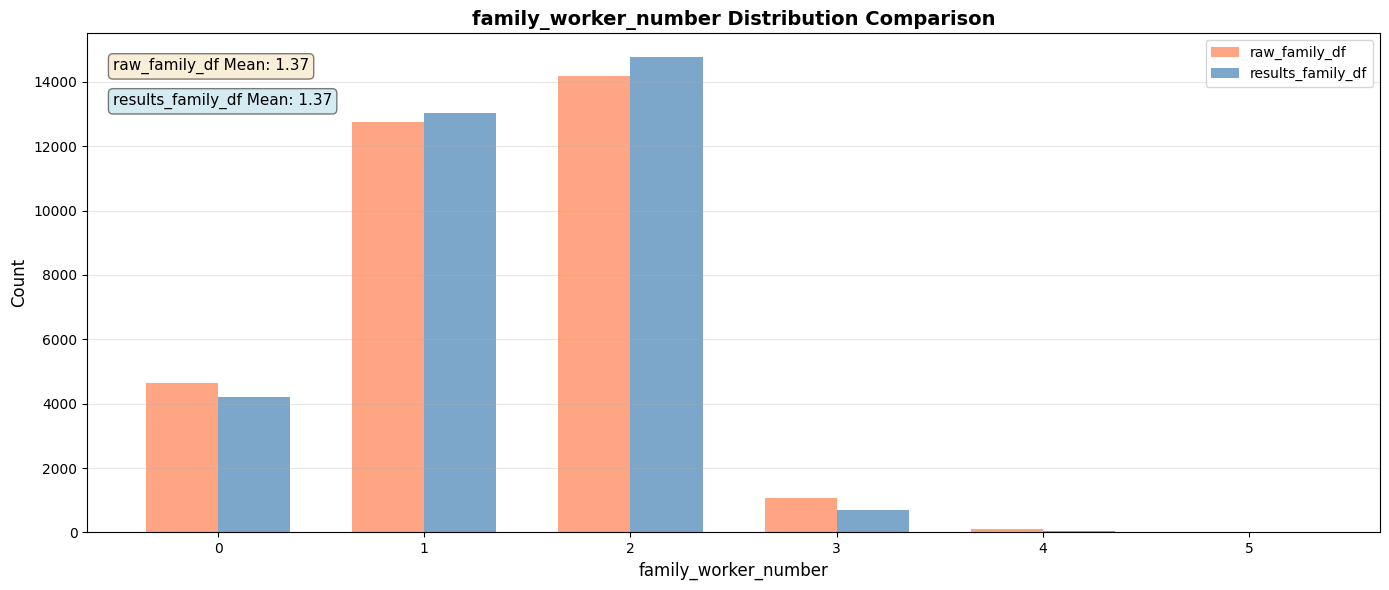

In [84]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭工作人口数'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭工作人口数'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_worker_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_worker_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

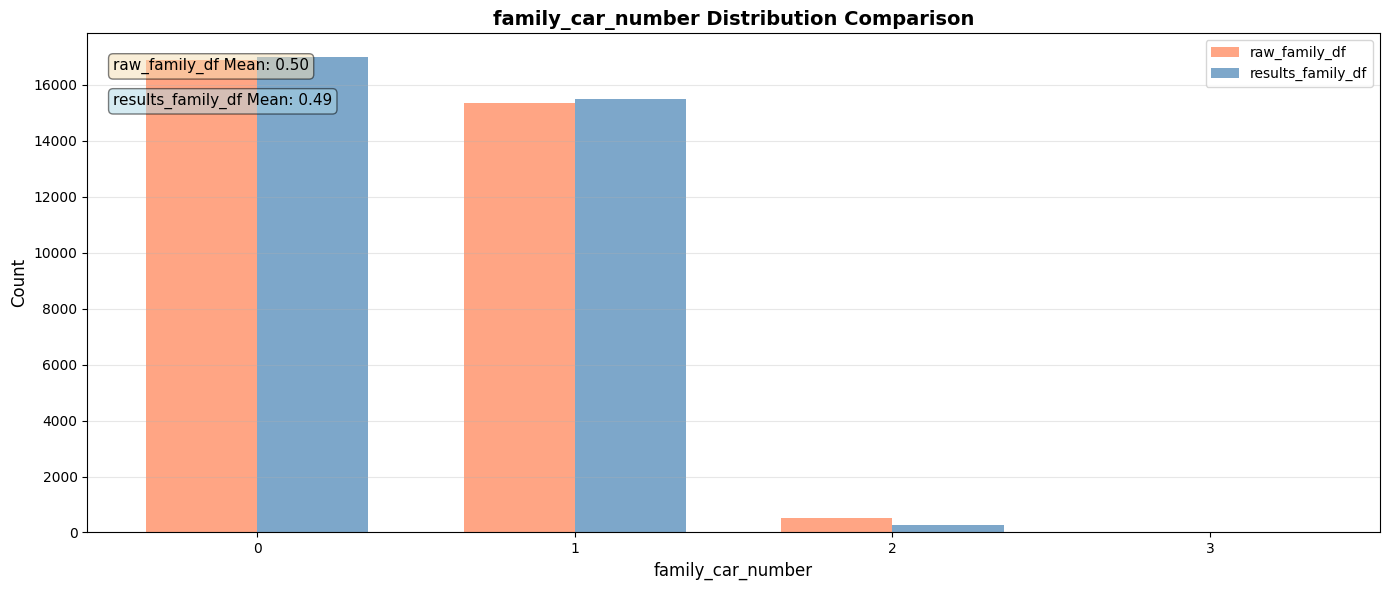

In [85]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_机动车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_机动车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_car_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_car_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

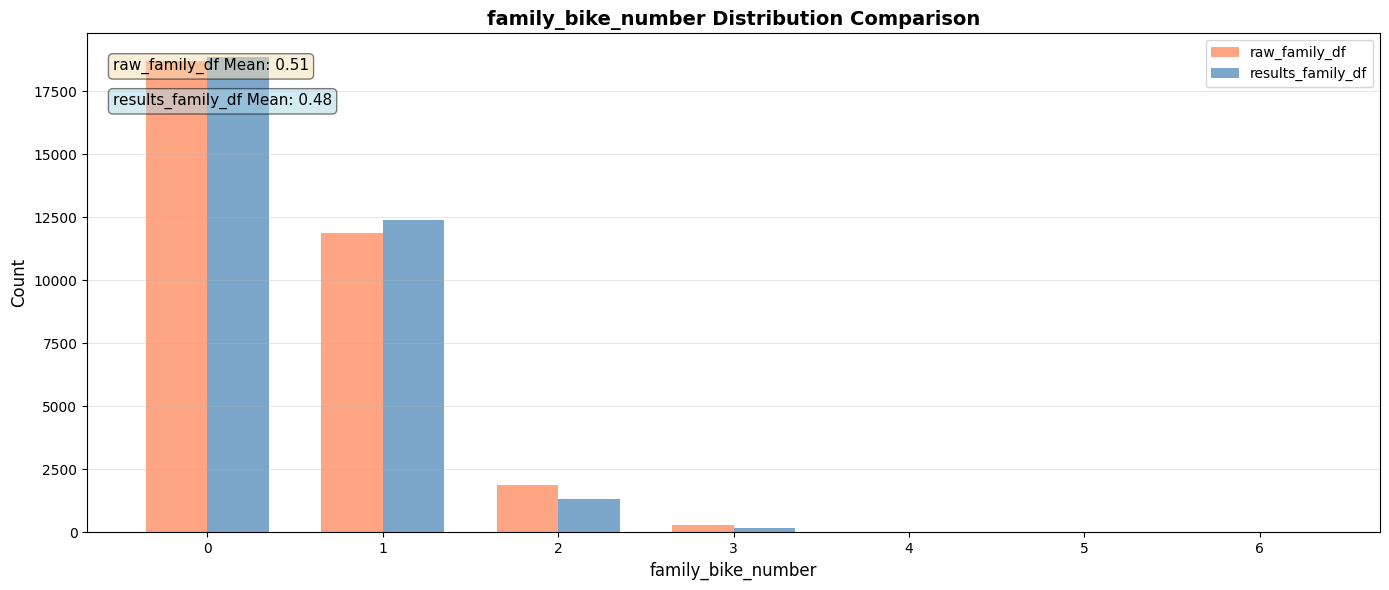

In [86]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_脚踏自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_脚踏自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_bike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_bike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

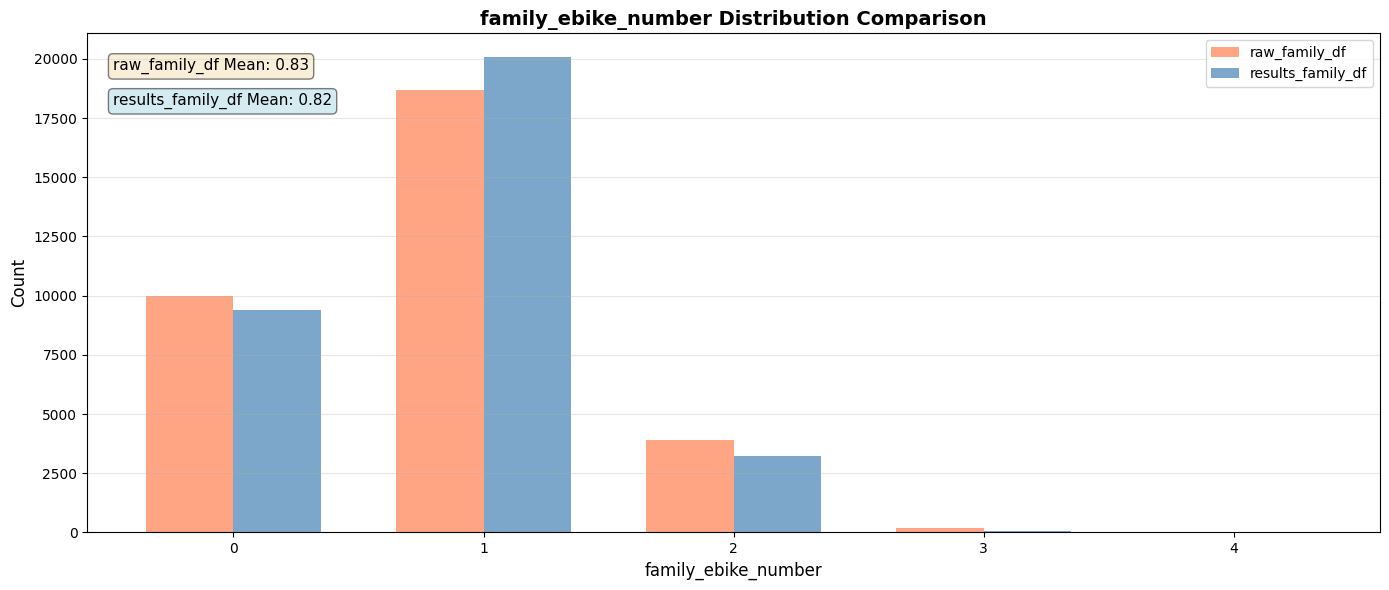

In [87]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_电动自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_电动自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_ebike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_ebike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

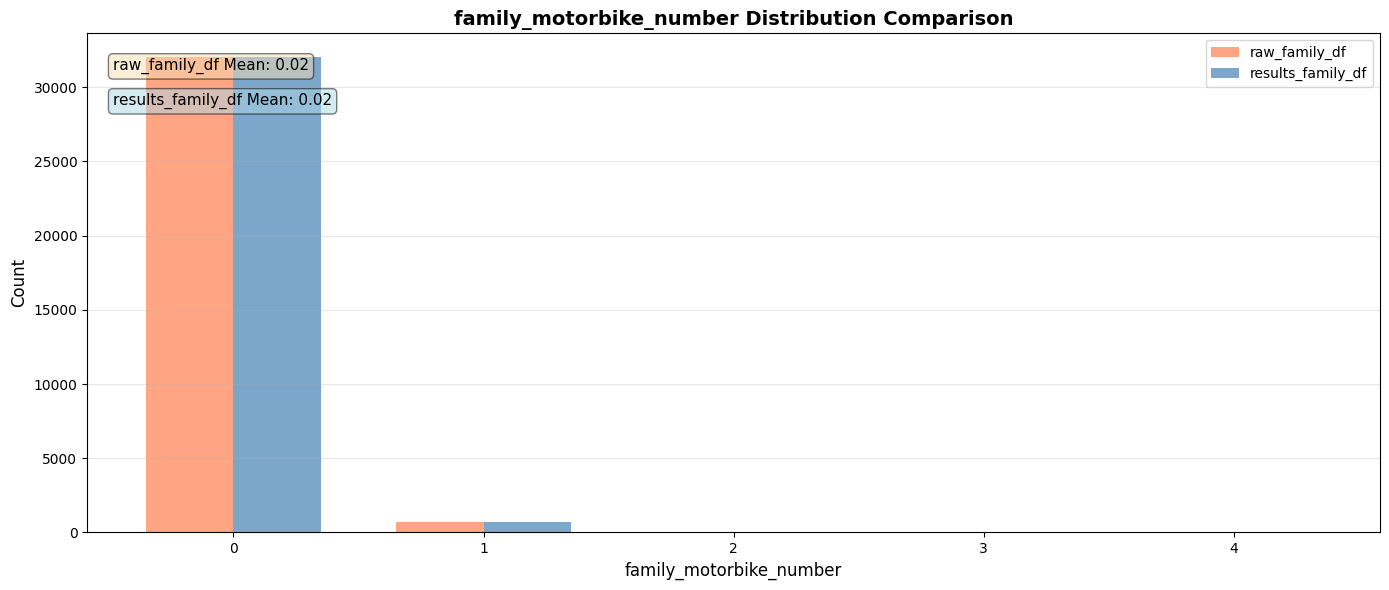

In [88]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_摩托车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_摩托车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_motorbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_motorbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

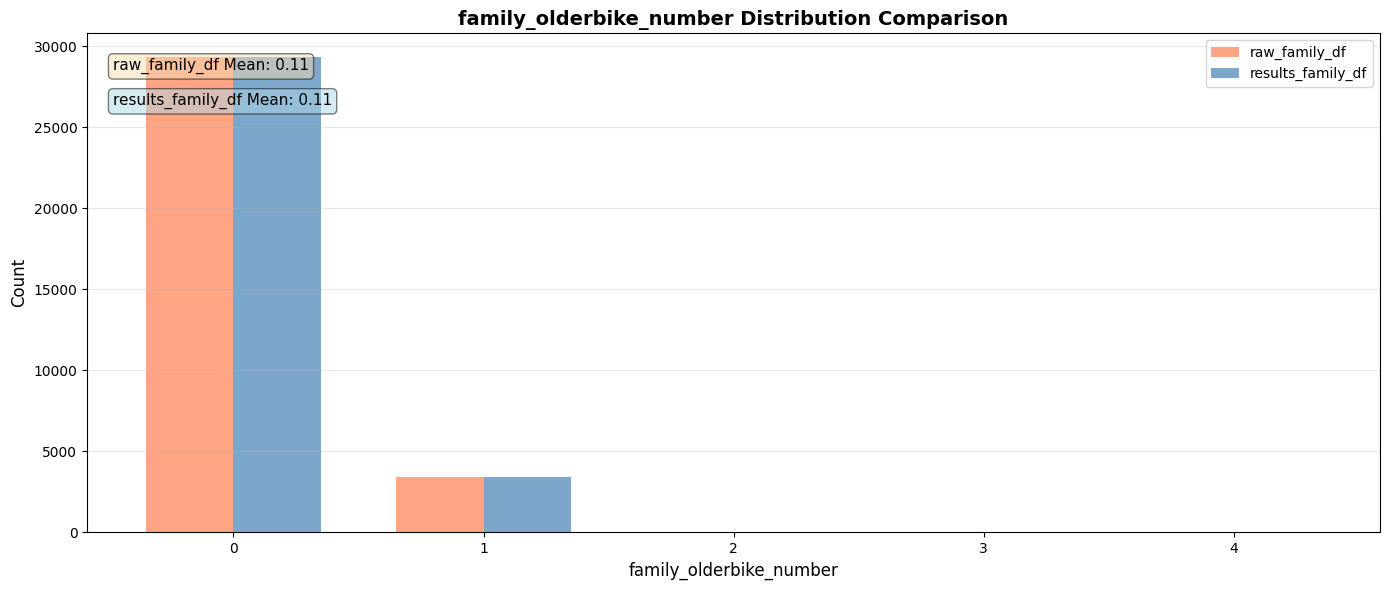

In [89]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_老年代步车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_老年代步车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_olderbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_olderbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

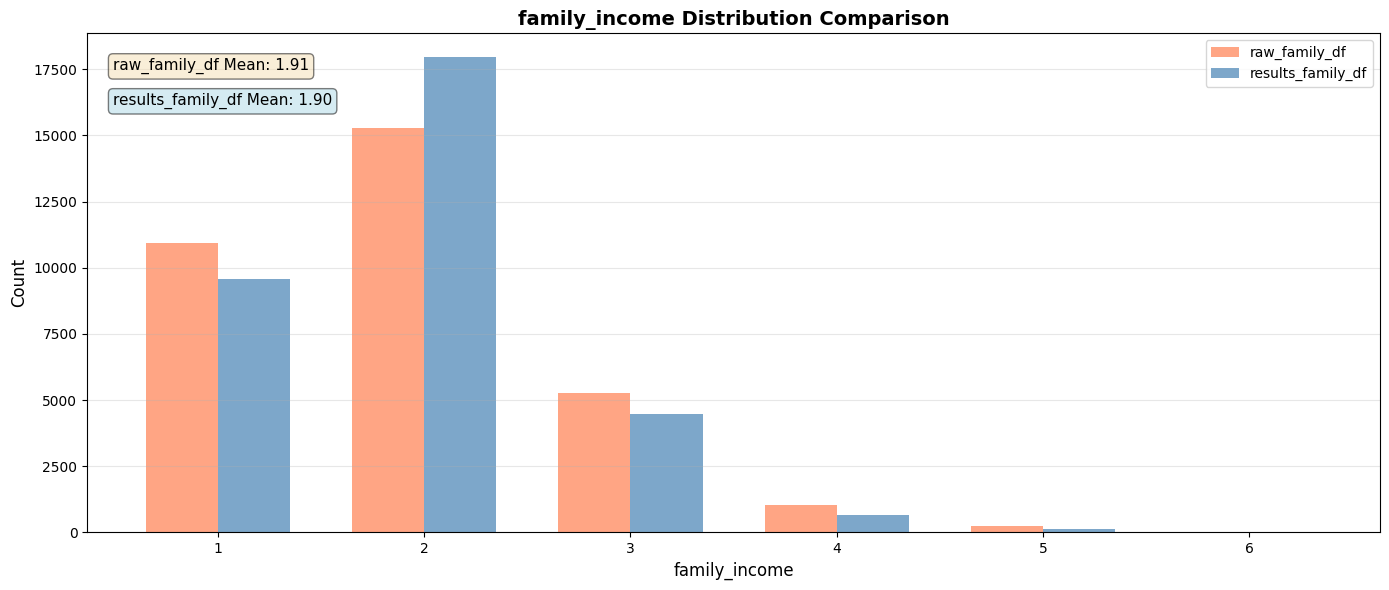

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭年收入'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭年收入'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_income Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

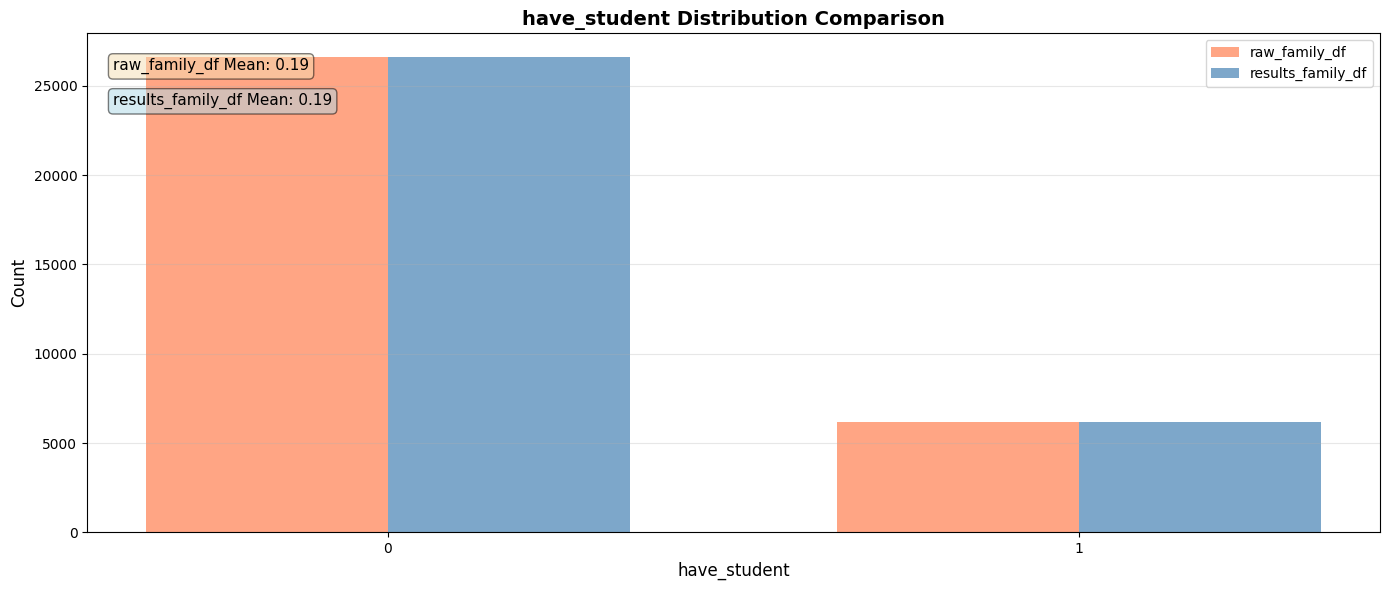

In [91]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['have_student'].value_counts().sort_index()
results_age_counts = results_family_df['have_student'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['have_student'].mean()
results_mean = results_family_df['have_student'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('have_student', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('have_student Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 个人的

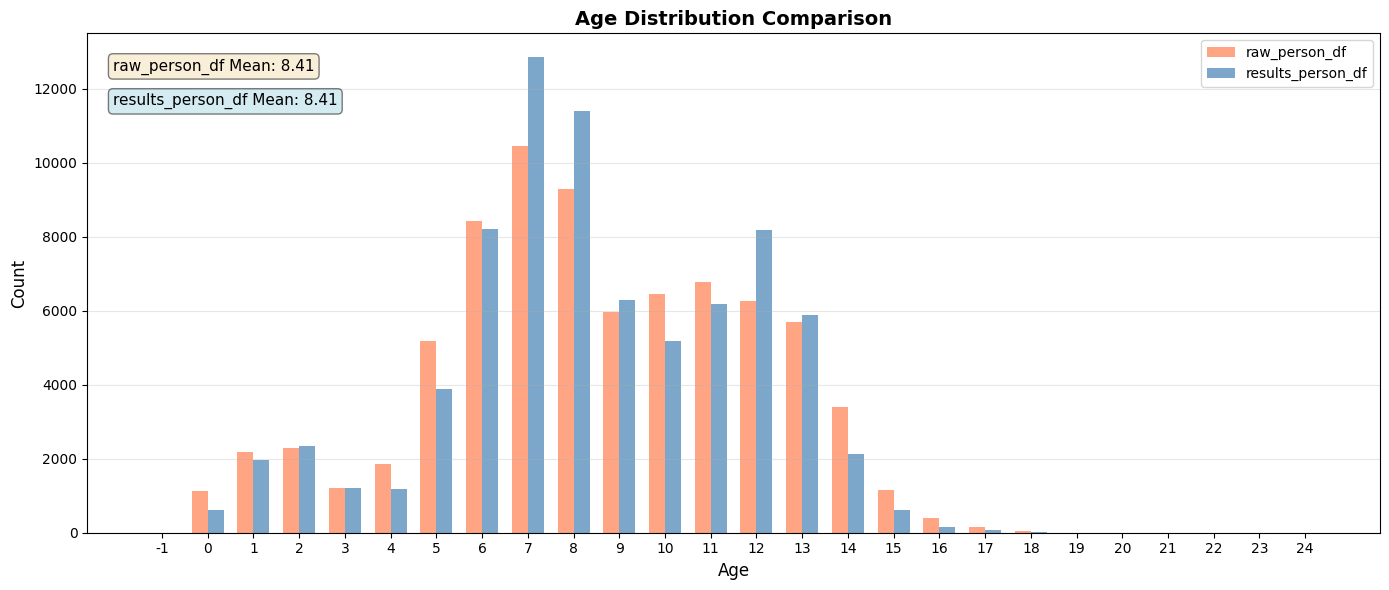

In [92]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['age'].value_counts().sort_index()
results_age_counts = results_person_df['age'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

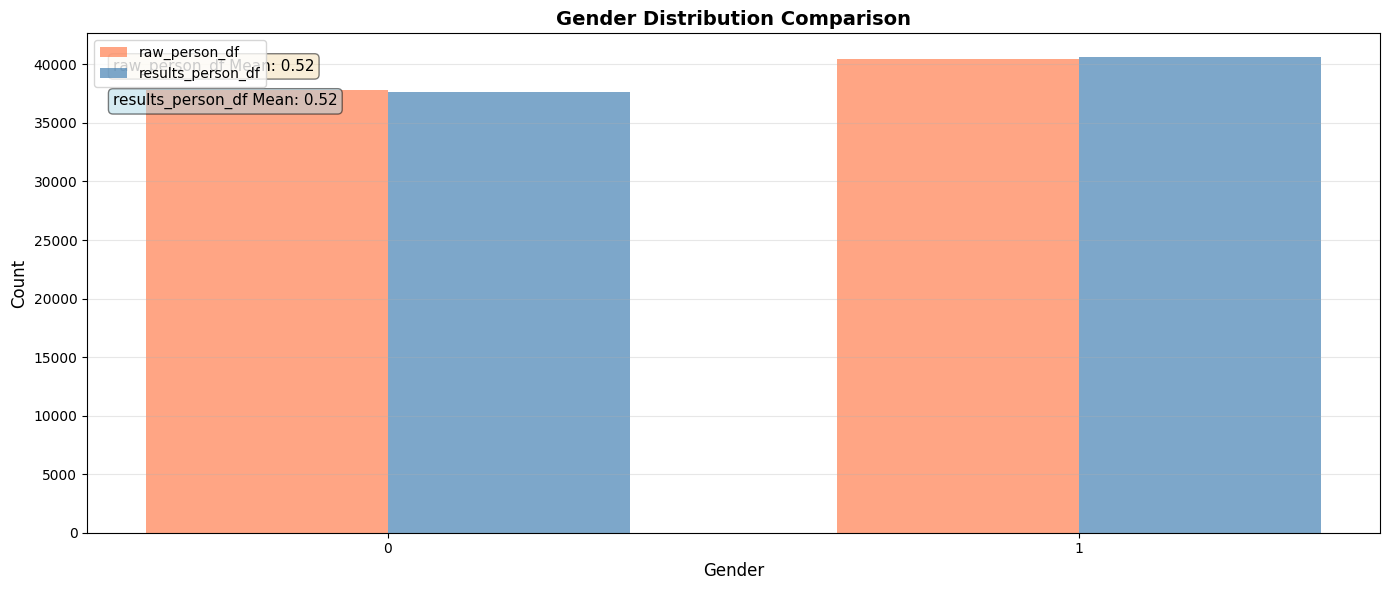

In [93]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['gender'].value_counts().sort_index()
results_age_counts = results_person_df['gender'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['gender'].mean()
results_mean = results_person_df['gender'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

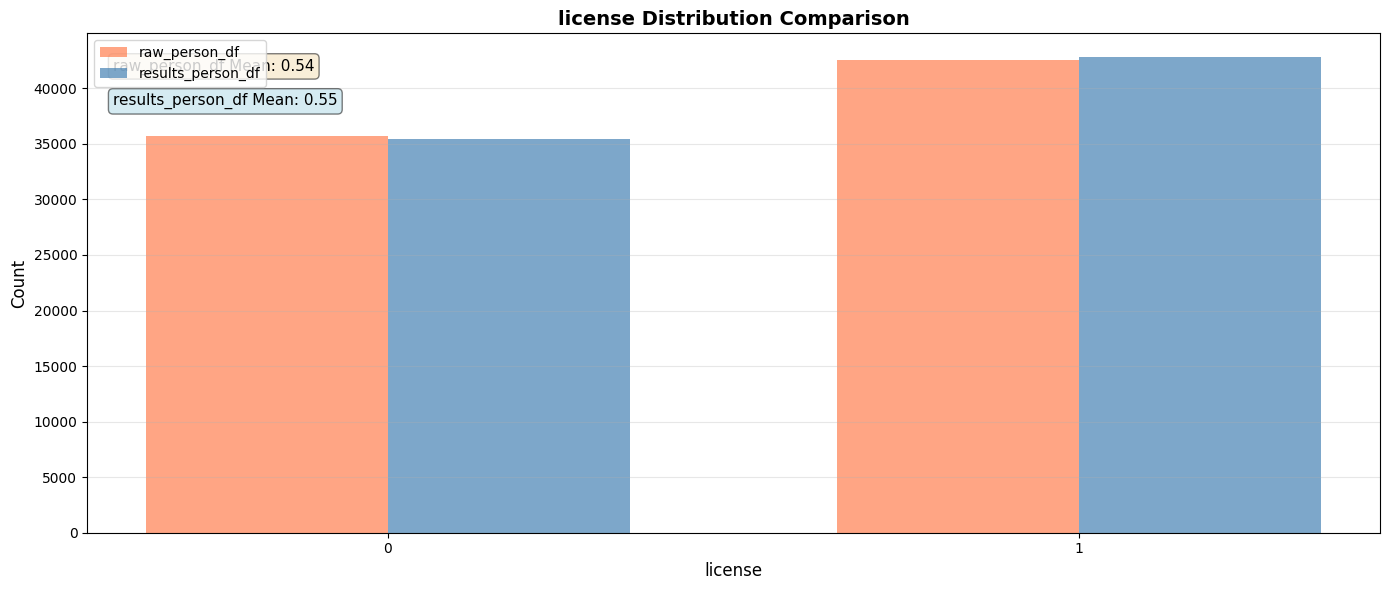

In [94]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['license'].value_counts().sort_index()
results_age_counts = results_person_df['license'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['license'].mean()
results_mean = results_person_df['license'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('license', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('license Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

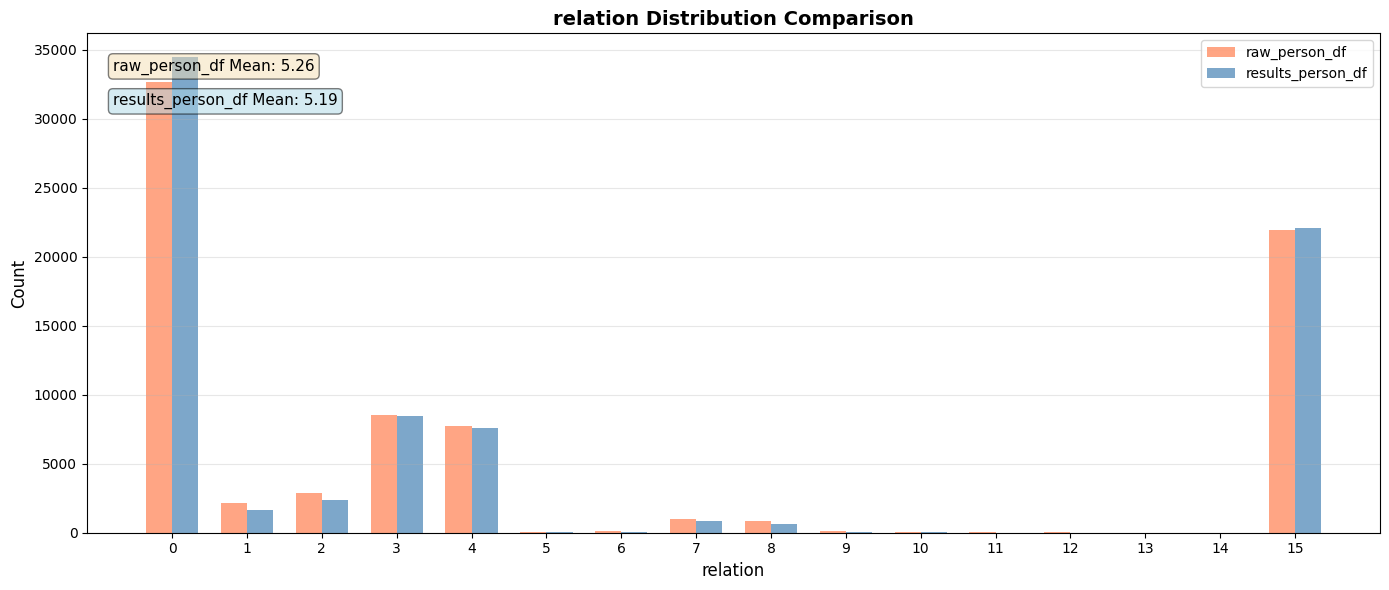

In [95]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['relation'].value_counts().sort_index()
results_age_counts = results_person_df['relation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['relation'].mean()
results_mean = results_person_df['relation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('relation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('relation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

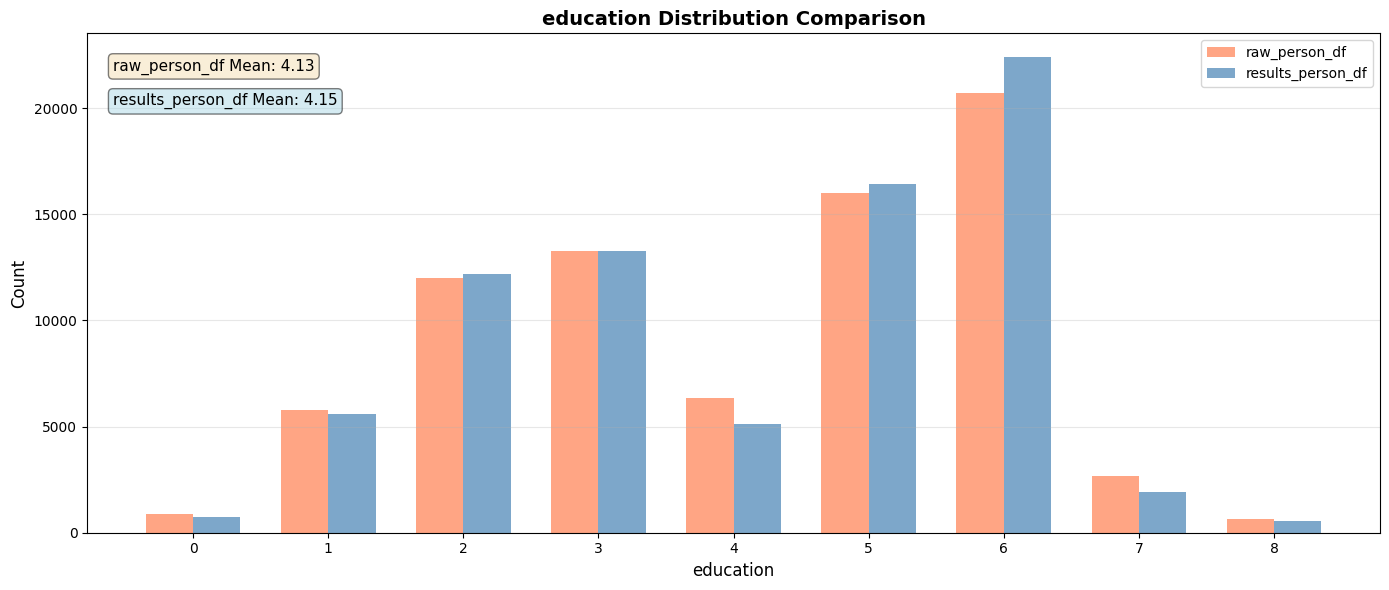

In [96]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['education'].value_counts().sort_index()
results_age_counts = results_person_df['education'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['education'].mean()
results_mean = results_person_df['education'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('education Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

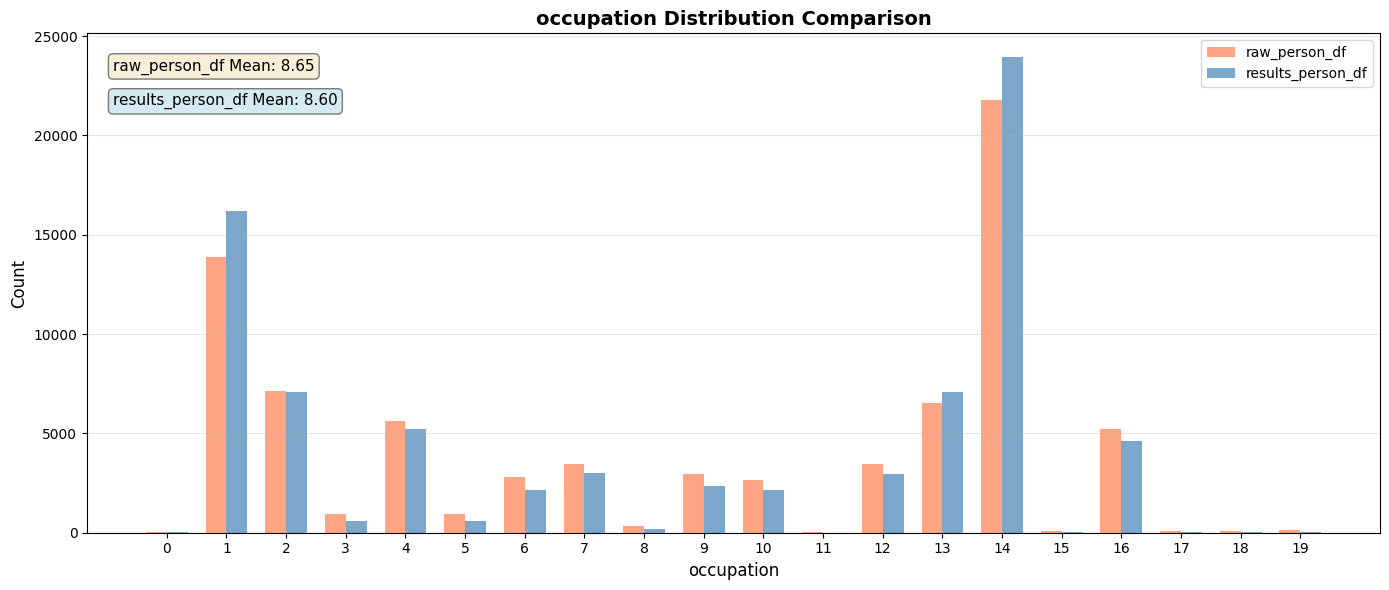

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['occupation'].value_counts().sort_index()
results_age_counts = results_person_df['occupation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['occupation'].mean()
results_mean = results_person_df['occupation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('occupation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 扩散模型去噪生成

## 分类器引导函数定义

### 简单引导函数测试

In [33]:
def guidance_fn_test(x, t, **kwargs):
    # Ensure x requires grad for gradient computation
    with torch.enable_grad():
        x_t_grad = x.detach().requires_grad_(True)
        target_family = torch.zeros_like(x_t_grad)
        loss = -F.mse_loss(x_t_grad, target_family)

        # Compute gradient with respect to x
        gradient = torch.autograd.grad(outputs=loss, inputs=x_t_grad)[0]
    return 100000 * gradient

### 引导函数代码

In [1]:
import rasterio
from rasterio.plot import show
import numpy as np

# 读取 GeoTIFF
with rasterio.open('数据/人口数据/人口数据/landscan-global-2022-assets/landscan-global-2022-colorized.tif') as src:
    # 读取数据
    img = src.read()  # 返回 (bands, height, width)
    
    # 读取单个波段
    band1 = src.read(1)
    
    # 获取元数据
    print(f"投影: {src.crs}")
    print(f"范围: {src.bounds}")
    print(f"分辨率: {src.res}")
    print(f"波段数: {src.count}")
    print(f"数据类型: {src.dtypes}")
    print(f"NoData值: {src.nodata}")
    
    # 获取地理变换参数
    transform = src.transform
    
    # 可视化
    # show(src)



投影: EPSG:4326
范围: BoundingBox(left=-180.0, bottom=-90.0, right=179.99999999999858, top=89.99999999999929)
分辨率: (0.0083333333333333, 0.0083333333333333)
波段数: 4
数据类型: ('uint8', 'uint8', 'uint8', 'uint8')
NoData值: None


In [2]:
transform

Affine(0.0083333333333333, 0.0, -180.0,
       0.0, -0.0083333333333333, 89.99999999999929)

In [3]:
# 读取为 numpy 数组（简化）
with rasterio.open('数据/人口数据/人口数据/landscan-global-2022-assets/landscan-global-2022-colorized.tif') as src:
    img_array = src.read(1)  # 读取第一个波段

In [5]:
img_array.shape

(21600, 43200)

## 数据生成

In [ ]:
## 数据生成
from population_DiT_cluster10_memberbundle import *
import torch
torch.manual_seed(0) # CPU 随机数种子
torch.cuda.manual_seed(0) # 当前 GPU 随机数种子
torch.cuda.manual_seed_all(0) # 所有 GPU 随机数种子
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

import argparse
import logging
import os
import numpy as np
import sys
from collections import OrderedDict
from copy import deepcopy
from glob import glob
from time import time
from tqdm import tqdm

sys.path.append('DiT-main')
# Now import DiTBlock from models
from models import DiTBlock, DiTBlockPerson
from diffusion import create_diffusion, create_diffusion_family, create_diffusion_all

from losses_personmask_memberbundle5 import compute_total_loss
from dataset import load_population_data, create_dataloader

cluster_info = torch.from_numpy(family2023['cluster'].values.astype(int))

# 加载模型
model_result = load_population_dit_checkpoint("results/018-PopulationDiT-1029-更改了个人的条件机制/checkpoints/final.pt")
args = model_result['args']
model = model_result['model']
model.eval()
diffusion = create_diffusion_all('1000', diffusion_steps = 200, predict_xstart=True, learn_sigma=False)
class_labels = cluster_info[:10000]  # 假设我们有1000个家庭样本
family_features = 10  # 假设每个家庭成员有10个特征
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
max_nodes = 8  # 假设每个家庭最多有8个成员
person_features = 51

n = len(class_labels)
z = torch.randn(n, 10, device=device)
y = class_labels.clone().detach().to(device)

# Setup classifier-free guidance:
z_family = z

z_person = torch.randn(n, max_nodes, person_features, device=device)

noise_to_member = z.repeat(8, 5).view(z_person.shape[0], z_person.shape[1], -1)
noise_to_member = torch.cat([noise_to_member, torch.zeros_like(z_person[:, :, 0]).view(z_person.shape[0], z_person.shape[1], 1)], dim=-1)
rho = 0.85
z_person =  noise_to_member * rho + math.sqrt(1 - rho ** 2) * z_person

t = torch.randint(0, 200, (n,), device=device).long()
model_kwargs = dict(cluster=y)

# with torch.no_grad():
#     samples, samples_person, hgt_data = model.reference_all(
#         [z_family, z_person], t, y
#     )

# Sample images:
sample_family, sample_person, pred_person = diffusion.p_sample_loop(
    model.reference_all, z_family.shape, [z_family, z_person], clip_denoised=False, model_kwargs=model_kwargs, progress=True, device=device
)

samples = sample_family
samples_person = sample_person

Loading checkpoint from results/018-PopulationDiT-1029-更改了个人的条件机制/checkpoints/final.pt
Model parameters:
  - Hidden size: 320
  - Depth: 32
  - Num heads: 16
  - Max family size: 8
✅ EMA model loaded successfully
✅ Checkpoint loaded successfully!
  - Epoch: 500
  - Train steps: 16000


100%|██████████| 5/5 [00:35<00:00,  7.10s/it]


In [129]:
results_family_df = pd.DataFrame(samples.cpu().numpy())
results_family_df['have_student'] = results_family_df[[8,9]].values.argmax(axis=1)

results_family_df = results_family_df[[0,1,2,3,4,5,6,7,'have_student']]
results_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','income','have_student']

results_family_df.rename(columns = {'income' : 'family_家庭年收入'}, inplace=True)
decode_results_family = test.decode_family_continuous(results_family_df)
for col in decode_results_family.keys():
    results_family_df[f'family_{col}'] = decode_results_family[col]


In [130]:
person_mask = torch.zeros((n, max_nodes), device=device)
for i in range(n):
    num_members = int(results_family_df.iloc[i]['family_家庭成员数量'])
    person_mask[i, :num_members] = 1

In [131]:
person_mask = person_mask.to(torch.bool)

In [132]:
results_person_df = pd.DataFrame(samples_person.cpu().numpy().reshape(-1,51))
real_person_ls = []
for i in results_family_df['family_家庭成员数量'].values:
    member_num = int(results_family_df.loc[i,'family_家庭成员数量'])
    real_person_ls.append(results_person_df.iloc[i*8: i*8 + member_num, :])

In [133]:
results_person_df = pd.concat(real_person_ls, ignore_index=True)

In [134]:
results_person_df['gender'] = results_person_df[[1,2]].values.argmax(axis=1)
results_person_df['license'] = results_person_df[[3,4]].values.argmax(axis=1)
results_person_df['relation'] = results_person_df.iloc[:,5:21].values.argmax(axis=1)
results_person_df['education'] = results_person_df.iloc[:,21:30].values.argmax(axis=1)
results_person_df['occupation'] = results_person_df.iloc[:,30:50].values.argmax(axis=1)


results_person_df = results_person_df[[0,'gender','license','relation','education','occupation',50]]
results_person_df.columns = ['age','gender','license','relation','education','occupation','label']


results_person_df['age'] = test.decode_person_continuous(results_person_df['age'])['age_actual']


In [135]:
raw_person_df = pd.merge(familymember_2023,family2023[['家庭编号']][:n])

In [136]:
raw_person_df = raw_person_df[['age','性别', '是否有驾照', '关系', '最高学历', '职业']]

In [137]:
encode_member_data = test.encode_person(raw_person_df)

In [138]:
raw_person_dict = {}

In [139]:
raw_person_dict['age'] = encode_member_data['person_age']
raw_person_dict['gender'] = encode_member_data['person_性别'].argmax(axis=1)
raw_person_dict['license'] = encode_member_data['person_是否有驾照'].argmax(axis=1)
raw_person_dict['relation'] = encode_member_data['person_关系'].argmax(axis=1)
raw_person_dict['education'] = encode_member_data['person_最高学历'].argmax(axis=1)
raw_person_dict['occupation'] = encode_member_data['person_职业'].argmax(axis=1)


In [140]:
raw_person_df = pd.DataFrame(raw_person_dict)

In [141]:
raw_person_df['age'] = test.decode_person_continuous(raw_person_df['age'])['age_actual']

In [142]:
raw_family_df = family2023[:n][['家庭成员数量','家庭工作人口数','机动车数量','脚踏自行车数量','电动自行车数量','摩托车数量','老年代步车数量','家庭年收入','have_student']]
raw_family_df.columns = ['family_家庭成员数量','family_家庭工作人口数','family_机动车数量','family_脚踏自行车数量','family_电动自行车数量','family_摩托车数量','family_老年代步车数量','family_家庭年收入','have_student']

In [143]:
raw_family_df = raw_family_df.astype(int)

## 精度比较2： 分布比较

### 家庭的

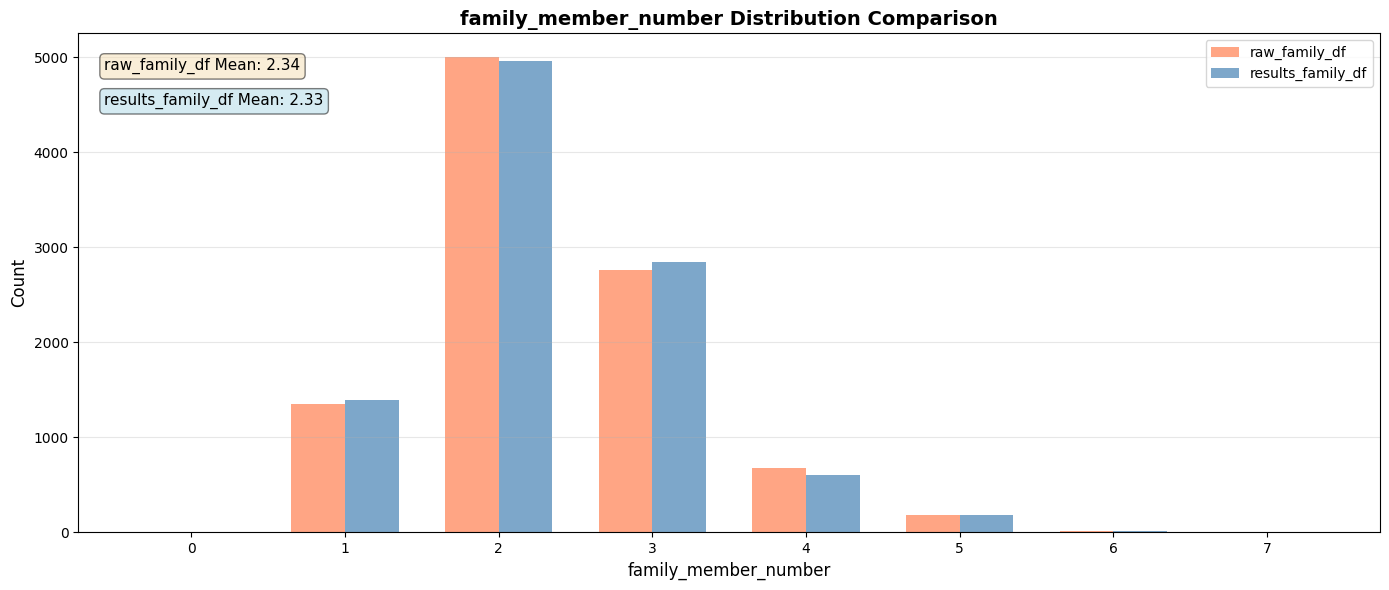

In [144]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭成员数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭成员数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_member_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_member_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

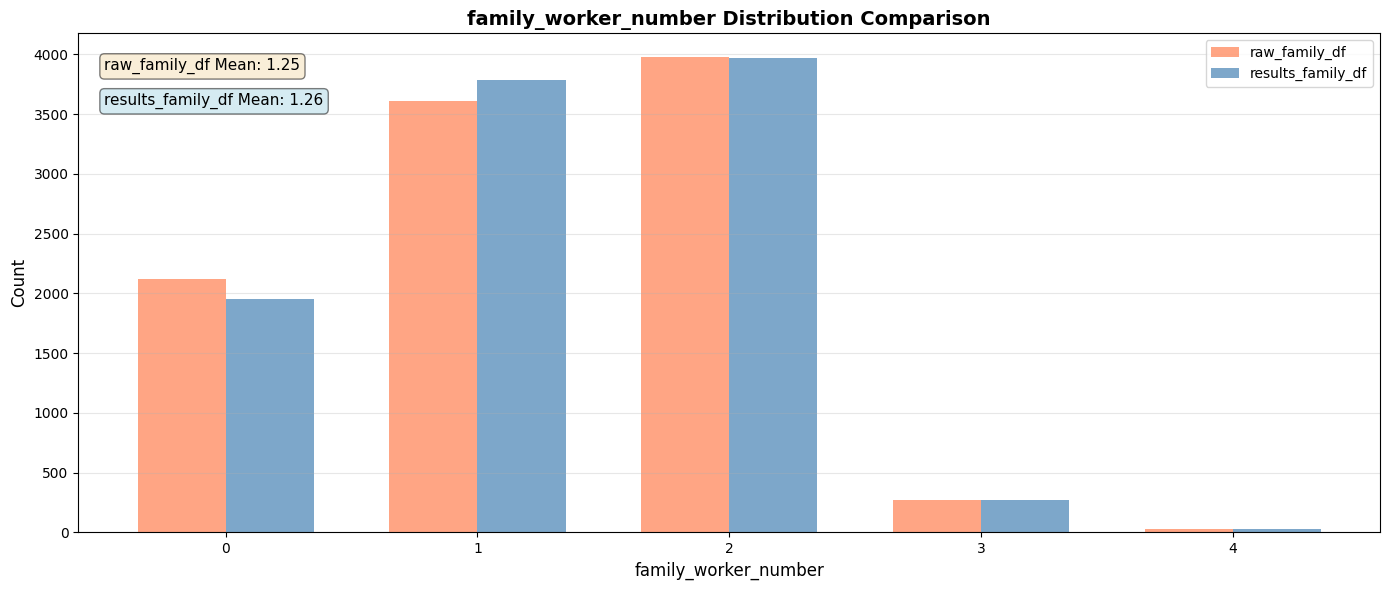

In [145]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭工作人口数'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭工作人口数'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_worker_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_worker_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

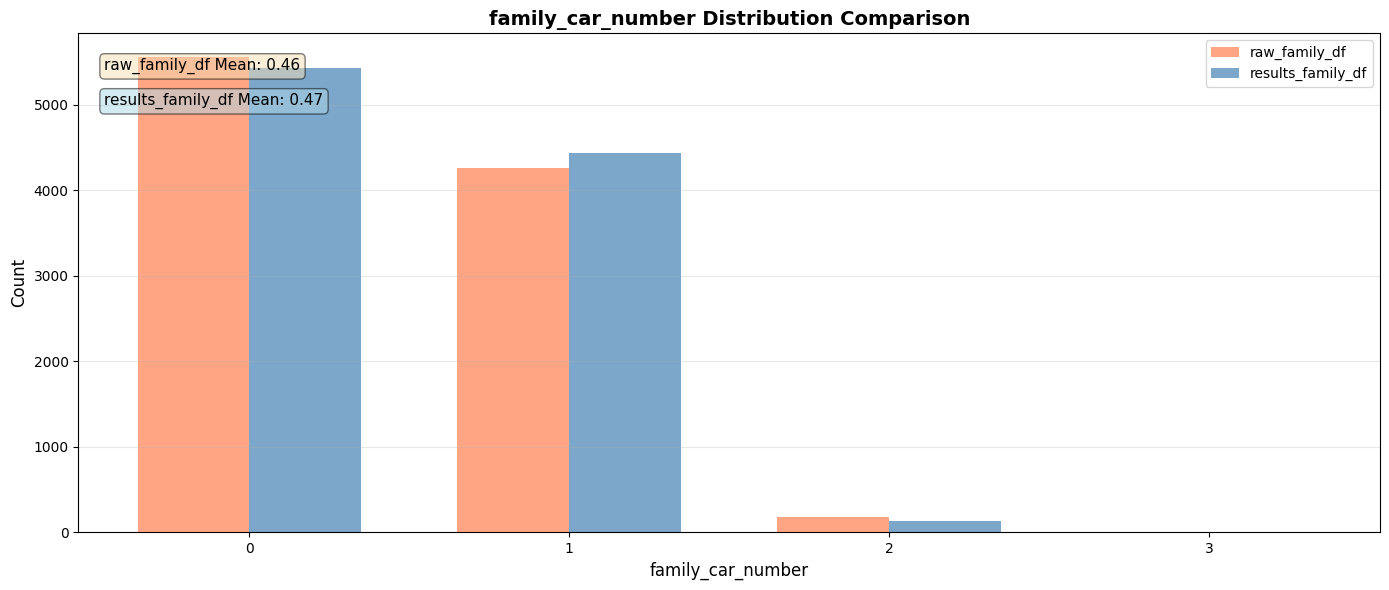

In [146]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_机动车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_机动车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_car_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_car_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

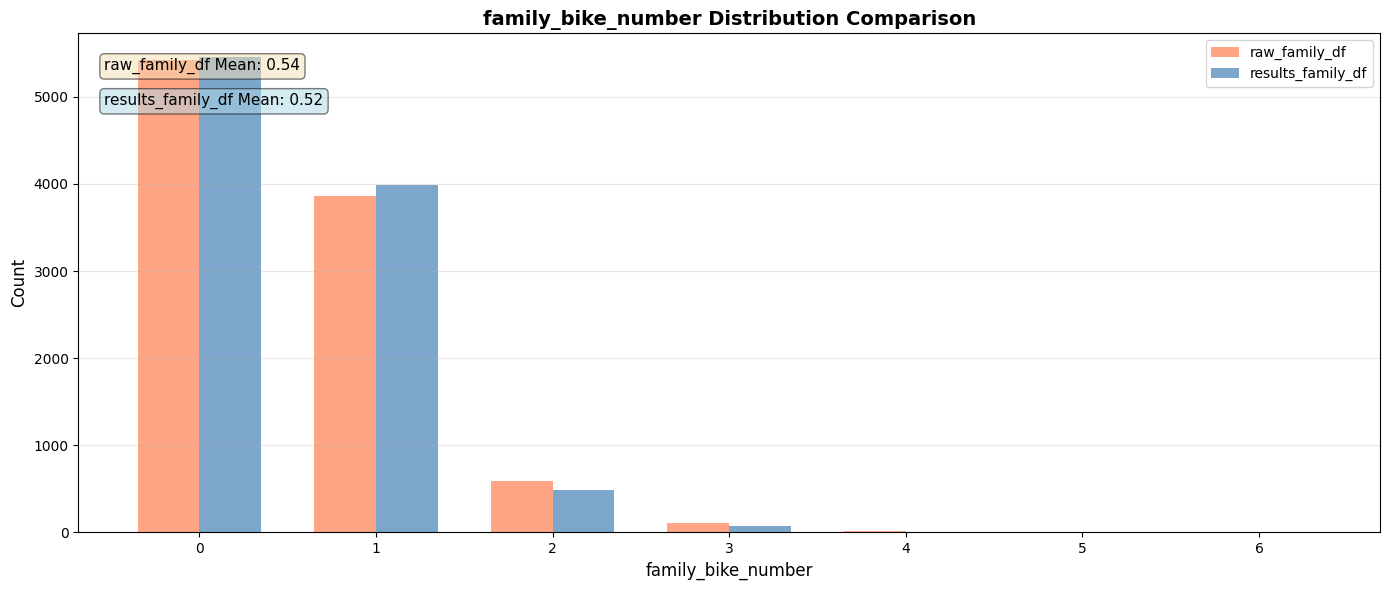

In [147]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_脚踏自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_脚踏自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_bike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_bike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

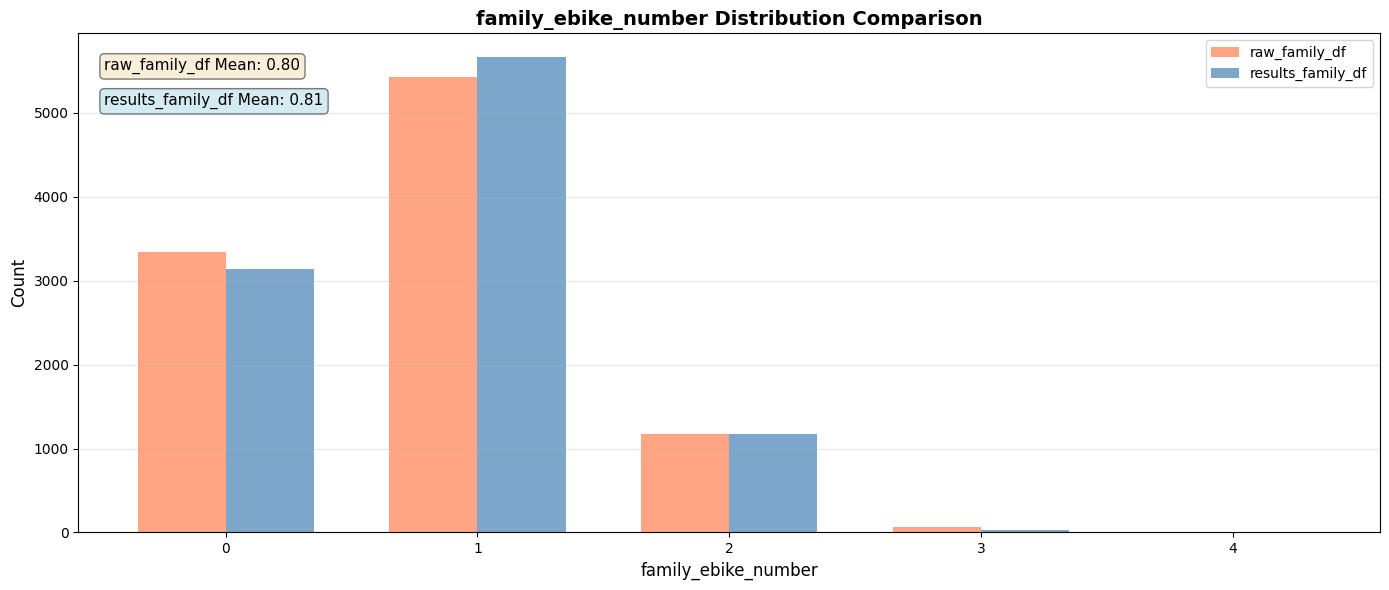

In [148]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_电动自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_电动自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_ebike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_ebike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

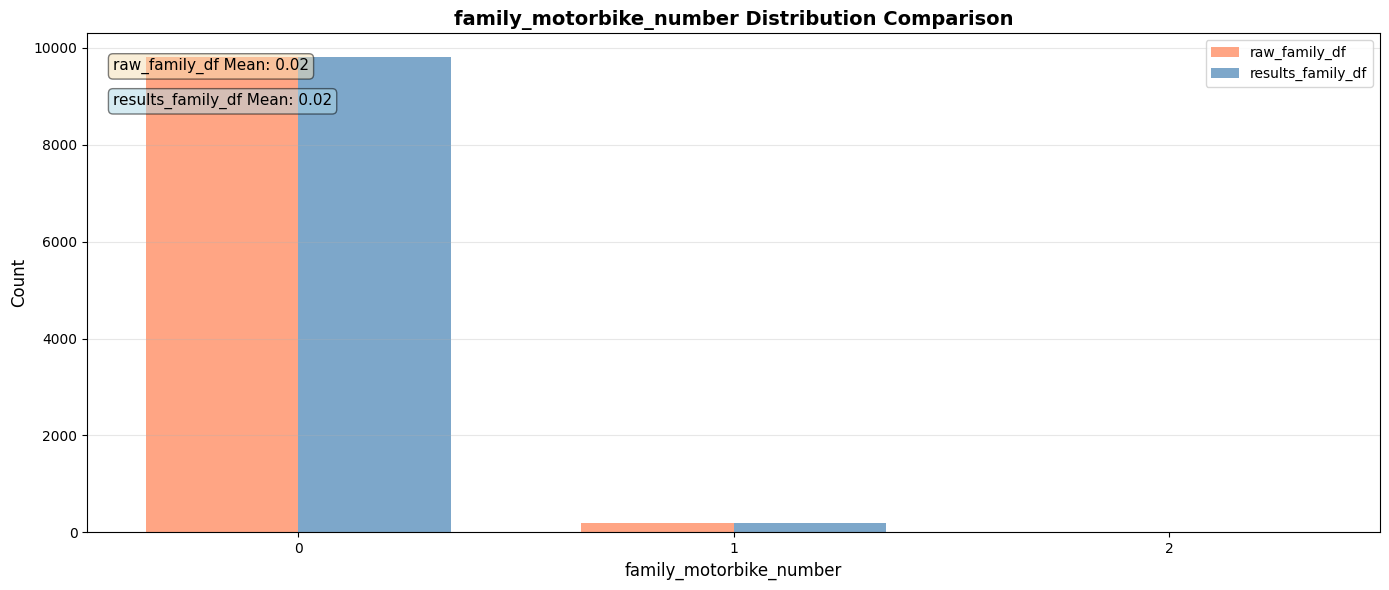

In [149]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_摩托车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_摩托车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_motorbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_motorbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

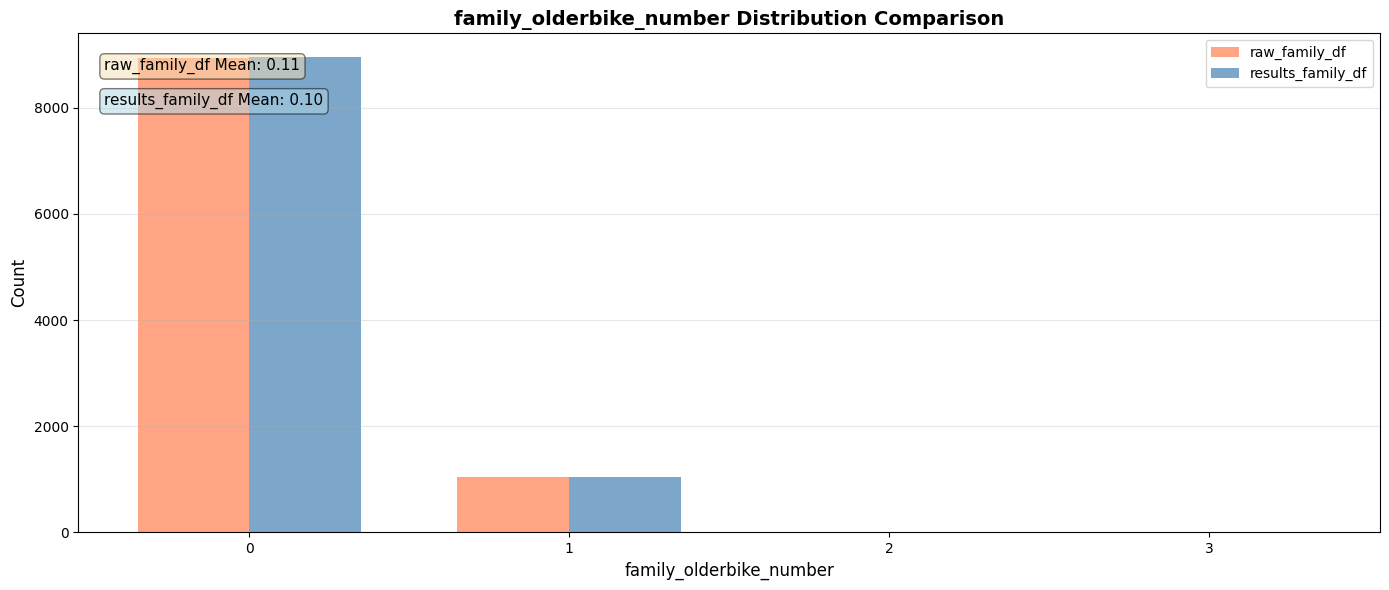

In [150]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_老年代步车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_老年代步车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_olderbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_olderbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

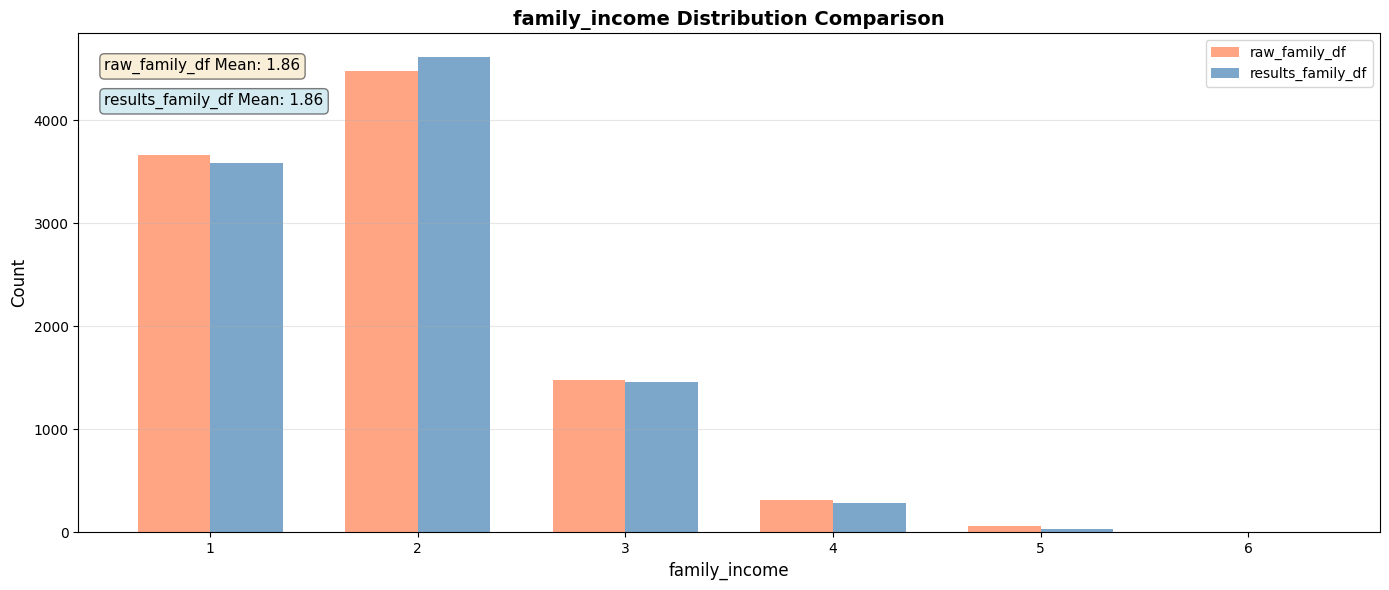

In [151]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭年收入'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭年收入'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_income Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

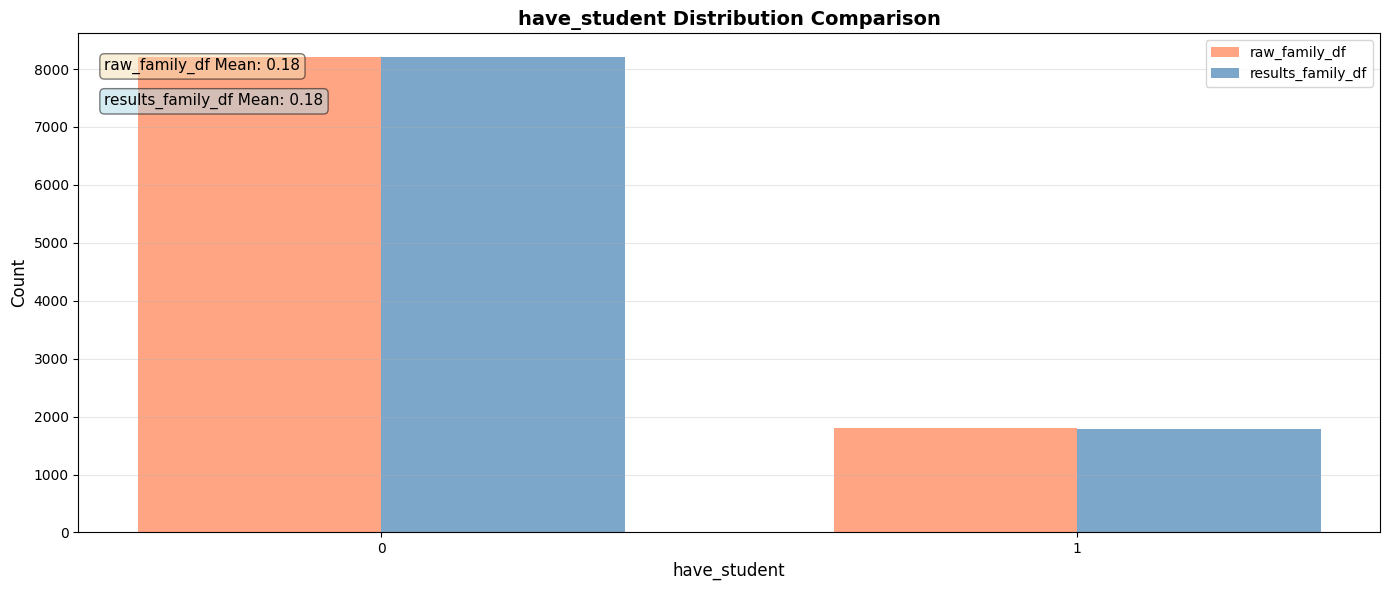

In [152]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['have_student'].value_counts().sort_index()
results_age_counts = results_family_df['have_student'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['have_student'].mean()
results_mean = results_family_df['have_student'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('have_student', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('have_student Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 个人的

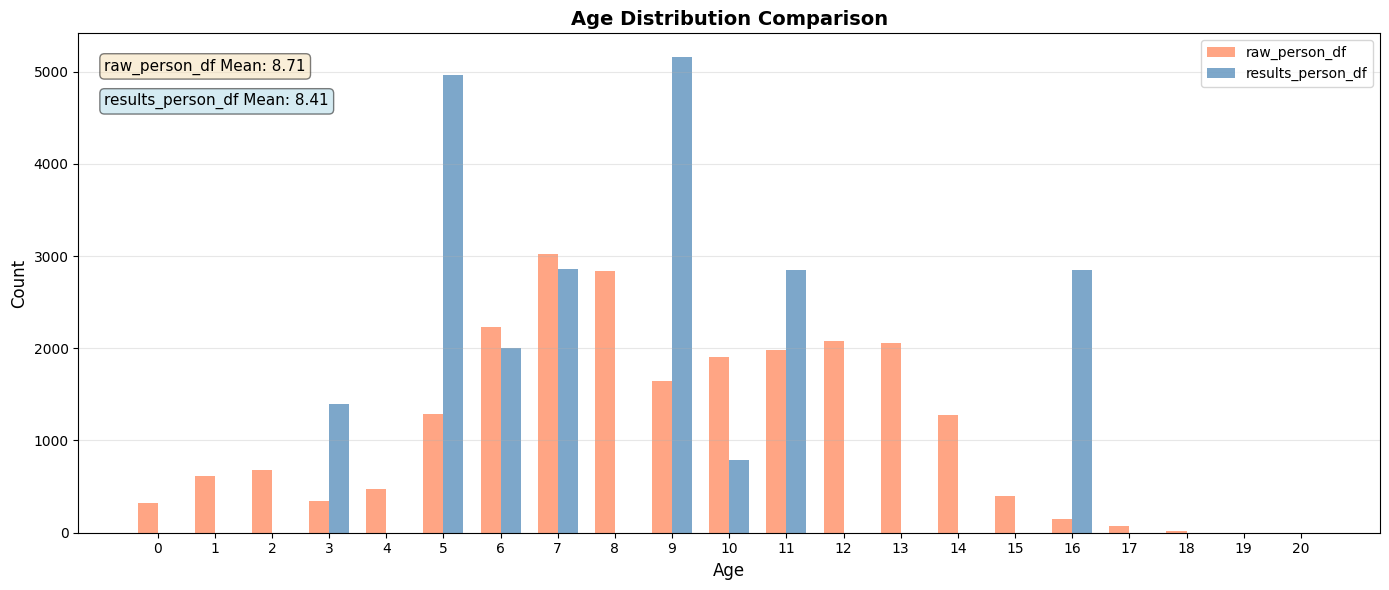

In [153]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['age'].value_counts().sort_index()
results_age_counts = results_person_df['age'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

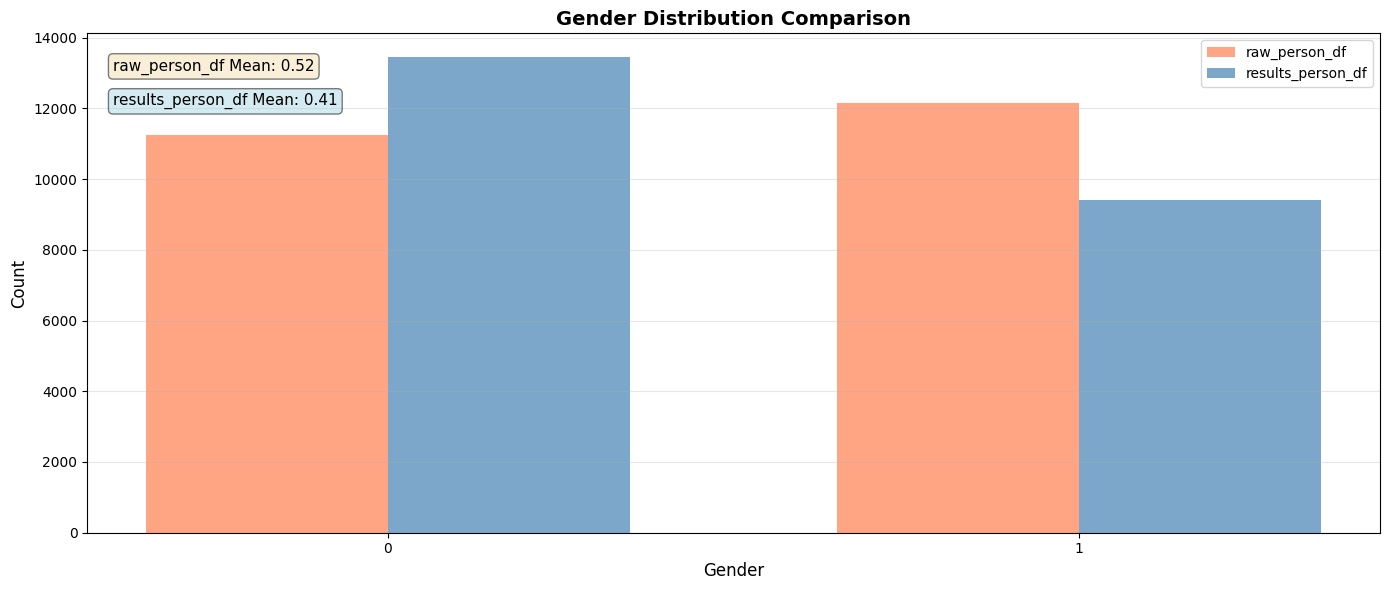

In [154]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['gender'].value_counts().sort_index()
results_age_counts = results_person_df['gender'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['gender'].mean()
results_mean = results_person_df['gender'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

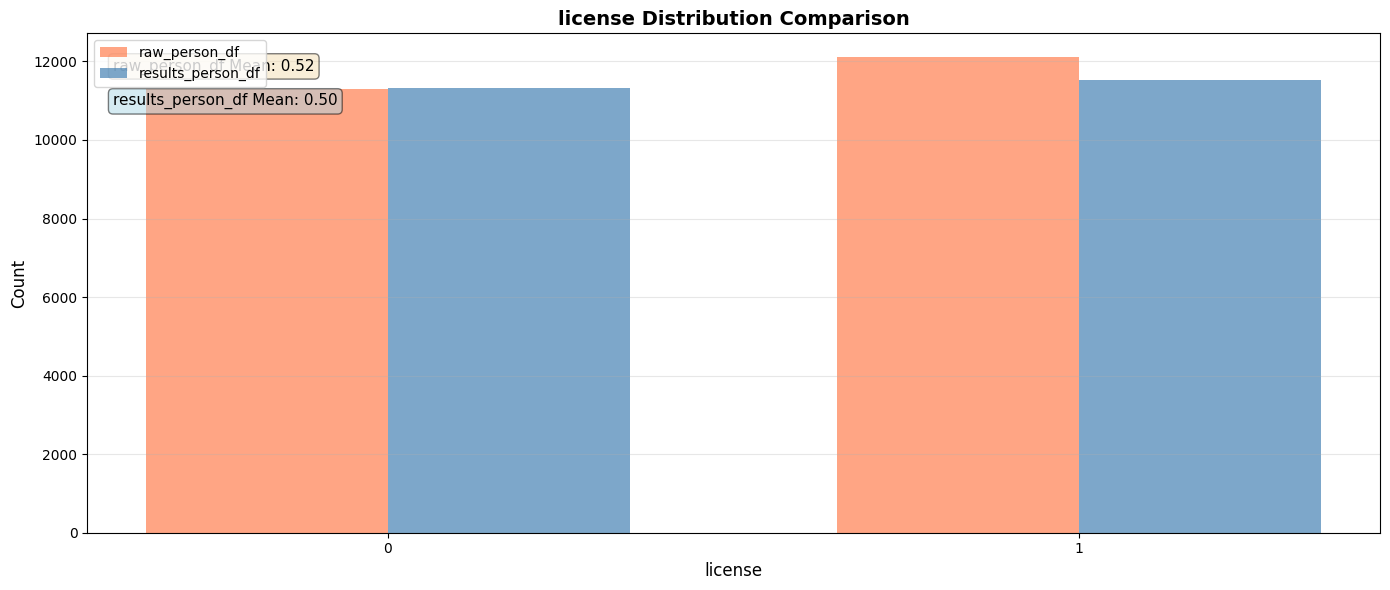

In [155]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['license'].value_counts().sort_index()
results_age_counts = results_person_df['license'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['license'].mean()
results_mean = results_person_df['license'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('license', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('license Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

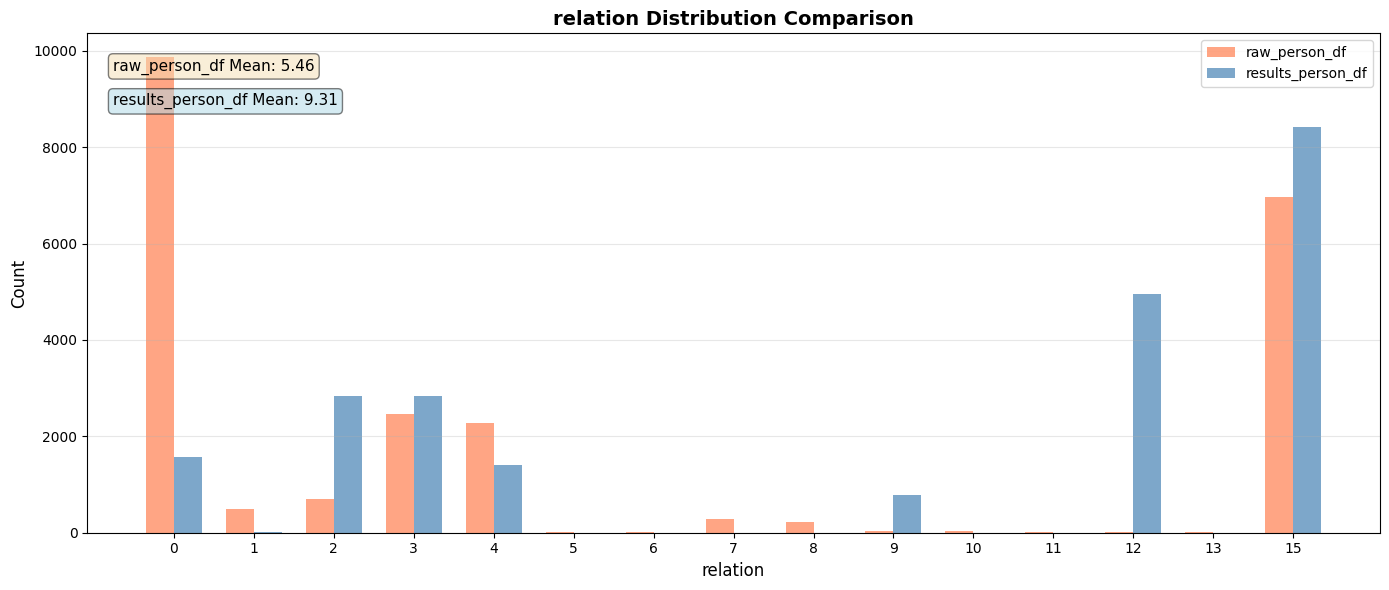

In [156]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['relation'].value_counts().sort_index()
results_age_counts = results_person_df['relation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['relation'].mean()
results_mean = results_person_df['relation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('relation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('relation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

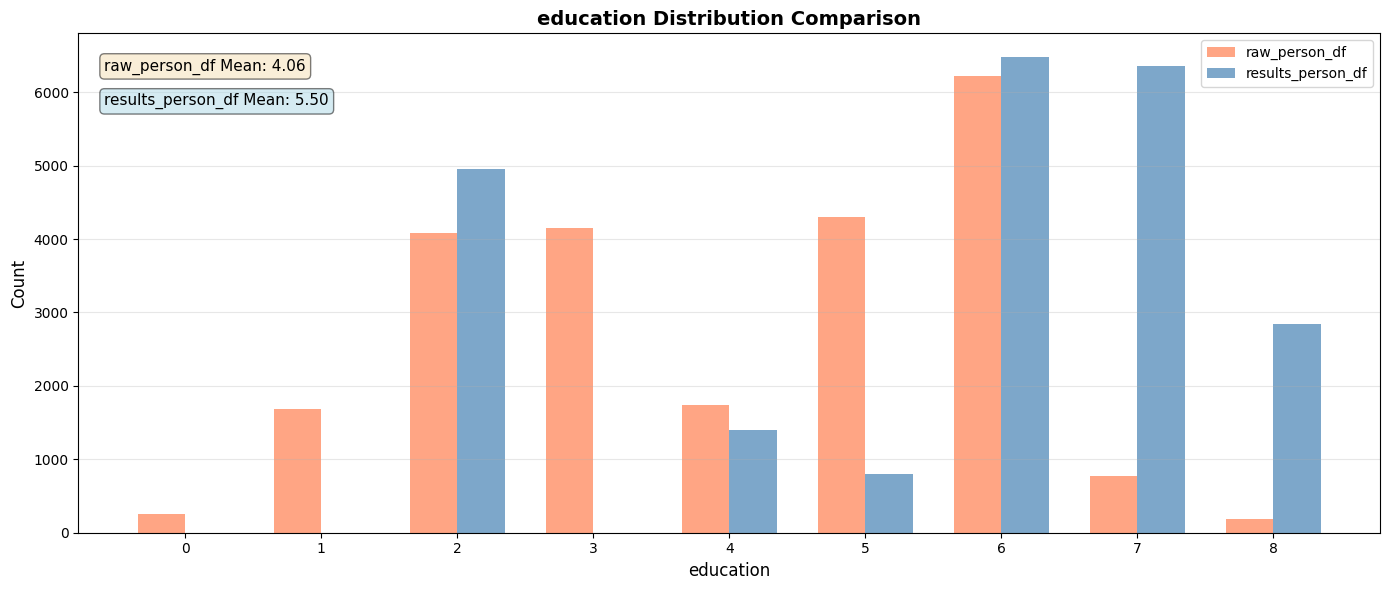

In [157]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['education'].value_counts().sort_index()
results_age_counts = results_person_df['education'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['education'].mean()
results_mean = results_person_df['education'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('education Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

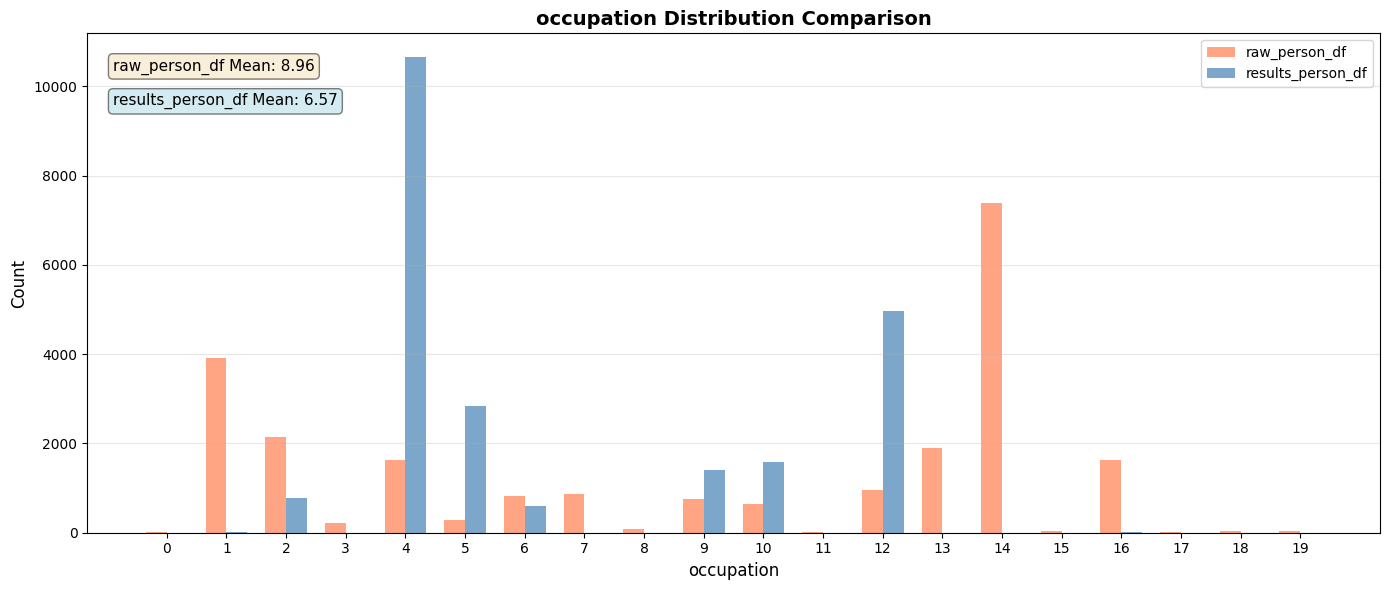

In [158]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['occupation'].value_counts().sort_index()
results_age_counts = results_person_df['occupation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['occupation'].mean()
results_mean = results_person_df['occupation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('occupation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 不去噪生成的数据

### 家庭的

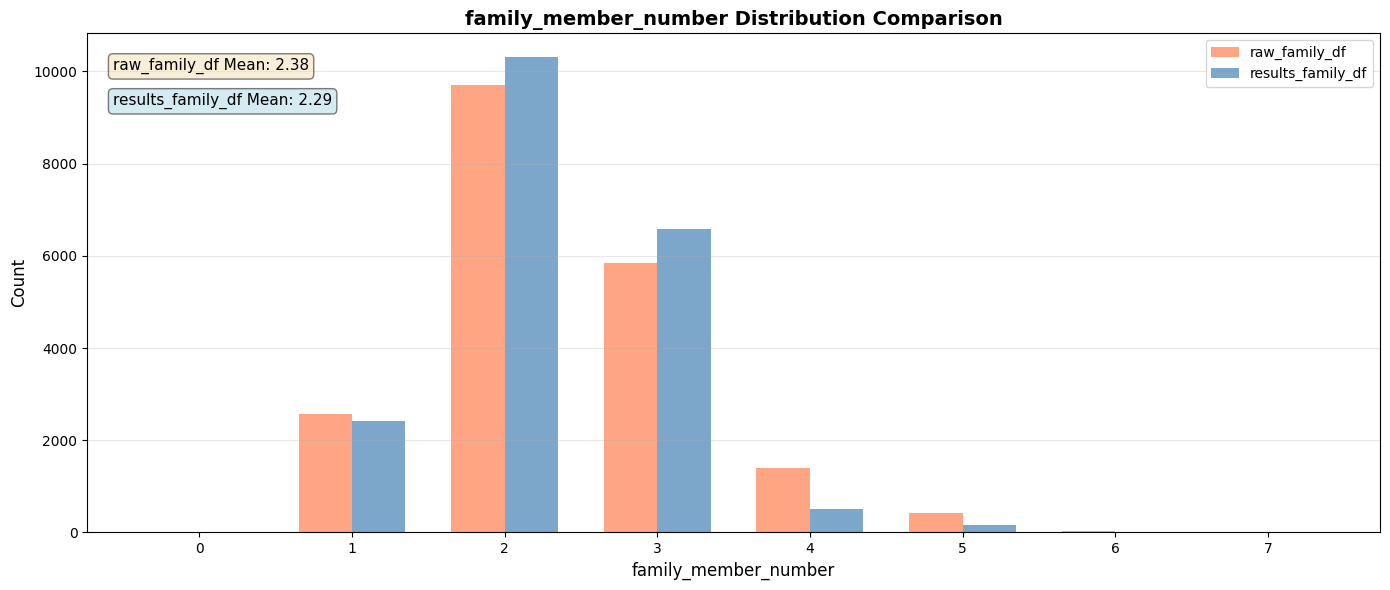

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭成员数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭成员数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭成员数量'].mean()
results_mean = results_family_df['family_家庭成员数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_member_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_member_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

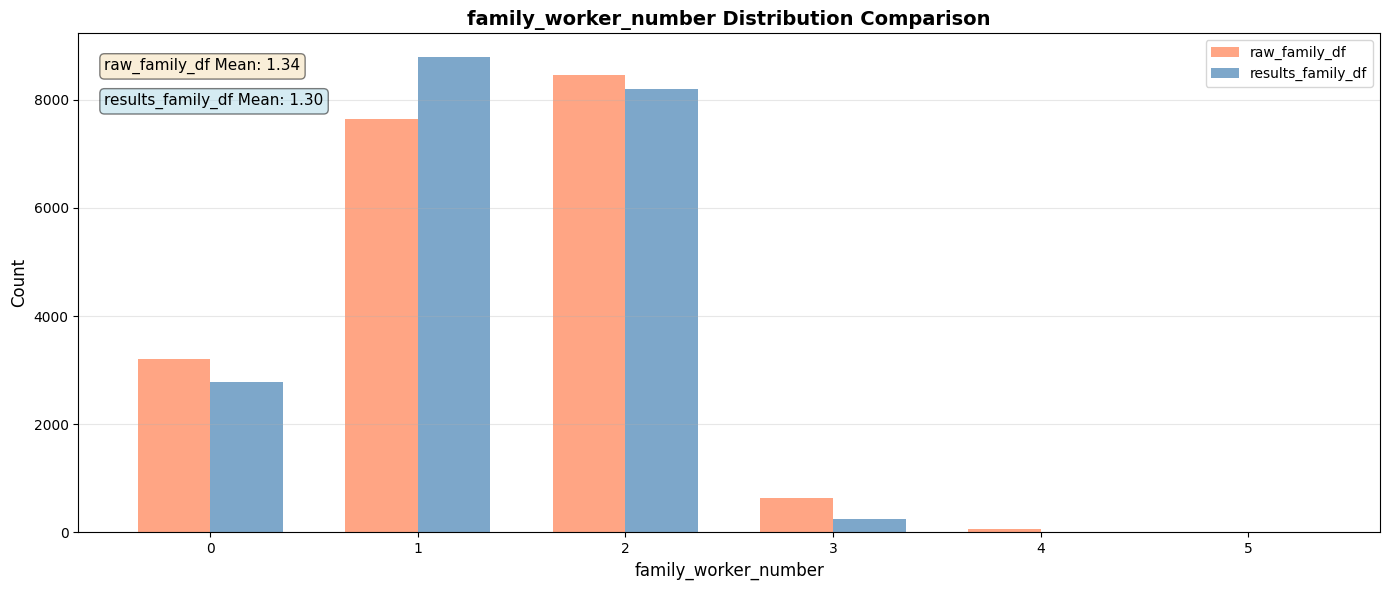

In [51]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭工作人口数'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭工作人口数'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭工作人口数'].mean()
results_mean = results_family_df['family_家庭工作人口数'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_worker_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_worker_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

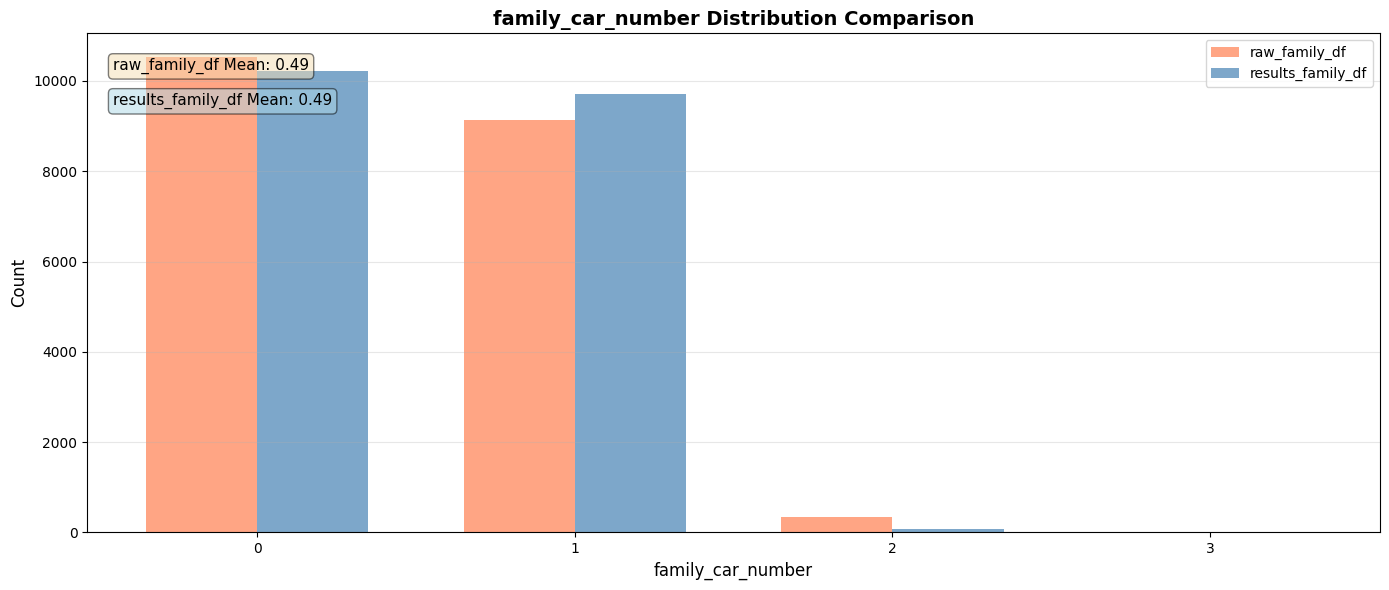

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_机动车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_机动车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_机动车数量'].mean()
results_mean = results_family_df['family_机动车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_car_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_car_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

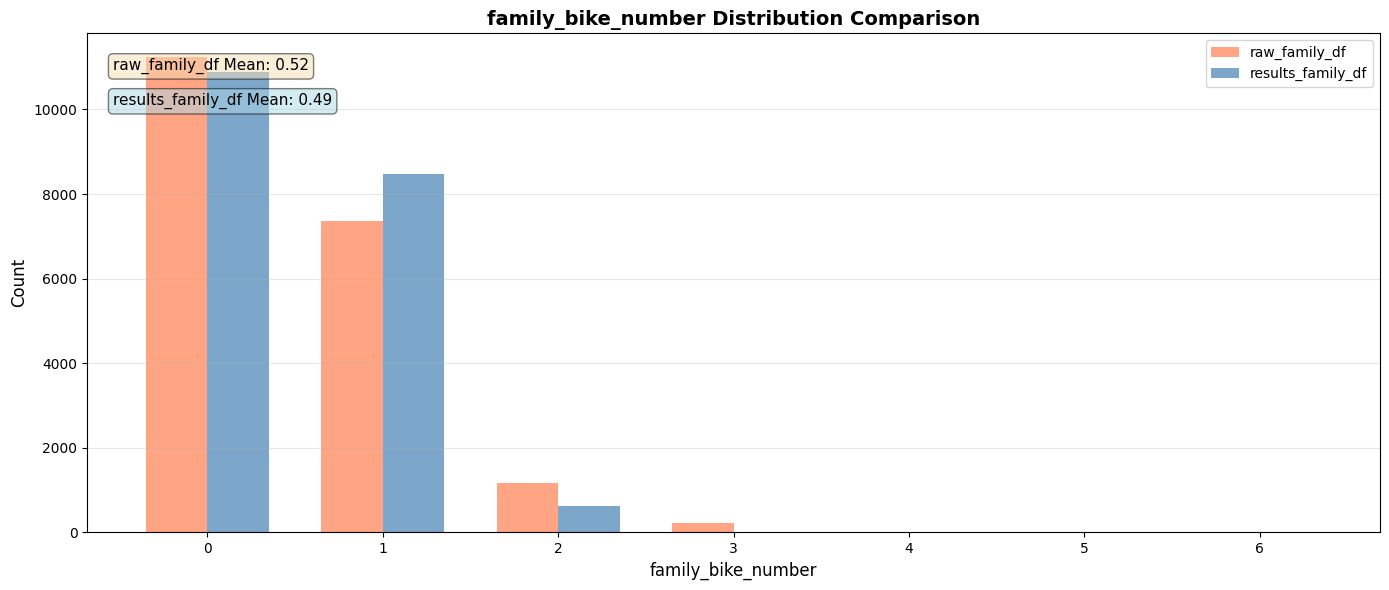

In [53]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_脚踏自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_脚踏自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_脚踏自行车数量'].mean()
results_mean = results_family_df['family_脚踏自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_bike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_bike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

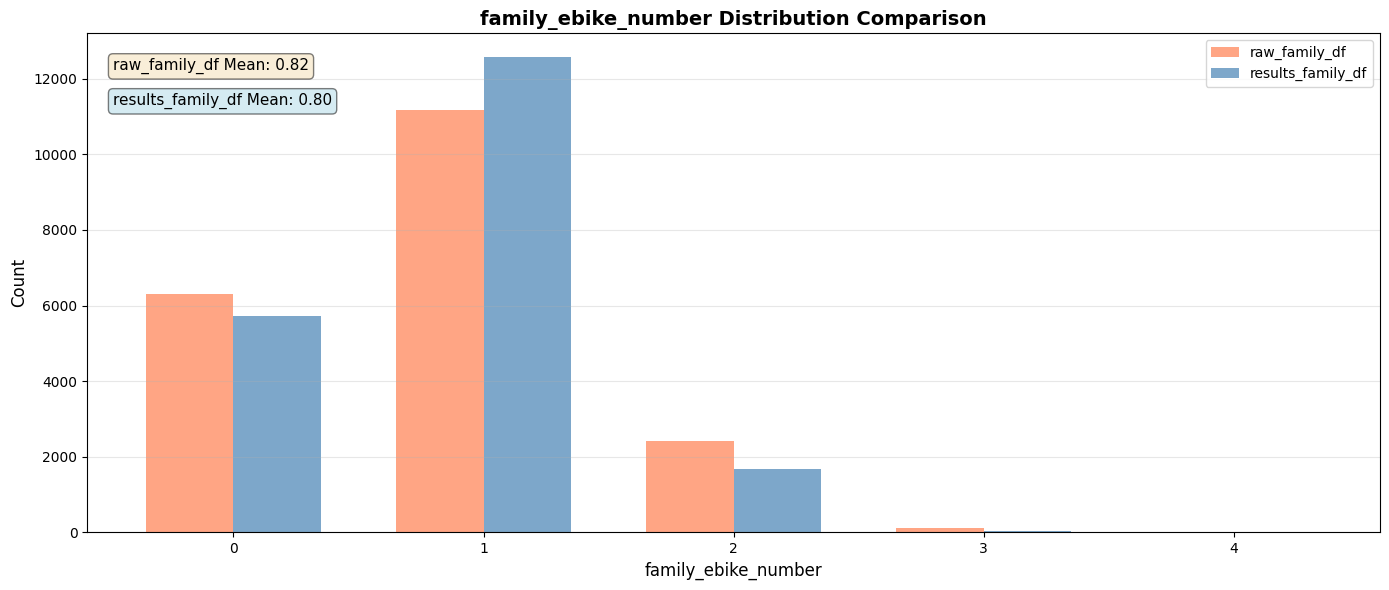

In [54]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_电动自行车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_电动自行车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_电动自行车数量'].mean()
results_mean = results_family_df['family_电动自行车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_ebike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_ebike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

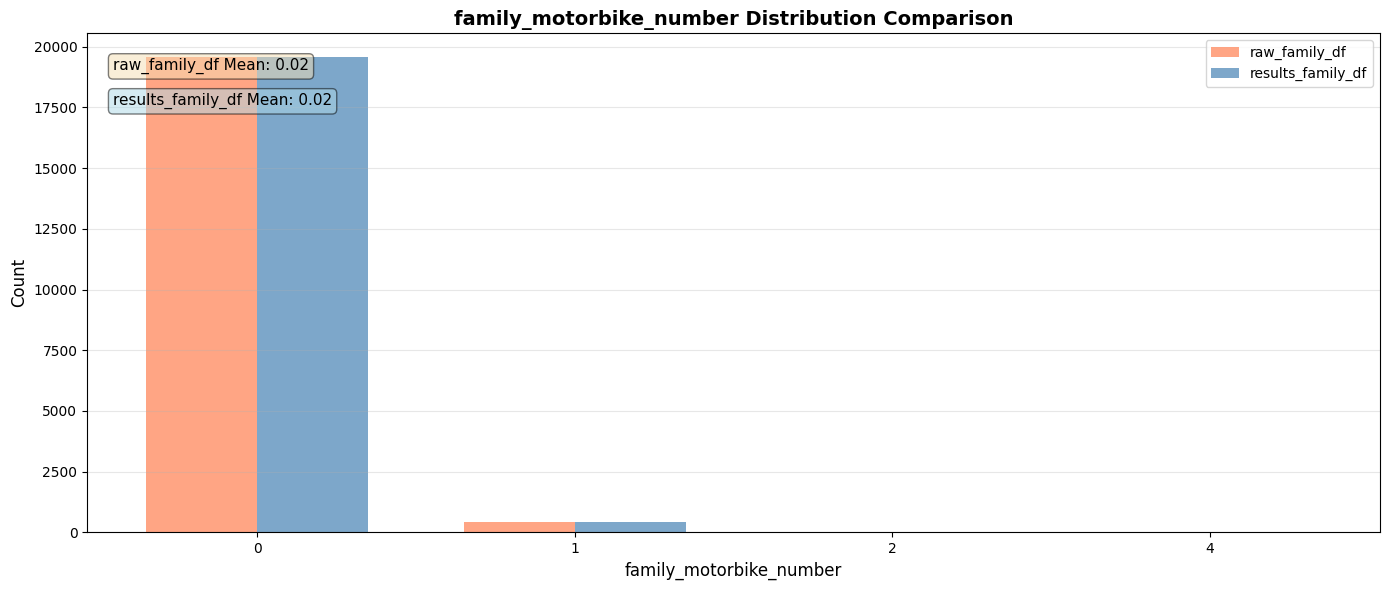

In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_摩托车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_摩托车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_摩托车数量'].mean()
results_mean = results_family_df['family_摩托车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_motorbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_motorbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

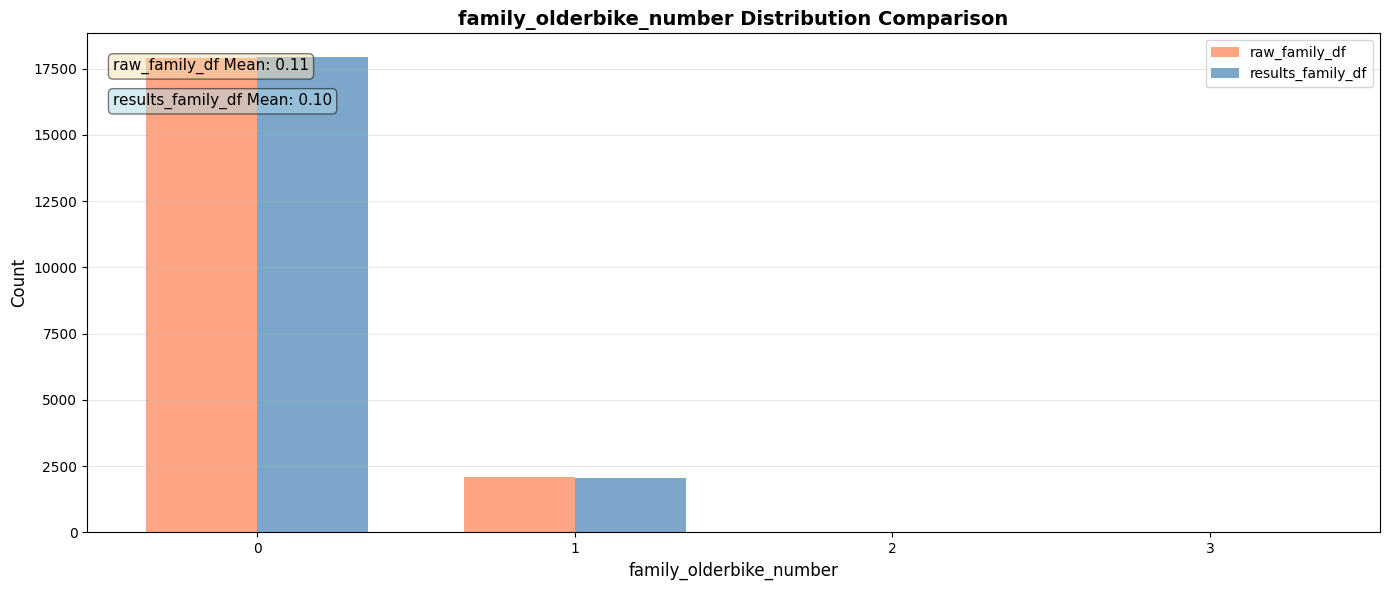

In [56]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_老年代步车数量'].value_counts().sort_index()
results_age_counts = results_family_df['family_老年代步车数量'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_老年代步车数量'].mean()
results_mean = results_family_df['family_老年代步车数量'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_olderbike_number', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_olderbike_number Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

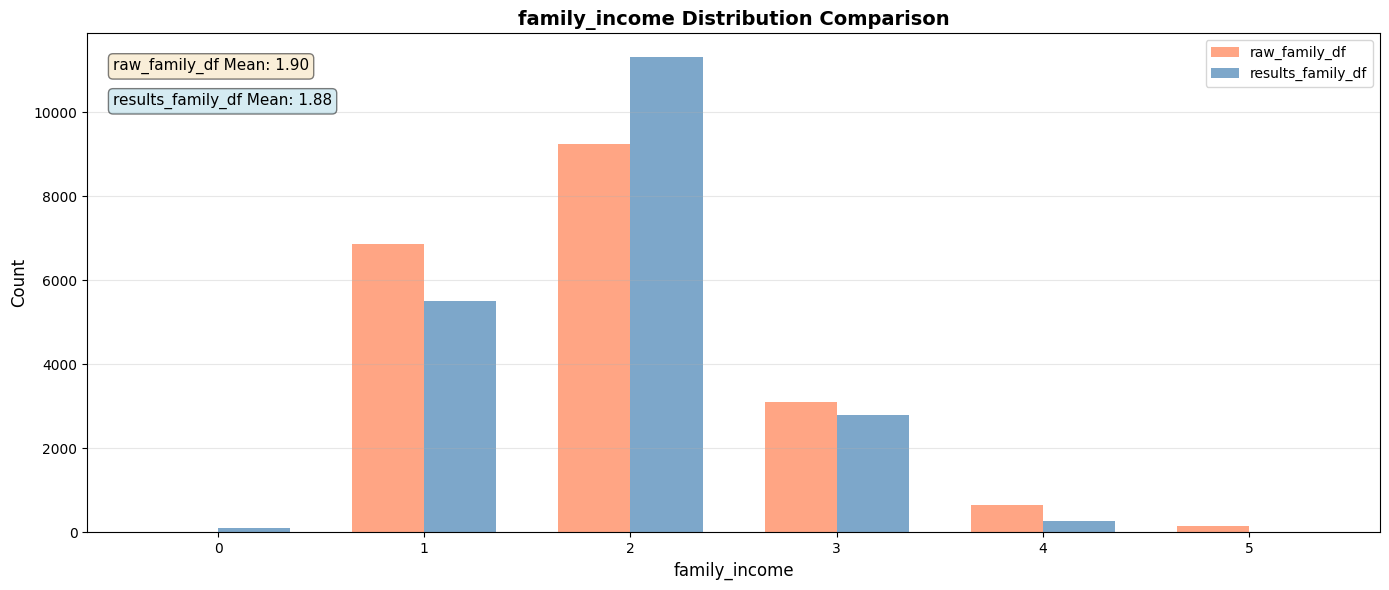

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['family_家庭年收入'].value_counts().sort_index()
results_age_counts = results_family_df['family_家庭年收入'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['family_家庭年收入'].mean()
results_mean = results_family_df['family_家庭年收入'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('family_income', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('family_income Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

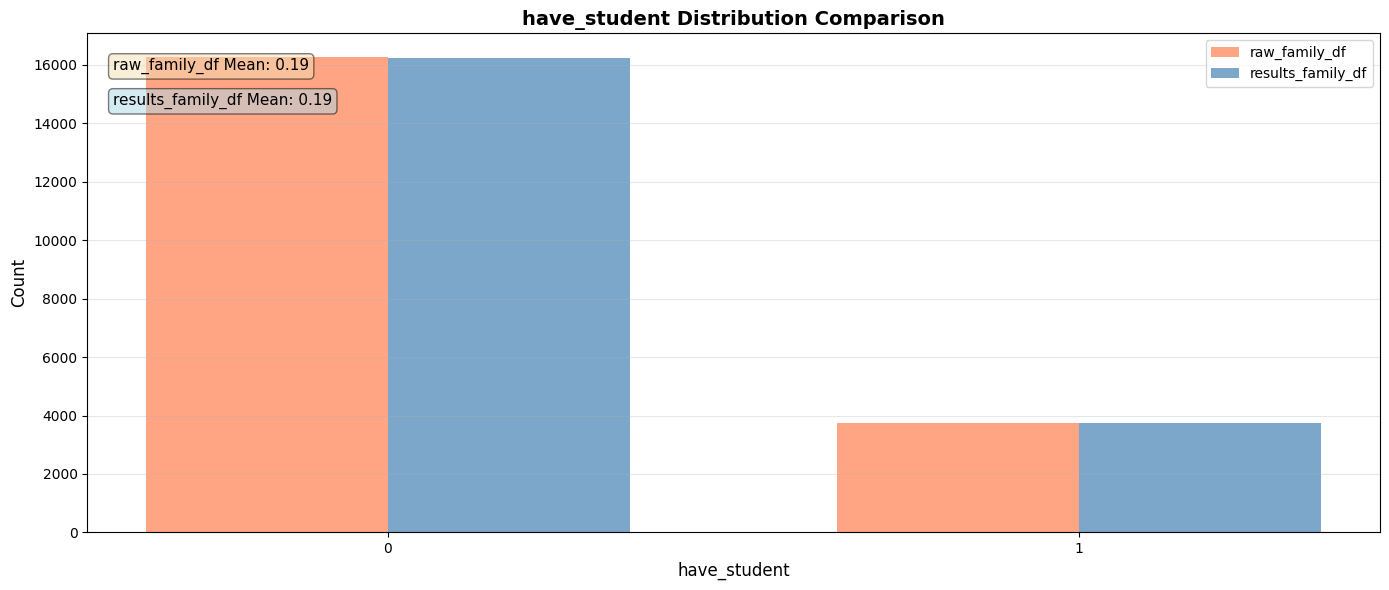

In [58]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_family_df['have_student'].value_counts().sort_index()
results_age_counts = results_family_df['have_student'].value_counts().sort_index()

# 计算均值
raw_mean = raw_family_df['have_student'].mean()
results_mean = results_family_df['have_student'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_family_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_family_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('have_student', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('have_student Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_family_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_family_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 个人的

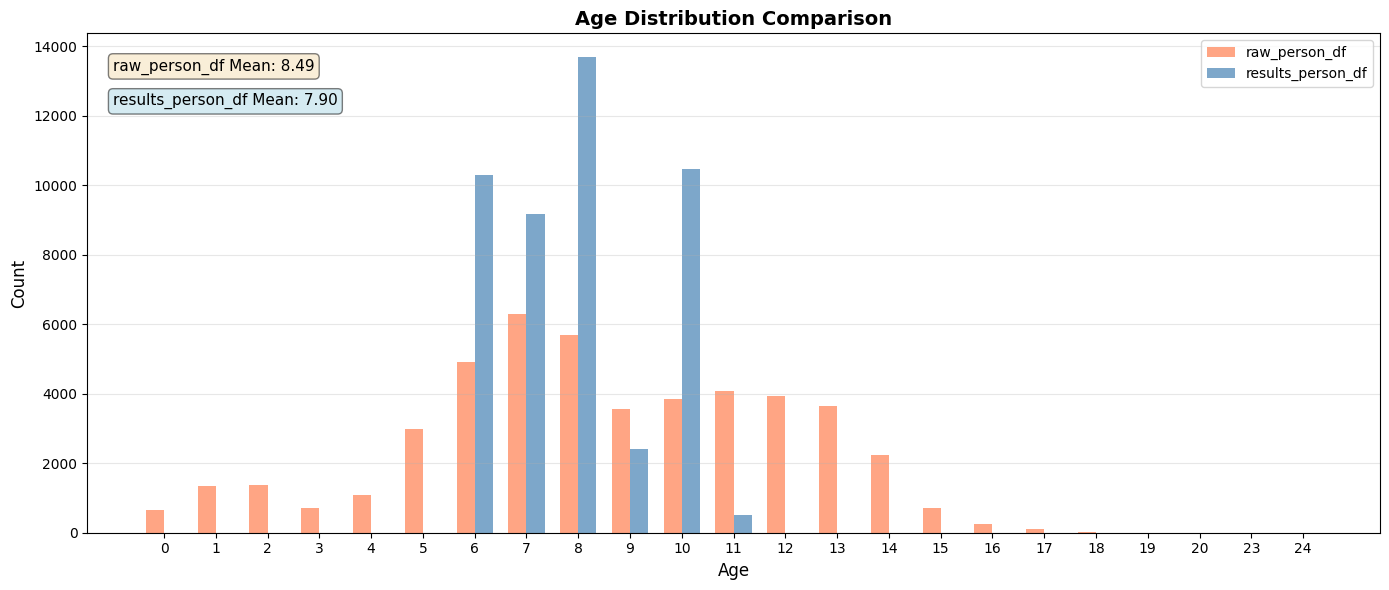

In [59]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['age'].value_counts().sort_index()
results_age_counts = results_person_df['age'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['age'].mean()
results_mean = results_person_df['age'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

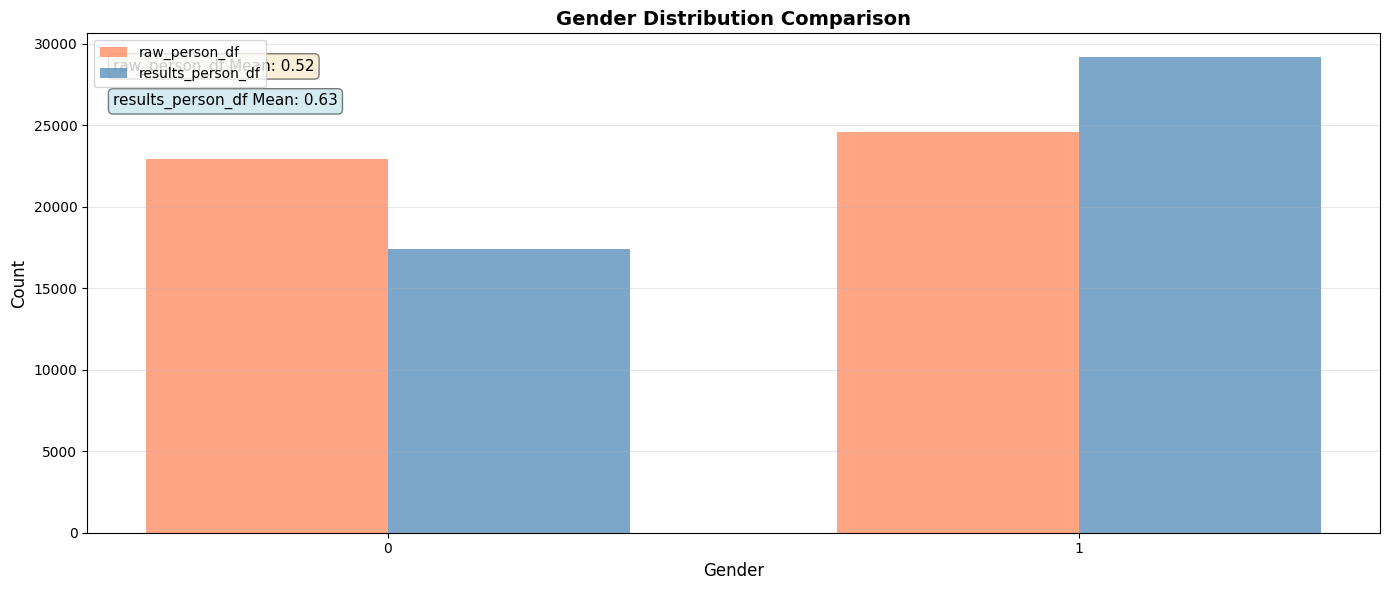

In [60]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['gender'].value_counts().sort_index()
results_age_counts = results_person_df['gender'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['gender'].mean()
results_mean = results_person_df['gender'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

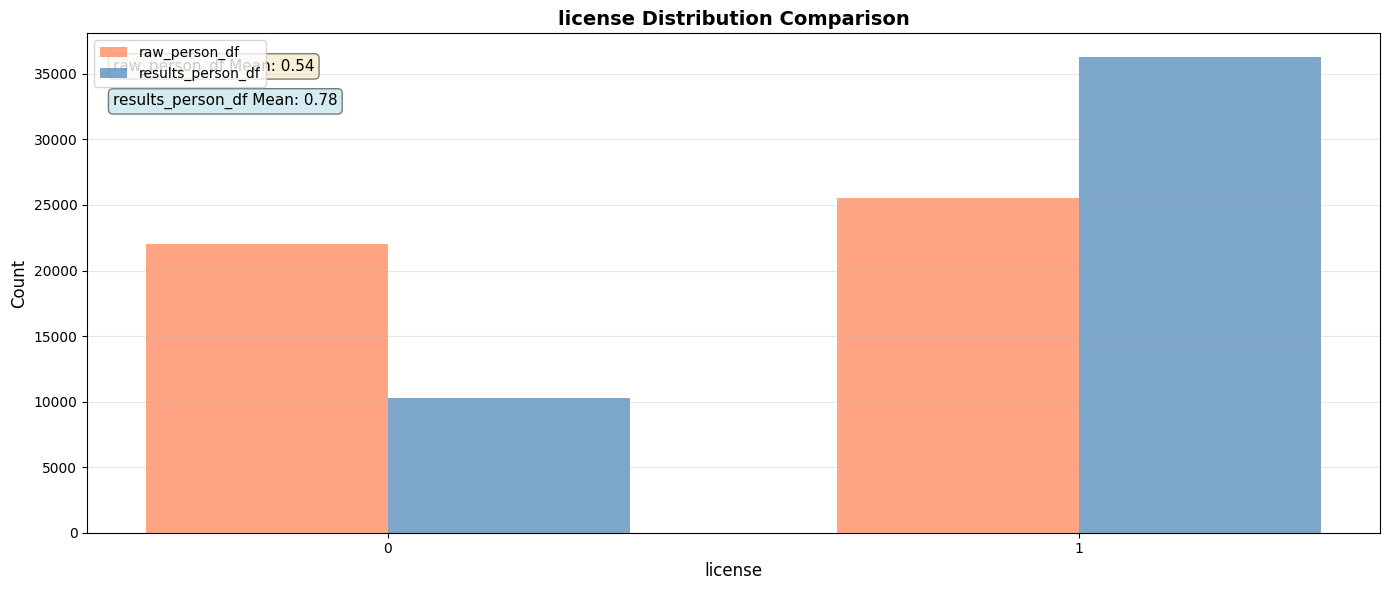

In [61]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['license'].value_counts().sort_index()
results_age_counts = results_person_df['license'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['license'].mean()
results_mean = results_person_df['license'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('license', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('license Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

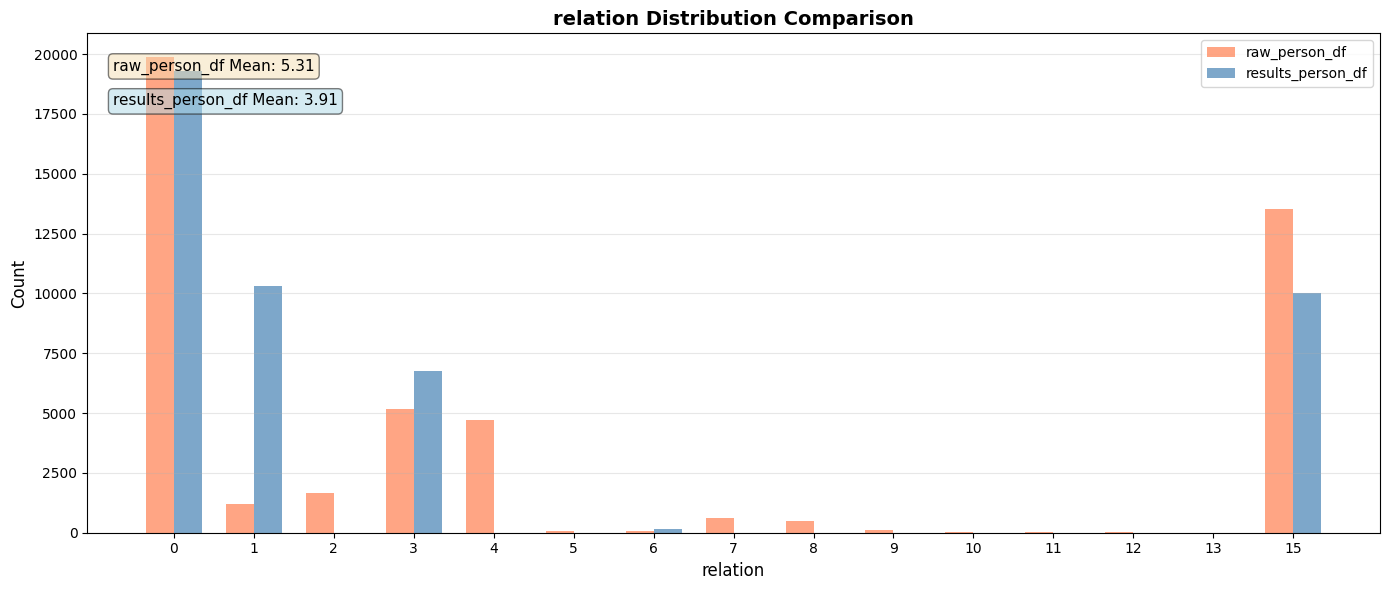

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['relation'].value_counts().sort_index()
results_age_counts = results_person_df['relation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['relation'].mean()
results_mean = results_person_df['relation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('relation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('relation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

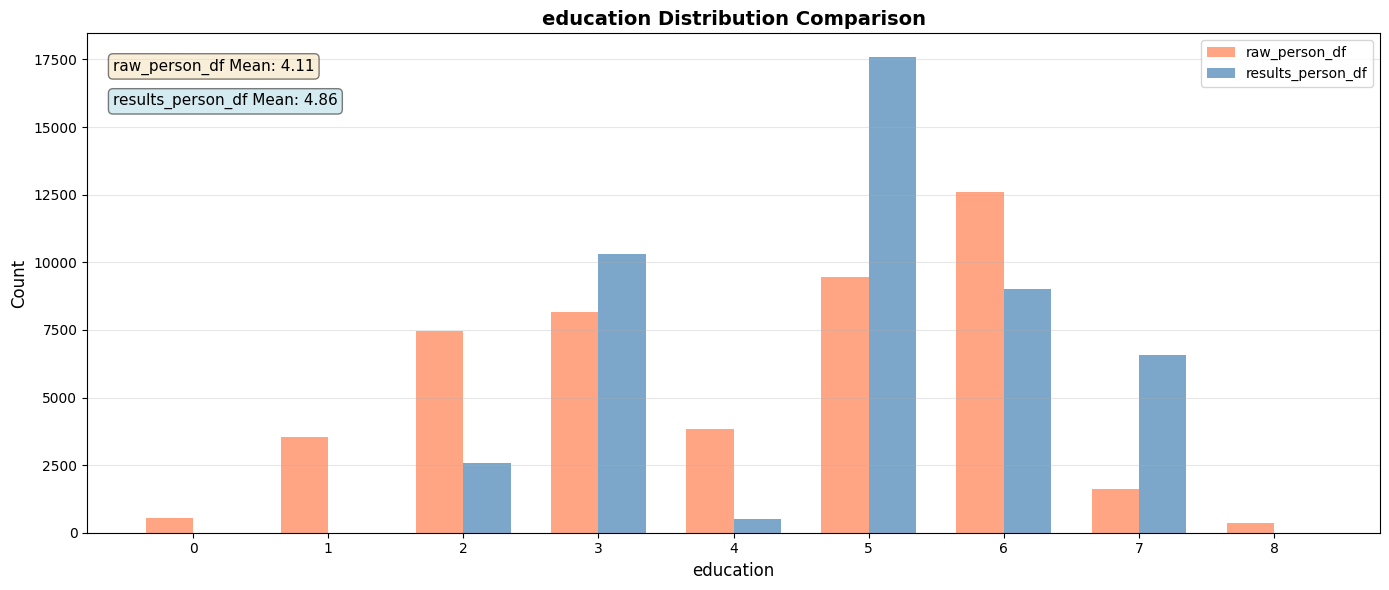

In [63]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['education'].value_counts().sort_index()
results_age_counts = results_person_df['education'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['education'].mean()
results_mean = results_person_df['education'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('education', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('education Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

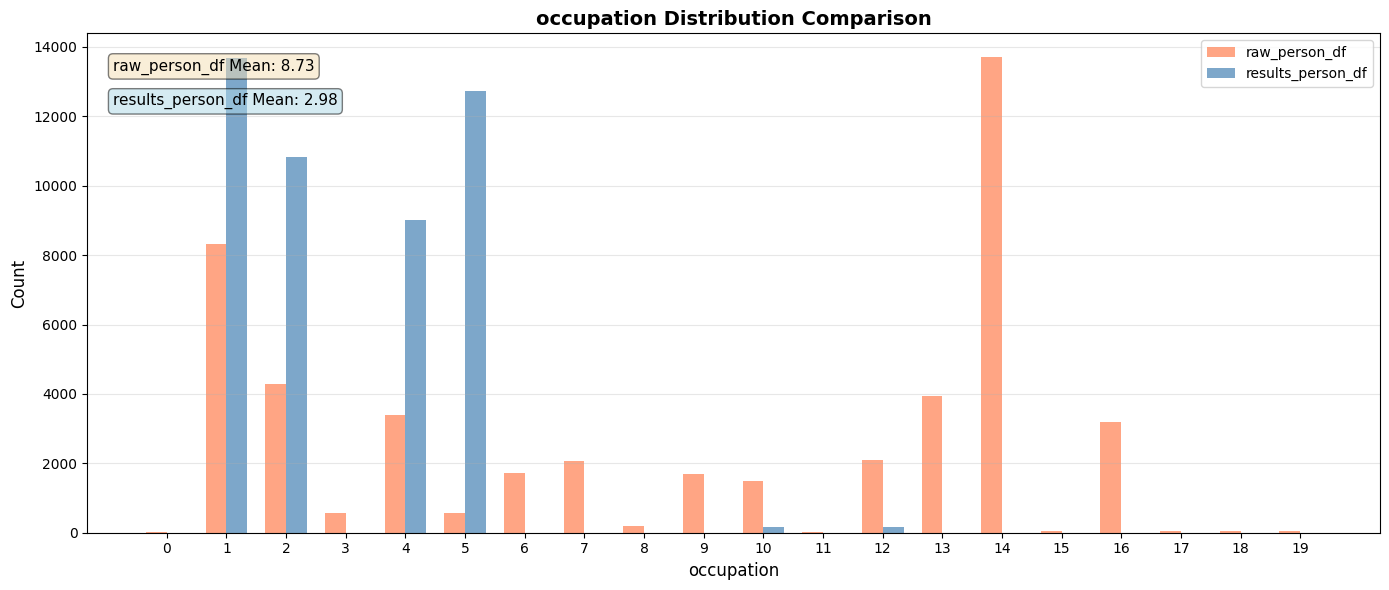

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'WenQuanYi Micro Hei', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 获取两个数据集的age分布
raw_age_counts = raw_person_df['occupation'].value_counts().sort_index()
results_age_counts = results_person_df['occupation'].value_counts().sort_index()

# 计算均值
raw_mean = raw_person_df['occupation'].mean()
results_mean = results_person_df['occupation'].mean()

# 创建一个合并的索引，确保包括两个数据集的所有年龄
all_ages = sorted(set(raw_age_counts.index) | set(results_age_counts.index))

# 准备绘图数据
raw_values = [raw_age_counts.get(age, 0) for age in all_ages]
results_values = [results_age_counts.get(age, 0) for age in all_ages]

# 创建柱状图
plt.figure(figsize=(14, 6))
x = np.arange(len(all_ages))
width = 0.35

plt.bar(x - width/2, raw_values, width, alpha=0.7, color='coral', label='raw_person_df')
plt.bar(x + width/2, results_values, width, alpha=0.7, color='steelblue', label='results_person_df')

plt.xticks(x, all_ages, rotation=90 if len(all_ages) > 30 else 0)
plt.xlabel('occupation', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('occupation Distribution Comparison', fontsize=14, fontweight='bold')
plt.legend()

# 添加均值标注
plt.text(0.02, 0.95, f'raw_person_df Mean: {raw_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.02, 0.88, f'results_person_df Mean: {results_mean:.2f}', 
         transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# TIF文件处理功能

本部分实现TIF文件的像素值读取和坐标转换功能，主要包括：
1. 读取TIF文件中每个像素点的值
2. 获取每个像素点对应的经纬度坐标
3. 创建包含经纬度和像素值的数据框
4. 提供多种坐标转换方法

## 导入必要的库

In [6]:
# 导入TIF文件处理所需的库
import rasterio
from rasterio.transform import xy, rowcol
from rasterio.plot import show
import numpy as np
import pandas as pd
from typing import Tuple, List, Optional, Union
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

## TIF文件处理类定义

In [ ]:
class TIFProcessor:
    """
    TIF文件处理类，用于读取像素值、坐标转换和数据组织
    """
    
    def __init__(self, tif_file_path: str):
        """
        初始化TIF处理器
        
        Args:
            tif_file_path (str): TIF文件路径
        """
        self.tif_file_path = tif_file_path
        self.dataset = None
        self.transform = None
        self.crs = None
        self.bounds = None
        self.shape = None
        self.nodata = None
        
        # 打开文件并获取基本信息
        self._load_tif_info()
    
    def _load_tif_info(self):
        """加载TIF文件的基本信息"""
        try:
            with rasterio.open(self.tif_file_path) as src:
                self.transform = src.transform
                self.crs = src.crs
                self.bounds = src.bounds
                self.shape = src.shape
                self.nodata = src.nodata
                print(f"文件加载成功: {self.tif_file_path}")
                print(f"投影坐标系: {self.crs}")
                print(f"数据范围: {self.bounds}")
                print(f"数据维度: {self.shape}")
                print(f"分辨率: {src.res}")
                print(f"NoData值: {self.nodata}")
        except Exception as e:
            print(f"文件加载失败: {e}")
            raise
    
    def pixel_to_coordinates(self, row: int, col: int) -> Tuple[float, float]:
        """
        像素坐标转换为地理坐标
        
        Args:
            row (int): 行索引
            col (int): 列索引
            
        Returns:
            Tuple[float, float]: (经度, 纬度)
        """
        lon, lat = xy(self.transform, row, col)
        return lon, lat
    
    def coordinates_to_pixel(self, lon: float, lat: float) -> Tuple[int, int]:
        """
        地理坐标转换为像素坐标
        
        Args:
            lon (float): 经度
            lat (float): 纬度
            
        Returns:
            Tuple[int, int]: (行索引, 列索引)
        """
        row, col = rowcol(self.transform, lon, lat)
        return row, col
    
    def read_pixel_values_batch(self, band: int = 1, 
                               subset_bounds: Optional[Tuple[float, float, float, float]] = None,
                               max_pixels: Optional[int] = None) -> pd.DataFrame:
        """
        批量读取像素值和坐标信息
        
        Args:
            band (int): 波段号，默认为1
            subset_bounds (Tuple): 子区域边界 (min_lon, min_lat, max_lon, max_lat)
            max_pixels (int): 最大像素数量限制，用于大文件处理
            
        Returns:
            pd.DataFrame: 包含经度、纬度、像素值的数据框
        """
        try:
            with rasterio.open(self.tif_file_path) as src:
                # 如果指定了子区域，计算窗口
                if subset_bounds:
                    min_lon, min_lat, max_lon, max_lat = subset_bounds
                    # 将地理坐标转换为像素坐标
                    row_start, col_start = self.coordinates_to_pixel(min_lon, max_lat)
                    row_end, col_end = self.coordinates_to_pixel(max_lon, min_lat)
                    
                    # 确保索引在有效范围内
                    row_start = max(0, min(row_start, src.height - 1))
                    row_end = max(0, min(row_end, src.height - 1))
                    col_start = max(0, min(col_start, src.width - 1))
                    col_end = max(0, min(col_end, src.width - 1))
                    
                    # 确保起始索引小于结束索引
                    if row_start > row_end:
                        row_start, row_end = row_end, row_start
                    if col_start > col_end:
                        col_start, col_end = col_end, col_start
                    
                    # 创建窗口
                    window = rasterio.windows.Window(
                        col_off=col_start, 
                        row_off=row_start,
                        width=col_end - col_start + 1,
                        height=row_end - row_start + 1
                    )
                    
                    # 读取子区域数据
                    data = src.read(band, window=window)
                    rows, cols = np.where(np.ones_like(data))
                    rows += row_start
                    cols += col_start
                    values = data.flatten()
                else:
                    # 读取全部数据
                    data = src.read(band)
                    rows, cols = np.where(np.ones_like(data))
                    values = data.flatten()
                
                # 如果设置了最大像素数量限制
                if max_pixels and len(values) > max_pixels:
                    # 随机采样
                    indices = np.random.choice(len(values), max_pixels, replace=False)
                    rows = rows[indices]
                    cols = cols[indices]
                    values = values[indices]
                    print(f"数据量过大，随机采样了 {max_pixels} 个像素点")
                
                # 转换为地理坐标
                print("正在转换像素坐标为地理坐标...")
                coordinates = []
                
                # 批量转换坐标（更高效）
                for i in tqdm(range(len(rows)), desc="坐标转换进度"):
                    lon, lat = self.pixel_to_coordinates(rows[i], cols[i])
                    coordinates.append((lon, lat))
                
                # 创建数据框
                df = pd.DataFrame({
                    'row': rows,
                    'col': cols,
                    'longitude': [coord[0] for coord in coordinates],
                    'latitude': [coord[1] for coord in coordinates],
                    'pixel_value': values
                })
                
                # 过滤NoData值
                if self.nodata is not None:
                    original_count = len(df)
                    df = df[df['pixel_value'] != self.nodata]
                    filtered_count = len(df)
                    print(f"过滤了 {original_count - filtered_count} 个NoData值")
                
                print(f"成功处理 {len(df)} 个像素点")
                return df
                
        except Exception as e:
            print(f"读取像素值时出错: {e}")
            raise
    
    def read_pixel_values_region(self, center_lon: float, center_lat: float, 
                                radius_km: float, band: int = 1) -> pd.DataFrame:
        """
        读取指定中心点周围特定半径范围内的像素值
        
        Args:
            center_lon (float): 中心点经度
            center_lat (float): 中心点纬度
            radius_km (float): 半径（公里）
            band (int): 波段号
            
        Returns:
            pd.DataFrame: 区域内的像素数据
        """
        # 将公里转换为度（粗略估计）
        radius_deg = radius_km / 111.0  # 1度约等于111公里
        
        # 计算边界
        min_lon = center_lon - radius_deg
        max_lon = center_lon + radius_deg
        min_lat = center_lat - radius_deg
        max_lat = center_lat + radius_deg
        
        subset_bounds = (min_lon, min_lat, max_lon, max_lat)
        df = self.read_pixel_values_batch(band=band, subset_bounds=subset_bounds)
        
        # 计算距离中心点的实际距离（简化版）
        df['distance_km'] = np.sqrt(
            ((df['longitude'] - center_lon) * 111.0) ** 2 + 
            ((df['latitude'] - center_lat) * 111.0) ** 2
        )
        
        # 过滤超出半径的点
        df = df[df['distance_km'] <= radius_km]
        
        return df
    
    def get_pixel_value_at_coordinate(self, lon: float, lat: float, band: int = 1) -> float:
        """
        获取指定坐标处的像素值
        
        Args:
            lon (float): 经度
            lat (float): 纬度
            band (int): 波段号
            
        Returns:
            float: 像素值
        """
        try:
            with rasterio.open(self.tif_file_path) as src:
                row, col = self.coordinates_to_pixel(lon, lat)
                
                # 检查坐标是否在有效范围内
                if 0 <= row < src.height and 0 <= col < src.width:
                    value = src.read(band, window=rasterio.windows.Window(col, row, 1, 1))
                    return float(value[0, 0])
                else:
                    print(f"坐标 ({lon}, {lat}) 超出数据范围")
                    return np.nan
        except Exception as e:
            print(f"获取像素值时出错: {e}")
            return np.nan
    
    def create_coordinate_grid(self, step_size: int = 10) -> pd.DataFrame:
        """
        创建坐标网格
        
        Args:
            step_size (int): 网格步长（像素）
            
        Returns:
            pd.DataFrame: 网格坐标数据
        """
        rows = range(0, self.shape[0], step_size)
        cols = range(0, self.shape[1], step_size)
        
        grid_data = []
        for row in tqdm(rows, desc="创建坐标网格"):
            for col in cols:
                lon, lat = self.pixel_to_coordinates(row, col)
                grid_data.append({
                    'row': row,
                    'col': col,
                    'longitude': lon,
                    'latitude': lat
                })
        
        return pd.DataFrame(grid_data)
    
    def visualize_data(self, df: pd.DataFrame, value_column: str = 'pixel_value', 
                      figsize: Tuple[int, int] = (12, 8)):
        """
        可视化像素数据
        
        Args:
            df (pd.DataFrame): 包含坐标和值的数据框
            value_column (str): 要可视化的数值列名
            figsize (Tuple): 图形大小
        """
        plt.figure(figsize=figsize)
        plt.scatter(df['longitude'], df['latitude'], c=df[value_column], 
                   cmap='viridis', alpha=0.6, s=1)
        plt.colorbar(label=value_column)
        plt.xlabel('经度 (Longitude)')
        plt.ylabel('纬度 (Latitude)')
        plt.title(f'{value_column} 空间分布')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def export_to_csv(self, df: pd.DataFrame, output_path: str):
        """
        导出数据到CSV文件
        
        Args:
            df (pd.DataFrame): 要导出的数据框
            output_path (str): 输出文件路径
        """
        try:
            df.to_csv(output_path, index=False, encoding='utf-8')
            print(f"数据已成功导出到: {output_path}")
        except Exception as e:
            print(f"导出数据时出错: {e}")
    
    def get_statistics(self, df: pd.DataFrame) -> dict:
        """
        获取像素值统计信息
        
        Args:
            df (pd.DataFrame): 像素数据
            
        Returns:
            dict: 统计信息
        """
        stats = {
            'count': len(df),
            'mean': df['pixel_value'].mean(),
            'std': df['pixel_value'].std(),
            'min': df['pixel_value'].min(),
            'max': df['pixel_value'].max(),
            'median': df['pixel_value'].median(),
            'extent': {
                'min_lon': df['longitude'].min(),
                'max_lon': df['longitude'].max(),
                'min_lat': df['latitude'].min(),
                'max_lat': df['latitude'].max()
            }
        }
        return stats

## 使用示例 - 基本功能测试

In [ ]:
# 初始化TIF处理器（使用现有的人口数据文件）
tif_file = '数据/人口数据/人口数据/landscan-global-2022-assets/landscan-global-2022-colorized.tif'

# 创建处理器实例
try:
    processor = TIFProcessor(tif_file)
except Exception as e:
    print(f"无法加载TIF文件: {e}")
    print("请确保文件路径正确，或者更改为您实际的TIF文件路径")

### 示例1：获取单个坐标点的像素值

In [ ]:
# 测试单个坐标点的像素值获取
test_lon, test_lat = 116.3974, 39.9093  # 北京坐标示例

if 'processor' in locals():
    # 获取该坐标的像素值
    pixel_value = processor.get_pixel_value_at_coordinate(test_lon, test_lat, band=1)
    print(f"坐标 ({test_lon}, {test_lat}) 处的像素值: {pixel_value}")
    
    # 测试坐标转换功能
    row, col = processor.coordinates_to_pixel(test_lon, test_lat)
    print(f"地理坐标 ({test_lon}, {test_lat}) 对应的像素坐标: 行={row}, 列={col}")
    
    # 反向转换验证
    lon_back, lat_back = processor.pixel_to_coordinates(row, col)
    print(f"像素坐标 (行={row}, 列={col}) 转换回的地理坐标: ({lon_back:.6f}, {lat_back:.6f})")
else:
    print("处理器未成功初始化，跳过测试")

### 示例2：读取指定区域的所有像素值

In [ ]:
# 读取小区域的像素数据（避免内存过载）
if 'processor' in locals():
    # 定义一个小的测试区域（中国东部某个区域）
    subset_bounds = (115.0, 39.0, 117.0, 41.0)  # (min_lon, min_lat, max_lon, max_lat)
    
    print("正在读取指定区域的像素数据...")
    print(f"区域边界: 经度 {subset_bounds[0]} 到 {subset_bounds[2]}, 纬度 {subset_bounds[1]} 到 {subset_bounds[3]}")
    
    try:
        # 读取区域数据，限制最大像素数量
        region_df = processor.read_pixel_values_batch(
            band=1, 
            subset_bounds=subset_bounds,
            max_pixels=10000  # 限制最大像素数量以避免内存问题
        )
        
        print(f"\\n成功读取 {len(region_df)} 个像素点的数据")
        print("\\n数据预览:")
        print(region_df.head())
        
        # 获取统计信息
        stats = processor.get_statistics(region_df)
        print("\\n统计信息:")
        for key, value in stats.items():
            if key != 'extent':
                print(f"{key}: {value}")
            else:
                print(f"数据范围: {value}")
                
    except Exception as e:
        print(f"读取区域数据时出错: {e}")
else:
    print("处理器未成功初始化，跳过测试")

### 示例3：读取圆形区域内的像素值

In [ ]:
# 读取指定中心点周围圆形区域的像素值
if 'processor' in locals():
    center_lon, center_lat = 116.3974, 39.9093  # 北京中心
    radius_km = 50  # 50公里半径
    
    print(f"正在读取中心点 ({center_lon}, {center_lat}) 周围 {radius_km} 公里内的像素数据...")
    
    try:
        circular_df = processor.read_pixel_values_region(
            center_lon=center_lon,
            center_lat=center_lat,
            radius_km=radius_km,
            band=1
        )
        
        print(f"\\n成功读取 {len(circular_df)} 个像素点的数据")
        print("\\n数据预览（包含距离信息）:")
        print(circular_df.head())
        
        # 按距离分组统计
        distance_ranges = [0, 10, 20, 30, 40, 50]
        for i in range(len(distance_ranges)-1):
            start_dist = distance_ranges[i]
            end_dist = distance_ranges[i+1]
            mask = (circular_df['distance_km'] >= start_dist) & (circular_df['distance_km'] < end_dist)
            count = mask.sum()
            avg_value = circular_df.loc[mask, 'pixel_value'].mean() if count > 0 else 0
            print(f"距离 {start_dist}-{end_dist} 公里: {count} 个像素点, 平均值: {avg_value:.2f}")
            
    except Exception as e:
        print(f"读取圆形区域数据时出错: {e}")
else:
    print("处理器未成功初始化，跳过测试")

### 示例4：创建坐标网格

In [ ]:
# 创建坐标网格（用于系统性采样）
if 'processor' in locals():
    print("正在创建坐标网格...")
    
    try:
        # 创建一个稀疏的网格（大步长以减少计算量）
        grid_df = processor.create_coordinate_grid(step_size=1000)  # 每1000个像素取一个点
        
        print(f"\\n成功创建 {len(grid_df)} 个网格点")
        print("\\n网格数据预览:")
        print(grid_df.head())
        
        # 显示网格覆盖范围
        print(f"\\n网格覆盖范围:")
        print(f"经度: {grid_df['longitude'].min():.3f} 到 {grid_df['longitude'].max():.3f}")
        print(f"纬度: {grid_df['latitude'].min():.3f} 到 {grid_df['latitude'].max():.3f}")
        
    except Exception as e:
        print(f"创建坐标网格时出错: {e}")
else:
    print("处理器未成功初始化，跳过测试")

### 示例5：数据可视化和导出

In [ ]:
# 数据可视化和导出
if 'processor' in locals() and 'region_df' in locals() and len(region_df) > 0:
    print("正在可视化数据...")
    
    try:
        # 可视化像素值的空间分布
        processor.visualize_data(region_df, value_column='pixel_value', figsize=(10, 8))
        
        # 导出数据到CSV文件
        output_file = 'tif_pixel_data_sample.csv'
        processor.export_to_csv(region_df, output_file)
        
        print(f"\\n数据已导出到: {output_file}")
        print(f"数据包含 {len(region_df)} 行，列包括: {list(region_df.columns)}")
        
    except Exception as e:
        print(f"可视化或导出数据时出错: {e}")
        
elif 'processor' not in locals():
    print("处理器未成功初始化，跳过可视化")
else:
    print("没有可用的区域数据进行可视化")

## 高级功能示例

### 多种坐标转换方法演示

In [ ]:
def demonstrate_coordinate_conversions():
    """演示不同的坐标转换方法"""
    
    if 'processor' not in locals():
        print("处理器未初始化，创建演示用的坐标转换函数")
        return
    
    print("=== 坐标转换方法演示 ===\\n")
    
    # 测试坐标列表
    test_coordinates = [
        (116.3974, 39.9093),  # 北京
        (121.4737, 31.2304),  # 上海
        (113.2644, 23.1291),  # 广州
        (106.5048, 29.5343),  # 重庆
    ]
    
    cities = ["北京", "上海", "广州", "重庆"]
    
    print("方法1: 使用rasterio内置函数进行坐标转换")
    print("-" * 50)
    
    for i, (lon, lat) in enumerate(test_coordinates):
        print(f"\\n{cities[i]} - 原始坐标: ({lon}, {lat})")
        
        # 地理坐标 -> 像素坐标
        row, col = processor.coordinates_to_pixel(lon, lat)
        print(f"  像素坐标: 行={row}, 列={col}")
        
        # 像素坐标 -> 地理坐标
        lon_back, lat_back = processor.pixel_to_coordinates(row, col)
        print(f"  转换回地理坐标: ({lon_back:.6f}, {lat_back:.6f})")
        
        # 计算误差
        error_lon = abs(lon - lon_back)
        error_lat = abs(lat - lat_back)
        print(f"  转换误差: 经度={error_lon:.8f}, 纬度={error_lat:.8f}")
    
    print("\\n\\n方法2: 手工计算坐标转换（使用仿射变换参数）")
    print("-" * 50)
    
    transform = processor.transform
    print(f"仿射变换参数: {transform}")
    
    def manual_geo_to_pixel(lon, lat, transform):
        \"\"\"手工计算地理坐标到像素坐标的转换\"\"\"
        col = (lon - transform.c) / transform.a
        row = (lat - transform.f) / transform.e
        return int(row), int(col)
    
    def manual_pixel_to_geo(row, col, transform):
        \"\"\"手工计算像素坐标到地理坐标的转换\"\"\"
        lon = transform.c + col * transform.a
        lat = transform.f + row * transform.e
        return lon, lat
    
    for i, (lon, lat) in enumerate(test_coordinates):
        print(f"\\n{cities[i]} - 原始坐标: ({lon}, {lat})")
        
        # 使用手工计算方法
        row_manual, col_manual = manual_geo_to_pixel(lon, lat, transform)
        print(f"  手工计算像素坐标: 行={row_manual}, 列={col_manual}")
        
        lon_manual, lat_manual = manual_pixel_to_geo(row_manual, col_manual, transform)
        print(f"  手工计算地理坐标: ({lon_manual:.6f}, {lat_manual:.6f})")
        
        # 与内置方法比较
        row_builtin, col_builtin = processor.coordinates_to_pixel(lon, lat)
        print(f"  内置方法像素坐标: 行={row_builtin}, 列={col_builtin}")
        print(f"  像素坐标差异: 行={abs(row_manual-row_builtin)}, 列={abs(col_manual-col_builtin)}")

if 'processor' in globals():
    demonstrate_coordinate_conversions()
else:
    print("处理器未成功初始化，跳过坐标转换演示")

### 批量处理和数据筛选功能

In [ ]:
def advanced_data_processing_example():
    """高级数据处理示例：筛选、分析和批量处理"""
    
    if 'processor' not in globals():
        print("处理器未初始化，跳过高级处理示例")
        return
    
    print("=== 高级数据处理示例 ===\\n")
    
    # 1. 批量获取多个城市的像素值
    cities_data = [
        {"name": "北京", "lon": 116.3974, "lat": 39.9093},
        {"name": "上海", "lon": 121.4737, "lat": 31.2304},
        {"name": "广州", "lon": 113.2644, "lat": 23.1291},
        {"name": "深圳", "lon": 114.0579, "lat": 22.5431},
        {"name": "成都", "lon": 104.0665, "lat": 30.5728},
    ]
    
    print("1. 批量获取多个城市中心点的像素值")
    print("-" * 40)
    
    city_results = []
    for city in cities_data:
        try:
            pixel_value = processor.get_pixel_value_at_coordinate(
                city["lon"], city["lat"], band=1
            )
            city_results.append({
                "城市": city["name"],
                "经度": city["lon"],
                "纬度": city["lat"],
                "像素值": pixel_value
            })
            print(f"{city['name']}: 像素值 = {pixel_value}")
        except Exception as e:
            print(f"{city['name']}: 获取失败 - {e}")
    
    # 创建城市数据DataFrame
    cities_df = pd.DataFrame(city_results)
    print(f"\\n城市数据汇总:")
    print(cities_df)
    
    # 2. 数据筛选和分析
    print("\\n\\n2. 数据筛选和分析示例")
    print("-" * 40)
    
    # 读取一个小区域用于演示筛选功能
    subset_bounds = (113.0, 22.0, 115.0, 24.0)  # 珠三角区域
    
    try:
        demo_df = processor.read_pixel_values_batch(
            band=1, 
            subset_bounds=subset_bounds,
            max_pixels=5000
        )
        
        print(f"原始数据: {len(demo_df)} 个像素点")
        
        # 按像素值范围筛选
        value_ranges = [
            (0, 10, "极低值"),
            (10, 50, "低值"),
            (50, 100, "中值"),
            (100, 200, "高值"),
            (200, float('inf'), "极高值")
        ]
        
        print("\\n按像素值范围分类:")
        for min_val, max_val, category in value_ranges:
            if max_val == float('inf'):
                mask = demo_df['pixel_value'] >= min_val
                range_str = f">= {min_val}"
            else:
                mask = (demo_df['pixel_value'] >= min_val) & (demo_df['pixel_value'] < max_val)
                range_str = f"{min_val}-{max_val}"
                
            count = mask.sum()
            percentage = (count / len(demo_df)) * 100
            print(f"  {category} ({range_str}): {count} 个点 ({percentage:.1f}%)")
        
        # 3. 空间分析
        print("\\n\\n3. 空间分析示例")
        print("-" * 40)
        
        # 计算数据的空间统计
        lon_range = demo_df['longitude'].max() - demo_df['longitude'].min()
        lat_range = demo_df['latitude'].max() - demo_df['latitude'].min()
        
        print(f"数据覆盖范围:")
        print(f"  经度范围: {demo_df['longitude'].min():.3f} 到 {demo_df['longitude'].max():.3f} (跨度: {lon_range:.3f}度)")
        print(f"  纬度范围: {demo_df['latitude'].min():.3f} 到 {demo_df['latitude'].max():.3f} (跨度: {lat_range:.3f}度)")
        
        # 计算空间密度（简化版）
        print(f"\\n空间密度分析:")
        area_deg2 = lon_range * lat_range
        area_km2 = area_deg2 * (111.0 ** 2)  # 粗略转换为平方公里
        density = len(demo_df) / area_km2
        print(f"  数据点密度: {density:.2f} 点/平方公里")
        
        # 4. 数据质量检查
        print("\\n\\n4. 数据质量检查")
        print("-" * 40)
        
        # 检查异常值
        q1 = demo_df['pixel_value'].quantile(0.25)
        q3 = demo_df['pixel_value'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        outliers = demo_df[(demo_df['pixel_value'] < lower_bound) | 
                          (demo_df['pixel_value'] > upper_bound)]
        
        print(f"数据质量报告:")
        print(f"  总数据点: {len(demo_df)}")
        print(f"  缺失值: {demo_df['pixel_value'].isnull().sum()}")
        print(f"  异常值 (IQR方法): {len(outliers)} ({len(outliers)/len(demo_df)*100:.1f}%)")
        print(f"  数值范围: {demo_df['pixel_value'].min()} 到 {demo_df['pixel_value'].max()}")
        print(f"  四分位数: Q1={q1:.1f}, Q2={demo_df['pixel_value'].median():.1f}, Q3={q3:.1f}")
        
    except Exception as e:
        print(f"演示数据读取失败: {e}")

# 运行高级处理示例
advanced_data_processing_example()

## 使用说明和注意事项

### 重要提示和最佳实践

#### 1. 内存管理
- 对于大型TIF文件，始终使用 `max_pixels` 参数限制读取的像素数量
- 优先使用 `subset_bounds` 参数只读取感兴趣的区域
- 对于全球数据集，建议分块处理

#### 2. 坐标系统
- 本示例假设使用WGS84坐标系统 (EPSG:4326)
- 对于其他坐标系统，可能需要额外的坐标转换
- 使用 `processor.crs` 查看文件的坐标系统

#### 3. 性能优化
- 批量处理时，使用向量化操作而不是循环
- 对于重复访问，考虑将数据缓存到内存中
- 使用适当的数据类型减少内存使用

#### 4. 数据质量
- 始终检查和处理NoData值
- 验证坐标转换的准确性
- 对异常值进行识别和处理

#### 5. 扩展功能
- 可以扩展类以支持多波段处理
- 添加更复杂的空间分析功能
- 集成with其他地理空间库（如GeoPandas）

#### 6. 错误处理
- 始终包装文件操作在try-except块中
- 验证输入参数的有效性
- 提供有意义的错误信息

In [ ]:
# 清理和总结
print("=== TIF文件处理功能总结 ===")
print("已成功添加以下功能:")
print("1. ✅ TIFProcessor类 - 完整的TIF文件处理工具")
print("2. ✅ 像素坐标到地理坐标的转换")
print("3. ✅ 地理坐标到像素坐标的转换") 
print("4. ✅ 批量读取像素值和坐标")
print("5. ✅ 区域数据提取（矩形和圆形区域）")
print("6. ✅ 坐标网格生成")
print("7. ✅ 数据可视化和导出功能")
print("8. ✅ 数据质量检查和统计分析")
print("9. ✅ 多种坐标转换方法演示")
print("10. ✅ NoData值过滤")
print("\\n所有功能都包含详细的错误处理和文档说明。")
print("\\n使用方法:")
print("1. 实例化 TIFProcessor 类: processor = TIFProcessor('your_file.tif')")
print("2. 调用相应的方法处理数据")
print("3. 使用 export_to_csv() 导出结果")
print("\\n注意: 请确保 rasterio 库已正确安装，文件路径正确。")